**GRUPO 2**

> **Integrantes**:
>
> - Roberto Perez Esteban
> - Sofia Gomez Ramirez
> - Agustin Arganin Castillo

Proyecto de análisis exploratorio de datos de inmuebles

In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

pd.options.mode.copy_on_write = True

base_path = "../data"

# Proyecto EDA

> **Introducción**
> 
> El análisis de datos se ha convertido en una herramienta fundamental para extraer valor a partir de grandes volúmenes de información y apoyar la toma de decisiones basada en evidencia. En el sector inmobiliario, el uso de datos permite identificar patrones de precios, comprender la oferta de vivienda y analizar el impacto de distintas características sobre el valor de los inmuebles.
> 
> En este proyecto, se realiza un Análisis Exploratorio de Datos (EDA) utilizando un dataset obtenido de Idealista, una de las plataformas inmobiliarias más relevantes en España. El conjunto de datos incluye información sobre anuncios de viviendas, como precio, localización, superficie, número de habitaciones, tipo de inmueble y otras variables relevantes.
>
> El objetivo principal del proyecto es aplicar de forma práctica las herramientas y técnicas aprendidas durante el bootcamp, incluyendo la limpieza de datos, el análisis estadístico descriptivo y la visualización de datos. A través de este análisis se busca:
>
> - Evaluar la calidad y estructura de los datos.
> - Detectar valores nulos, inconsistencias y outliers.
> - Analizar la relación entre el precio y las principales características de los inmuebles.
> - Extraer conclusiones iniciales que permitan entender el comportamiento del mercado inmobiliario.

## Carga de datos

In [57]:
print(os.getcwd())

/home/p0lybius/Code/dataScience/theBridge/Proyectos/EDA/EDA_Inmuebles_Idealista/src/notebooks


In [64]:
datasets = []

#### 21-04-2023

Dentro de la carpeta encontramos archivos `.txt` y `.csv`.

In [65]:
path = f"{base_path}/23-04-21"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-04-21
['23-04-21Datos2000(4).csv', '23-04-21 Descarga Idealista.txt']


##### Archivo: **23-04-21 Descarga Idealista.txt**

Cargamos el dataset.

In [66]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
212,100522862,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02RGUL,26,1,190000.0,flat,sale,62.0,True,...,"{'subtitle': 'Berruguete, Madrid', 'title': 'P...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
797,101161906,https://img3.idealista.com/blur/WEB_LISTING/0/...,8ºC,33,8,310000.0,flat,sale,48.0,True,...,"{'subtitle': 'Costillares, Madrid', 'title': '...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,False
66,100234052,https://img3.idealista.com/blur/WEB_LISTING/0/...,KEM457,27,4,725000.0,flat,sale,171.0,True,...,"{'subtitle': 'Vallehermoso, Madrid', 'title': ...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1168,100749137,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,24,6,380000.0,flat,sale,97.0,True,...,"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
183,100405521,https://img3.idealista.com/blur/WEB_LISTING/0/...,3373-06850,26,4,245000.0,flat,sale,75.0,True,...,"{'subtitle': 'San Isidro, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


Análizamos brevemente lo que posee, pero antes desarrollamos una función que nos ayude a agilizar el proceso.

In [62]:
def basic_dataset_info(dataset):
	rows = len(dataset)
	cols = len(dataset.columns)

	print(f"Información de dataset: {rows} registros, {cols} columnas")
	print("Revisión de columnas del dataset:")
	print("="*60)

	columns = dataset.columns
	for column in columns:
		print(f"\t-{column} ({dataset[column].dtype}):")

		nulos = dataset[column].isna().sum()
		print(f"\t\t-Registros nulos: {nulos} ({nulos/rows * 100:.3f}%)")

		cardinality = len(dataset[column].value_counts())/rows
		print(f"\t\t-Cardinalidad: {cardinality * 100:.3f}%")

Desarrollamos una función para extraer información básica del dataset.

In [63]:
basic_dataset_info(data)

Información de dataset: 1192 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 89.346%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.591%
	-externalReference (object):
		-Registros nulos: 65 (5.453%)
		-Cardinalidad: 83.305%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.963%
	-floor (object):
		-Registros nulos: 134 (11.242%)
		-Cardinalidad: 1.678%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.171%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.594%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.839%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinali

In [67]:
datasets.append(data)

##### Archivo: **23-04-21Datos2000(4).csv**

In [68]:
dir = f"{path}/{files[0]}"
#dir = f"{base_path}/23-04-21/{files[1]}"
print("Directory:", dir)
pd.read_csv(dir)

Directory: ../data/23-04-21/23-04-21Datos2000(4).csv


,latitude,longitude
0,40.474176,-3.718524
1,40.473012,-3.721207
2,40.469095,-3.716839
3,40.471575,-3.719830
4,40.473213,-3.720713
...,...,...
1187,40.384186,-3.671609
1188,40.384380,-3.668888
1189,40.384115,-3.670471
1190,40.382617,-3.667895


Cómo vemos, este archivo posee información que no vamos a poder asociar a ningún inmueble.

#### 20-05-2023

Dentro de la carpeta encontramos una variedad de archivos: `.txt`, `.csv` , `.xlsx`.

In [69]:
path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'DatosDescarga.csv', 'Verificación 2.csv', 'DatosDescarga2(1) - nuda.csv']


##### Archivo: **DatosDescarga2(1).csv**

In [72]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
81,101241978,570000.0,flat,sale,105.0,False,4,2,Calle de Isaac Peral,Madrid,...,False,3,True,NaN,flat,NaN,Piso en Calle de Isaac Peral,"Vallehermoso, Madrid",NaN,NaN
1154,100231885,340000.0,flat,sale,52.0,True,2,1,Calle de Sánchez Barcáiztegui,Madrid,...,False,2,True,NaN,flat,NaN,Piso en Calle de Sánchez Barcáiztegui,"Pacífico, Madrid",NaN,NaN
126,101231665,390000.0,flat,sale,60.0,True,2,2,Calle de Ilustración,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Ilustración,"Argüelles, Madrid",NaN,NaN
84,101475584,999000.0,flat,sale,154.0,True,4,3,Calle de Gaztambide,Madrid,...,False,3,True,NaN,flat,NaN,Piso en Calle de Gaztambide,"Gaztambide, Madrid",NaN,NaN
804,96850068,950000.0,flat,sale,282.0,True,4,4,"Avenida de Pío XII, 96",Madrid,...,False,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Avenida de Pío Xii, 96","Castilla, Madrid",True,True


In [73]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 36 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-district (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 1.254

In [74]:
datasets.append(data)

##### Archivo: **Listado.txt**

In [75]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-05-20/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,labels,newDevelopmentFinished
32,101378579,https://img3.idealista.com/blur/WEB_LISTING/0/...,RP402023113940,17,3,220000.0,flat,sale,65.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
723,100495100,https://img3.idealista.com/blur/WEB_LISTING/0/...,snu,26,6,1700000.0,penthouse,sale,213.0,True,...,"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
118,100892066,https://img3.idealista.com/blur/WEB_LISTING/0/...,3303,42,4,720000.0,flat,sale,143.0,True,...,"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
43,99358564,https://img3.idealista.com/blur/WEB_LISTING/0/...,ANTMAD0302V,20,10,445000.0,flat,sale,93.0,True,...,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
651,100873055,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2303049,39,6,900000.0,flat,sale,175.0,True,...,"{'subtitle': 'Cuatro Caminos, Madrid', 'title'...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN


In [76]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 87.542%
	-externalReference (object):
		-Registros nulos: 68 (5.686%)
		-Cardinalidad: 81.773%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.274%
	-floor (object):
		-Registros nulos: 117 (9.783%)
		-Cardinalidad: 1.672%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [77]:
datasets.append(data)

##### Archivo: **Verificaciones.xlsx**

In [78]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_excel(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificaciones.xlsx


,Unnamed: 0,Unnamed: 1
1353,101597665,2
26,89009917,2
1265,101494526,1
1367,101624268,1
585,100491580,1


##### Archivo: **DatosDescarga.csv**

In [81]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga.csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
845,101446756,980000.0,flat,sale,187.0,True,4,3,barrio Bernabéu-Hispanoamérica,Madrid,...,False,5241.0,{'typology': 'flat'},"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
708,100412269,1400000.0,flat,sale,195.0,False,2,2,Calle de Velázquez,Madrid,...,False,7179.0,{'typology': 'flat'},"{'subtitle': 'Recoletos, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
24,101481535,189000.0,flat,sale,75.0,True,3,1,Calle de Ochagavia,Madrid,...,False,2520.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",False,False,False,2,True,NaN
617,100840362,2310000.0,flat,sale,397.0,True,5,3,barrio Bernabéu-Hispanoamérica,Madrid,...,False,5819.0,{'typology': 'flat'},"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,False,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
747,100826597,749000.0,flat,sale,145.0,True,4,3,"Paseo de la Reina Cristina, 11",Madrid,...,False,5166.0,{'typology': 'flat'},"{'subtitle': 'Jerónimos, Madrid', 'title': 'Pi...",True,False,False,3,True,NaN


In [82]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 30 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-district (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 1.254

In [83]:
datasets.append(data)

##### Archivo: **Verificación 2.csv**

In [84]:
dir = f"{path}/{files[4]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
2322,1044.0,103523437.0,760000.0,flat,sale,134.0,True,3.0,2.0,Calle de Víctor de la Serna,...,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Víctor de la Serna,"Bernabéu-Hispanoamérica, Madrid",True,True,2.0
1872,981.0,102881501.0,360000.0,flat,sale,93.0,True,1.0,1.0,Eros,...,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Eros,"Legazpi, Madrid",True,True,1.0
2274,161.0,103477238.0,180000.0,flat,sale,65.0,False,3.0,1.0,"Calle Antonio Leyva, 6",...,en,True,NaN,flat,NaN,"Piso en Calle Antonio Leyva, 6","Opañel, Madrid",NaN,NaN,2.0
304,739.0,98848683.0,1360000.0,flat,sale,210.0,False,2.0,3.0,barrio Jerónimos,...,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Jerónimos, Madrid",True,True,4.0
1134,1078.0,101146617.0,860000.0,penthouse,sale,162.0,True,4.0,2.0,Calle de Ruiz Perelló,...,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Ruiz Perelló,"Guindalera, Madrid",True,False,1.0


In [85]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

In [86]:
datasets.append(data)

##### Archivo: **DatosDescarga2(1) - nuda.csv**

In [88]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1) - nuda.csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
173.0,101406983.0,450000.0,flat,sale,84.0,False,2.0,1.0,Paseo de Juan Antonio Vallejo-Nájera Botas,Madrid,...,4,True,NaN,flat,NaN,Piso en Paseo de Juan Antonio Vallejo-Nájera B...,"Imperial, Madrid",NaN,NaN,0.0
1109.0,101057538.0,759000.0,flat,sale,73.0,True,2.0,2.0,Calle de Hermosilla s/n,Madrid,...,2,True,NaN,flat,NaN,Piso en Calle de Hermosilla s/n,"Goya, Madrid",NaN,NaN,0.0
265.0,101138075.0,315000.0,flat,sale,35.0,True,1.0,1.0,Calle de Lucio del Valle,Madrid,...,5,True,NaN,flat,NaN,Piso en Calle de Lucio del Valle,"Vallehermoso, Madrid",NaN,NaN,0.0
282.0,97887513.0,950000.0,flat,sale,125.0,True,3.0,2.0,Calle DE FUENCARRAL,Madrid,...,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle De Fuencarral,"Trafalgar, Madrid",True,True,0.0
148.0,101134153.0,325000.0,flat,sale,68.0,True,2.0,2.0,Calle de Paradinas,Madrid,...,bj,False,NaN,flat,NaN,Piso en Calle de Paradinas,"Imperial, Madrid",NaN,NaN,0.0


In [89]:
basic_dataset_info(data)

Información de dataset: 1198 registros, 37 columnas
Revisión de columnas del dataset:
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.147%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.564%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.417%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 25.626%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.835%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.668%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 49.583%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-district (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalida

In [90]:
datasets.append(data)

#### 19-06-2023

In [91]:
path = f"{base_path}/23-06-19"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-06-19
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2 - nuda.csv', 'DatosDescarga2.csv']


##### Archivo: **Listado.txt**

In [92]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-06-19/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
1080,99565466,https://img3.idealista.com/blur/WEB_LISTING/0/...,AL60,40,5,985000.0,penthouse,sale,117.0,True,...,"{'subtitle': 'Lista, Madrid', 'title': 'Ático ...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
346,101606645,https://img3.idealista.com/blur/WEB_LISTING/0/...,Arganzuela- Madrid Río,29,1,248000.0,flat,sale,42.0,False,...,"{'subtitle': 'Acacias, Madrid', 'title': 'Piso...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
228,101710442,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,23,bj,144000.0,flat,sale,46.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
157,101687771,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-1952,27,1,365000.0,flat,sale,125.0,True,...,"{'subtitle': 'San Isidro, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
855,101254099,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR185660,44,NaN,6300000.0,chalet,sale,587.0,False,...,"{'subtitle': 'El Viso, Madrid', 'title': 'Chal...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN


In [93]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-thumbnail (object):
		-Registros nulos: 1 (0.084%)
		-Cardinalidad: 87.856%
	-externalReference (object):
		-Registros nulos: 74 (6.198%)
		-Cardinalidad: 82.412%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.370%
	-floor (object):
		-Registros nulos: 111 (9.296%)
		-Cardinalidad: 1.759%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [94]:
datasets.append(data)

##### Archivo: **DatosDescarga.csv**

In [95]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga.csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
548,98650441,660000.0,flat,sale,140.0,True,6,1,Calle de Manuel Fernández y González,Madrid,...,False,4714.0,{'typology': 'flat'},"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",True,False,False,3,True,NaN
1063,98199846,1200000.0,penthouse,sale,266.0,True,3,3,Avenida de América,Madrid,...,False,4511.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Prosperidad, Madrid', 'title': '...",True,False,False,12,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
500,101230088,1350000.0,flat,sale,155.0,True,3,3,barrio Chueca-Justicia,Madrid,...,False,8710.0,{'typology': 'flat'},"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",True,False,False,2,True,NaN
903,101213553,1090000.0,flat,sale,175.0,True,5,3,Calle de Padilla,Madrid,...,False,6229.0,{'typology': 'flat'},"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...",True,False,False,3,True,NaN
40,99128480,825000.0,flat,sale,190.0,True,4,2,Calle de Francisco de Diego,Madrid,...,False,4342.0,{'typology': 'flat'},"{'subtitle': 'Ciudad Universitaria, Madrid', '...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [96]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 30 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-district (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 1.256

In [97]:
datasets.append(data)

##### Archivo: **DatosDescarga2 - nuda.csv**

In [98]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
337.0,100824310.0,830000.0,flat,sale,132.0,True,4.0,2.0,Calle del Gasómetro,Madrid,...,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Gasómetro,"Acacias, Madrid",True,True,0.0
457.0,97249836.0,245000.0,flat,sale,30.0,False,1.0,1.0,Calle DE PONZANO,Madrid,...,1,True,NaN,flat,NaN,Piso en Calle De Ponzano,"Nuevos Ministerios-Ríos Rosas, Madrid",NaN,NaN,0.0
605.0,101256745.0,4200000.0,chalet,sale,700.0,False,8.0,8.0,barrio Nueva España,Madrid,...,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,semidetachedHouse,Chalet pareado,"Nueva España, Madrid",True,True,0.0
466.0,101513269.0,740000.0,flat,sale,145.0,True,5.0,5.0,Calle de Maudes,Madrid,...,en,True,NaN,flat,NaN,Piso en Calle de Maudes,"Nuevos Ministerios-Ríos Rosas, Madrid",NaN,NaN,0.0
408.0,101063161.0,178200.0,flat,sale,45.0,False,1.0,1.0,Calle Pinos Alta,Madrid,...,bj,False,NaN,flat,NaN,Piso en Calle Pinos Alta,"Ventilla-Almenara, Madrid",NaN,NaN,0.0


In [99]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-district (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalida

In [100]:
datasets.append(data)

##### Archivo: **DatosDescarga2.csv**

In [101]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir, index_col=0)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2.csv


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
877,99113785,2100000.0,flat,sale,236.0,True,5,3,Calle de Diego de León,Madrid,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Diego de León,"Castellana, Madrid",True,True
41,100596385,1150000.0,chalet,sale,184.0,False,7,4,Calle de Tremp,Madrid,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de Tremp,"Ciudad Universitaria, Madrid",True,True
125,101231665,380000.0,flat,sale,60.0,True,2,2,Calle de Ilustración,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Ilustración,"Argüelles, Madrid",NaN,NaN
1055,100523144,590000.0,penthouse,sale,82.0,True,2,2,barrio Prosperidad,Madrid,...,False,3,True,NaN,flat,penthouse,Ático,"Prosperidad, Madrid",NaN,NaN
987,100932723,185000.0,flat,sale,51.0,True,1,1,"Calle convenio, 31",Madrid,...,False,1,True,NaN,flat,NaN,"Piso en Calle convenio, 31","San Diego, Madrid",NaN,NaN


In [102]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 36 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-district (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 1.256

In [103]:
datasets.append(data)

#### 1) Union `21-04-2023 - 19-06-2023`
Concatenamos los todos los dataset que hemos ido guardando en `dataframes`.

In [104]:
df_union_1 = pd.concat(datasets, ignore_index=True)
df_union_1.sample(2)

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,newDevelopment.1,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda
6984,103394750.0,NaN,NaN,NaN,1,268000.0,flat,sale,72.0,False,...,False,flat,NaN,Piso en Calle Baleares,"Comillas, Madrid",NaN,NaN,197.0,1.0,NaN
11638,99113785.0,NaN,NaN,NaN,2,2100000.0,flat,sale,236.0,True,...,False,flat,NaN,Piso en Calle de Diego de León,"Castellana, Madrid",True,True,NaN,NaN,0.0


#### 29-10-2023

In [105]:
path = f"{base_path}/23-10-29"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-10-29
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [106]:
df_2023_10_29 = pd.read_csv(f"{path}/DatosDescarga.csv", index_col=0) 
df_2023_10_29

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,Madrid,...,False,3592.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,1,True,NaN
2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",Madrid,...,False,5000.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,Madrid,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,Madrid,...,False,3351.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,1429.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN
1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,Madrid,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN
1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,1340.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [107]:
df_2023_10_29_2 = pd.read_csv(f"{path}/DatosDescarga2.csv", index_col=0)
df_2023_10_29_2

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,Madrid,...,False,1,True,NaN,flat,NaN,Piso en Calle Valdesangil,"Valdezarza, Madrid",NaN,NaN
2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",Madrid,...,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Calle Isla Malaita, 7","Peñagrande, Madrid",True,True
3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,Madrid,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,Madrid,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de San Gerardo,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,Madrid,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [108]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_10_29 = pd.DataFrame(data)
df_listado_23_10_29

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,newDevelopmentFinished,labels
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,102714810,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,52,1,370000.0,flat,sale,103.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,102015772,https://img3.idealista.com/blur/WEB_LISTING/0/...,PV:1027,32,10,385000.0,flat,sale,77.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,102643242,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14861,64,NaN,1300000.0,chalet,sale,388.0,NaN,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,https://img3.idealista.com/blur/WEB_LISTING/0/...,28-01485,33,bj,199999.0,flat,sale,140.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,102963285,https://img3.idealista.com/blur/WEB_LISTING/0/...,503-ACC,42,bj,205000.0,flat,sale,153.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'reformed', 'text': 'Reformado'}]"


#### 2) Union 29-10-2023

In [109]:
data = [df_2023_10_29, df_2023_10_29_2, df_listado_23_10_29]
df_union_2 = pd.concat(data, ignore_index=True)
df_union_2.sample(5)

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,numPhotos,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,newDevelopmentFinished,labels
2322,102085667,1495000.0,flat,sale,175.0,True,4,3,barrio Estrella,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3462,102415450,475000.0,flat,sale,108.0,True,3,2,Calle de Canillas,Madrid,...,26.0,Prosperidad,395,True,False,False,False,{'groupDescription': 'Top'},NaN,NaN
121,102662115,280000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,102714892,364000.0,flat,sale,65.0,True,1,1,Calle de las Huertas,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,101152861,1080000.0,flat,sale,125.0,True,3,2,barrio Lista,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 01-12-2023

In [110]:
path = f"{base_path}/23-12-1"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-12-1
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [111]:
# Mediante la función de pandas read_csv vamos a listar todos los archivos que tengamos de este tipo.
df_2023_12_1 = pd.read_csv(f"{path}/DatosDescarga.csv", index_col=0)
df_2023_12_1

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,Madrid,...,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,False,4660.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,Madrid,...,False,5388.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,Madrid,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,Madrid,...,False,2273.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,1307.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,bj,False,NaN
1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,Madrid,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN


In [112]:
df_2023_12_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1198
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       1199 non-null   int64  
 1   price              1199 non-null   float64
 2   propertyType       1199 non-null   object 
 3   operation          1199 non-null   object 
 4   size               1199 non-null   float64
 5   exterior           1126 non-null   object 
 6   rooms              1199 non-null   int64  
 7   bathrooms          1199 non-null   int64  
 8   address            1199 non-null   object 
 9   province           1199 non-null   object 
 10  municipality       1199 non-null   object 
 11  district           1199 non-null   object 
 12  country            1199 non-null   object 
 13  newDevelopment     1199 non-null   bool   
 14  latitude           1199 non-null   float64
 15  longitude          1199 non-null   float64
 16  showAddress        1199 non-n

##### Archivo: **DatosDescarga2.csv**

In [113]:
df_2023_12_1_2= pd.read_csv(f"{path}/DatosDescarga2.csv", index_col=0)
df_2023_12_1_2

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,Madrid,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,Madrid,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,Madrid,...,False,2,True,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"San Diego, Madrid",NaN,NaN
1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,Madrid,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN


In [114]:
df_2023_12_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1198
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       1199 non-null   int64  
 1   price              1199 non-null   float64
 2   propertyType       1199 non-null   object 
 3   operation          1199 non-null   object 
 4   size               1199 non-null   float64
 5   exterior           1126 non-null   object 
 6   rooms              1199 non-null   int64  
 7   bathrooms          1199 non-null   int64  
 8   address            1199 non-null   object 
 9   province           1199 non-null   object 
 10  municipality       1199 non-null   object 
 11  district           1199 non-null   object 
 12  country            1199 non-null   object 
 13  newDevelopment     1199 non-null   bool   
 14  latitude           1199 non-null   float64
 15  longitude          1199 non-null   float64
 16  showAddress        1199 non-n

In [115]:
df_2023_12_1_2.columns
# 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit','dhasParking', 'dParkingIncl' 
# En el segundo arvhivo csv se puede observar que hay nuevas columnas, tendremos que ver si las dejamos o eliminamos.

Index(['propertyCode', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'newDevelopment', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'status', 'newDevelopment.1',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan',
       'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [116]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_12_1 = pd.DataFrame(data)
df_listado_23_12_1

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,True,True,False,True,{'groupDescription': 'Top'},False,False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
2,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,466000.0,flat,sale,100.0,True,...,True,False,False,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
3,103170813,https://img3.idealista.com/blur/WEB_LISTING/0/...,8351,40,1,625000.0,flat,sale,116.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
4,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,https://img3.idealista.com/blur/WEB_LISTING/0/...,17129,21,2,250000.0,flat,sale,110.0,True,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1195,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,200000.0,flat,sale,153.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1196,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1197,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,True,True,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [117]:
df_listado_23_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1199 non-null   object 
 1   thumbnail               1199 non-null   object 
 2   externalReference       1108 non-null   object 
 3   numPhotos               1199 non-null   int64  
 4   floor                   1094 non-null   object 
 5   price                   1199 non-null   float64
 6   propertyType            1199 non-null   object 
 7   operation               1199 non-null   object 
 8   size                    1199 non-null   float64
 9   exterior                1126 non-null   object 
 10  rooms                   1199 non-null   int64  
 11  bathrooms               1199 non-null   int64  
 12  address                 1199 non-null   object 
 13  province                1199 non-null   object 
 14  municipality            1199 non-null   

#### 08-01-2024

In [118]:
path = f"{base_path}/24-01-08"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-01-08
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [119]:
df_2024_01_08 = pd.read_csv(f"{path}/DatosDescarga.csv", index_col=0)
df_2024_01_08

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,status,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,floor,hasLift,parkingSpace
0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,Madrid,...,good,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,good,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,Madrid,...,good,False,4537.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,good,False,4800.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,Madrid,...,good,False,4539.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,Madrid,...,renew,False,1300.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,1,False,NaN
1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,Madrid,...,good,False,2981.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN
1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,good,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,bj,False,NaN
1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,Madrid,...,good,False,2152.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [120]:
df_2024_01_08_2 = pd.read_csv(f"{path}/DatosDescarga2.csv", index_col=0)
df_2024_01_08_2

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,Madrid,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,Madrid,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,Madrid,...,False,1,False,NaN,flat,NaN,Piso en Av. de San Diego,"San Diego, Madrid",NaN,NaN
1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,Madrid,...,False,2,False,NaN,flat,NaN,Piso en sancho panza,"San Diego, Madrid",NaN,NaN
1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,Madrid,...,False,2,False,NaN,flat,NaN,Piso en Calle de Santa Alicia,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [121]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) 

df_listado_24_01_08 = pd.DataFrame(data)
df_listado_24_01_08

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,46,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV0986,66,8,690000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,https://img3.idealista.com/blur/WEB_LISTING/0/...,PUERTO DE ARLABAN,34,1,143000.0,flat,sale,110.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,103140285,https://img3.idealista.com/blur/WEB_LISTING/0/...,MA-565,29,2,155000.0,flat,sale,52.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,103504021,https://img3.idealista.com/blur/WEB_LISTING/0/...,19845,18,2,170000.0,flat,sale,79.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


#### 3) Union `01-12-2023` - `08-01-2024`

In [122]:
data = [
	df_2023_12_1,
	df_2023_12_1_2,
	df_listado_23_12_1,
	df_2024_01_08,
	df_2024_01_08_2,
	df_listado_24_01_08
]
df_union_3 = pd.concat(data, ignore_index=True)
df_union_3.sample(5)
# El concat sirve para que tengamos un solo Datframe unificado 
# Además algunas columnas tienen los mismo datos que otras pero en formato diccionario (parking space- dhasparking).

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
2795,103203333,178000.0,flat,sale,70.0,True,3,1,JUAN ESPAÑOL,Madrid,...,Moscardó,250,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
5836,103047084,780000.0,flat,sale,136.0,True,2,2,Calle de San Nazario,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5380,102622063,414000.0,flat,sale,72.0,True,1,1,"Calle Aldea del Fresno, 10",Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5173,102840096,159000.0,flat,sale,62.0,True,3,1,barrio Pradolongo,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1866,102822139,2950000.0,flat,sale,281.0,True,3,4,Calle de García de Paredes,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_union_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            7191 non-null   object 
 1   price                   7191 non-null   float64
 2   propertyType            7191 non-null   object 
 3   operation               7191 non-null   object 
 4   size                    7191 non-null   float64
 5   exterior                6777 non-null   object 
 6   rooms                   7191 non-null   int64  
 7   bathrooms               7191 non-null   int64  
 8   address                 7191 non-null   object 
 9   province                7191 non-null   object 
 10  municipality            7191 non-null   object 
 11  district                7191 non-null   object 
 12  country                 7191 non-null   object 
 13  newDevelopment          7191 non-null   bool   
 14  latitude                7191 non-null   

In [124]:
df_union_3.columns

Index(['propertyCode', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'newDevelopment', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'status', 'newDevelopment.1',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan',
       'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl', 'thumbnail', 'externalReference',
       'numPhotos', 'neighborhood', 'distance', 'hasVideo', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topPlus',
       'newDevelopmentFinished', 'labels'],
      dtype='object')

In [125]:
duplicados = df_union_3["propertyCode"].duplicated()
df_union_3.loc[duplicados]
# Se puede observar que hay 4267 filas duplicadas las cuales tendremos que eliminar o dejar.

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
87,101466187,1100000.0,flat,sale,227.0,True,5,4,barrio Vallehermoso,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,102849306,824000.0,flat,sale,159.0,True,7,3,Calle tutor,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,92677130,660000.0,penthouse,sale,58.0,True,1,1,Calle de la Princesa,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,102612566,395000.0,flat,sale,97.0,True,3,1,Calle de Juan Duque,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,101466120,370000.0,penthouse,sale,138.0,True,3,2,Calle de los Montes Pirineos,Madrid,...,Palomeras Bajas,255,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7186,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,Madrid,...,San Diego,264,True,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7187,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,Madrid,...,San Diego,322,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7188,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,Madrid,...,San Diego,435,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN


In [126]:
df_union_3.isna().sum().sort_values(ascending=False)
#ParkingIncl
#dhasparking eliminarla y dejar parkingspace
#SubType eliminar y dejar propertyType
#Eliminar labels y dejar hasPlan
#externalReference no nos aporta información útil

newDevelopmentFinished    7104
labels                    6946
SubdType                  6782
dhasParking               6323
dParkingIncl              6323
externalReference         4974
highlight                 4924
distance                  4794
dsugTexsubtit             4794
dType                     4794
neighborhood              4794
numPhotos                 4794
hasVideo                  4794
hasStaging                4794
dsugTextTit               4794
thumbnail                 4794
has3DTour                 4794
topPlus                   4794
has360                    4794
parkingSpace              4587
superTopHighlight         3594
newDevelopment.1          2397
floor                      609
exterior                   414
hasLift                    297
address                      0
bathrooms                    0
rooms                        0
size                         0
propertyType                 0
operation                    0
price                        0
property

In [127]:
df_union_3["SubdType"].value_counts()
#propertyType

SubdType
penthouse            201
duplex                85
independantHouse      45
terracedHouse         32
studio                28
semidetachedHouse     18
Name: count, dtype: int64

In [128]:
df_union_3["labels"].value_counts()

labels
[{'name': 'luxuryType', 'text': 'Lujo'}]                                            143
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                 56
[{'name': 'bright', 'text': 'Luminoso'}]                                             14
[{'name': 'luxuryType', 'text': 'Lujo'}, {'name': 'villaType', 'text': 'Villa'}]      8
[{'name': 'forInvestors', 'text': 'Para inversores'}]                                 7
[{'name': 'withViews', 'text': 'Con vistas'}]                                         6
[{'name': 'reformed', 'text': 'Reformado'}]                                           6
[{'name': 'atticStudioType', 'text': 'Buhardilla'}]                                   3
[{'name': 'villaType', 'text': 'Villa'}]                                              2
Name: count, dtype: int64

In [129]:
df_union_3["externalReference"].value_counts()

externalReference
LCM24099      7
Bajo A        6
LCM26163      5
MV-2001       4
2ºA           4
             ..
793           1
CLK00/3289    1
CLK00/3373    1
1-1396        1
MV4815I       1
Name: count, Length: 1331, dtype: int64

In [130]:
df_union_3["highlight"].value_counts()

highlight
{'groupDescription': 'Top'}          1685
{'groupDescription': 'Destacado'}     582
Name: count, dtype: int64

In [131]:
df_union_3["dType"].value_counts()

dType
flat      2298
chalet      99
Name: count, dtype: int64

#### 11-03-2024
##### Archivo: **DatosDescarga2.csv**

In [132]:
path = f"{base_path}/24-03-11"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-03-11
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


In [133]:
df_2024_03_11 = pd.read_csv(f"{path}/DatosDescarga2.csv", index_col=0)
df_2024_03_11

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,Madrid,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,Madrid,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Isla Cristina,"Valdezarza, Madrid",True,True
3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,Madrid,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,205265.0,flat,sale,98.0,True,3,2,Calle Sierra Carbonera,Madrid,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
1192,102097920,165000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",Madrid,...,False,2,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1193,102097872,170000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",Madrid,...,False,1,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1194,104059214,115000.0,flat,sale,39.0,True,1,1,Calle Avelino Fernández de la Poza,Madrid,...,False,2,True,NaN,flat,NaN,Piso en Calle Avelino Fernández de la Poza,"Entrevías, Madrid",NaN,NaN


In [134]:
df_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 0 to 1195
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       1196 non-null   int64  
 1   price              1196 non-null   float64
 2   propertyType       1196 non-null   object 
 3   operation          1196 non-null   object 
 4   size               1196 non-null   float64
 5   exterior           1125 non-null   object 
 6   rooms              1196 non-null   int64  
 7   bathrooms          1196 non-null   int64  
 8   address            1196 non-null   object 
 9   province           1196 non-null   object 
 10  municipality       1196 non-null   object 
 11  district           1196 non-null   object 
 12  country            1196 non-null   object 
 13  newDevelopment     1196 non-null   bool   
 14  latitude           1196 non-null   float64
 15  longitude          1196 non-null   float64
 16  showAddress        1196 non-n

In [135]:
df_2024_03_11.columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['propertyCode', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'newDevelopment', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'status', 'newDevelopment.1',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan',
       'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'dType',
       'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [137]:
archivo_txt_2024_03_11 = f"{path}/Listado.txt"

with open(archivo_txt_2024_03_11, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_03_11 = pd.DataFrame(datos)
df_archivo_txt_2024_03_11

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,labels,newDevelopmentFinished
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01986,69,8,675000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
2,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,flat,sale,151.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,30,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,29,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,flat,sale,98.0,True,...,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1192,102097920,https://img3.idealista.com/blur/WEB_LISTING/0/...,2º,6,2,165000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1193,102097872,https://img3.idealista.com/blur/WEB_LISTING/0/...,1º,6,1,170000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1194,104059214,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,15,2,115000.0,flat,sale,39.0,True,...,"{'subtitle': 'Entrevías, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [138]:
df_archivo_txt_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1196 non-null   object 
 1   thumbnail               1196 non-null   object 
 2   externalReference       1091 non-null   object 
 3   numPhotos               1196 non-null   int64  
 4   floor                   1088 non-null   object 
 5   price                   1196 non-null   float64
 6   propertyType            1196 non-null   object 
 7   operation               1196 non-null   object 
 8   size                    1196 non-null   float64
 9   exterior                1125 non-null   object 
 10  rooms                   1196 non-null   int64  
 11  bathrooms               1196 non-null   int64  
 12  address                 1196 non-null   object 
 13  province                1196 non-null   object 
 14  municipality            1196 non-null   

In [139]:
df_archivo_txt_2024_03_11.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'topPlus', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 20-04-2024

In [140]:
path = f"{base_path}/24-04-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-04-20
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv** - **DatosDescarga2.csv**

In [141]:
df_2024_04_20 = [pd.read_csv(f"{path}/DatosDescarga.csv", index_col=0),
                 pd.read_csv(f"{path}/DatosDescarga2.csv", index_col=0)]
            # Aqui he cargado varios archivos csv en una variable, ya que se encontraban dentro de la misma carpeta y compartían la fecha)
df_2024_04_20

[      propertyCode     price propertyType operation   size exterior  rooms  \
 0        104204737  385000.0         flat      sale   92.0     True      3   
 1        103138983  545000.0         flat      sale  118.0     True      3   
 2        103944798  214000.0         flat      sale   56.0     True      2   
 3        104655895  209900.0         flat      sale   47.0     True      1   
 4        104003668  675000.0         flat      sale  151.0     True      3   
 ...            ...       ...          ...       ...    ...      ...    ...   
 1193      98311246  205265.0         flat      sale   98.0     True      3   
 1194     103269326  195000.0         flat      sale  153.0     True      3   
 1195     104611644  155800.0         flat      sale   52.0     True      1   
 1196     104173949  135000.0       chalet      sale   64.0      NaN      2   
 1197      99728040  155000.0         flat      sale   79.0     True      3   
 
       bathrooms                        address pr

In [142]:
df_2024_04_20[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1197
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       1198 non-null   int64  
 1   price              1198 non-null   float64
 2   propertyType       1198 non-null   object 
 3   operation          1198 non-null   object 
 4   size               1198 non-null   float64
 5   exterior           1117 non-null   object 
 6   rooms              1198 non-null   int64  
 7   bathrooms          1198 non-null   int64  
 8   address            1198 non-null   object 
 9   province           1198 non-null   object 
 10  municipality       1198 non-null   object 
 11  district           1198 non-null   object 
 12  country            1198 non-null   object 
 13  newDevelopment     1198 non-null   bool   
 14  latitude           1198 non-null   float64
 15  longitude          1198 non-null   float64
 16  showAddress        1198 non-n

In [143]:
df_2024_04_20[0].columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['propertyCode', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'newDevelopment', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'status', 'newDevelopment.1',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan',
       'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace'],
      dtype='object')

##### Archivo: **Listado.txt**

In [145]:
archivo_txt_2024_04_20 = f"{path}/Listado.txt"

with open(archivo_txt_2024_04_20, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_04_20 = pd.DataFrame(datos)
df_archivo_txt_2024_04_20

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,labels,newDevelopmentFinished
0,104204737,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-2035,22,11,385000.0,{'price': {'amount': 385000.0}},flat,sale,92.0,...,True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN,NaN
1,103138983,https://img3.idealista.com/blur/WEB_LISTING/0/...,040091,24,2,545000.0,{'price': {'amount': 545000.0}},flat,sale,118.0,...,True,False,True,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'reformed', 'text': 'Reformado'}]",NaN
2,103944798,https://img3.idealista.com/blur/WEB_LISTING/0/...,8309,37,6,214000.0,{'price': {'amount': 214000.0}},flat,sale,56.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
3,104655895,https://img3.idealista.com/blur/WEB_LISTING/0/...,VO200424,31,bj,209900.0,{'price': {'amount': 209900.0}},flat,sale,47.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
4,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,{'price': {'amount': 675000.0}},flat,sale,151.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,{'price': {'amount': 205265.0}},flat,sale,98.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1194,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,195000.0,{'price': {'amount': 195000.0}},flat,sale,153.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1195,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13,NaN,155800.0,{'price': {'amount': 155800.0}},flat,sale,52.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
1196,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24,NaN,135000.0,{'price': {'amount': 135000.0}},chalet,sale,64.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN


In [146]:
df_archivo_txt_2024_04_20.info()  #sacamos la información que contiene el txt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1198 non-null   object 
 1   thumbnail               1198 non-null   object 
 2   externalReference       1093 non-null   object 
 3   numPhotos               1198 non-null   int64  
 4   floor                   1070 non-null   object 
 5   price                   1198 non-null   float64
 6   priceInfo               1198 non-null   object 
 7   propertyType            1198 non-null   object 
 8   operation               1198 non-null   object 
 9   size                    1198 non-null   float64
 10  exterior                1117 non-null   object 
 11  rooms                   1198 non-null   int64  
 12  bathrooms               1198 non-null   int64  
 13  address                 1198 non-null   object 
 14  province                1198 non-null   

In [147]:
df_archivo_txt_2024_04_20.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'priceInfo', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'highlight', 'topNewDevelopment', 'topPlus', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 4) Union `11-03-2024` - `20-04-2024`

In [148]:
data = [
	df_2024_03_11,
	df_archivo_txt_2024_03_11,
	df_2024_04_20[0],
	df_2024_04_20[1],
	df_archivo_txt_2024_04_20
]
df_union_4 = pd.concat(data, ignore_index=0)
df_union_4

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,Madrid,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
1194,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,Madrid,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
1195,104611644,155800.0,flat,sale,52.0,True,1,1,barrio San Diego,Madrid,...,236,False,False,False,False,{'groupDescription': 'Destacado'},False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN,{'price': {'amount': 155800.0}}
1196,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,Madrid,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


In [149]:
df_union_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 0 to 1197
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            5986 non-null   object 
 1   price                   5986 non-null   float64
 2   propertyType            5986 non-null   object 
 3   operation               5986 non-null   object 
 4   size                    5986 non-null   float64
 5   exterior                5601 non-null   object 
 6   rooms                   5986 non-null   int64  
 7   bathrooms               5986 non-null   int64  
 8   address                 5986 non-null   object 
 9   province                5986 non-null   object 
 10  municipality            5986 non-null   object 
 11  district                5986 non-null   object 
 12  country                 5986 non-null   object 
 13  newDevelopment          5986 non-null   bool   
 14  latitude                5986 non-null   float

In [150]:
df_union_4.columns

Index(['propertyCode', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'newDevelopment', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'status', 'newDevelopment.1',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan',
       'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'dType',
       'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'thumbnail', 'externalReference', 'numPhotos',
       'neighborhood', 'distance', 'hasVideo', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topPlus', 'labels',
       'newDevelopmentFinished', 'priceInfo'],
      dtype='object')

In [151]:
duplicados_2 = df_union_4["propertyCode"].duplicated()
df_union_4.loc[duplicados_2]

,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
21,104204737,385000.0,flat,sale,92.0,True,3,2,Calle de Valderrodrigo,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,104021671,1200000.0,flat,sale,229.0,True,5,3,Paseo de san francisco de sales,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,104138754,349000.0,flat,sale,51.0,True,1,1,barrio Argüelles,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,102662115,245000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,102129807,168000.0,flat,sale,71.0,True,3,1,calle de Julia Mediavilla,Madrid,...,266,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 168000.0}}
1193,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,Madrid,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
1194,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,Madrid,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
1196,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,Madrid,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


### Unificación de datasets

Unificamos todos los datasets que hemos estado construyendo `df_union_1`, `df_union_2`, `df_union_3`, `df_union_4`, en uno general para realizar el análisis y la exploración de los datos.

In [152]:
data = [df_union_1, df_union_2, df_union_3, df_union_4]
df_raw = pd.concat(data, ignore_index=True)
df_raw

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
0,97392656,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01885,36.0,4,479000.0,flat,sale,84.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46.0,5,760000.0,penthouse,sale,154.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01915,19.0,1,780000.0,flat,sale,207.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882,https://img3.idealista.com/blur/WEB_LISTING/0/...,La Serna del Monte,44.0,1,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,46.0,bj,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18.0,bj,205265.0,flat,sale,98.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 205265.0}}
29918,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21.0,bj,195000.0,flat,sale,153.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 195000.0}}
29919,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13.0,NaN,155800.0,flat,sale,52.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 155800.0}}
29920,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24.0,NaN,135000.0,chalet,sale,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 135000.0}}


El dataset unificado cuenta con `29922 registros y 53 columnas`. A lo largo estuvimos viendo que existen muchos registros duplicados y columnas que merecen un tratamiento especial que necesitamos depurar.

#### Checkpoint: Guardamos los datos.

In [153]:
df_raw.to_csv(f"{base_path}/df_raw.csv", sep=",")

## Análisis Exploratorio de Datos

> **Hipótesis**
>
> ¿La planta influye en el precio de la vivienda?
>
> El precio de las propiedades en venta en Madrid es más alto en las zonas cercanas al centro de la ciudad que en las zonas periféricas, incluso controlando el tamaño y las características de las propiedades.
>
> Las viviendas situadas en plantas altas son más caras si el edificio tiene ascensor.
>
> La ausencia de ascensor reduce significativamente el precio en pisos altos.

In [154]:
df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv", index_col=0)
#df_raw = pd.read_csv(f"{base_path}/df_raw.csv", low_memory=False)

/tmp/ipykernel_21889/2601050396.py:1: DtypeWarning: Columns (21,27,33,38,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv", index_col=0)


In [155]:
basic_dataset_info(df_raw)

Información de dataset: 29922 registros, 53 columnas
Revisión de columnas del dataset:
	-propertyCode (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 14.902%
	-thumbnail (object):
		-Registros nulos: 20353 (68.020%)
		-Cardinalidad: 18.107%
	-externalReference (object):
		-Registros nulos: 21031 (70.286%)
		-Cardinalidad: 13.371%
	-numPhotos (float64):
		-Registros nulos: 20351 (68.014%)
		-Cardinalidad: 0.341%
	-floor (object):
		-Registros nulos: 2781 (9.294%)
		-Cardinalidad: 0.084%
	-price (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 3.586%
	-propertyType (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.017%
	-operation (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.003%
	-size (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 1.390%
	-exterior (object):
		-Registros nulos: 1049 (3.506%)
		-Cardinalidad: 0.007%
	-rooms (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.040%
	-bathrooms (float64):
		-Registros nulos

Eliminamos algunos registros que no poseen datos de ningún tipo y realizamos la transformación de tipo de dato para la columna `propertyCode`.

In [156]:
is_nan = df_raw.propertyCode.isna()
df_raw.loc[is_nan]

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
7174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
11955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [157]:
df_raw.dropna(subset=["propertyCode"], inplace=True)
df_raw["propertyCode"] = df_raw["propertyCode"].astype("int")

Eliminamos filas que se encuentran al 100% duplicadas

In [158]:
subset = [
	"address",
	"bathrooms",
	"country",
	"description",
#	"detailedType",
	"district",
	"ex",
	"exterior",
	"floor",
	"has360",
	"has3DTour",
	"hasLift",
	"hasPlan",
	"hasStaging",
	"hasVideo",
#	"highlight",
#	"labels",
	"latitude",
	"longitude",
	"municipality",
	"neighborhood",
	"newDevelopment",
	"newDevelopment.1",
	"newDevelopmentFinished",
#	"numPhotos",
	"operation",
#	"parkingSpace",
	"price",
	"priceByArea",
	"propertyCode",
	"propertyType",
	"province",
	"rooms",
	"showAddress",
	"size",
	"status",
	"SubdType",
#	"suggestedTexts",
	"superTopHighlight",
	"topNewDevelopment",
	"topPlus"
]
df_raw.drop_duplicates(subset=subset, inplace=True)
df_raw.shape

(16976, 53)

### Análisis y revisión general de las columnas

En esta sección comienza la primer transformación de los datos para luego pasar a realizar el análisis de las columnas.

> Como dijimos anteriormente, contamos con 55 columnas.

In [159]:
df_raw.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'superTopHighlight',
       'labels', 'newDevelopmentFinished', 'newDevelopment.1', 'dType',
       'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'ex', 'n�mero de veces', 'Nuda', 'topPlus',
       'priceInfo'],
      dtype='object')

Eliminamos las que a simple vista no aportan valor o la info se encuentra en otra columna (`priceInfo`).

In [161]:
to_delete = [
	"n�mero de veces",
	"Nuda",
	"thumbnail",
	"externalReference",
	"url",
	"priceInfo",
	"dsugTextTit",
	"dsugTexsubtit",
	"dhasParking",
	"dParkingIncl",
	"dType",
	"distance"
]
df_raw.drop(columns=to_delete, inplace=True)

In [162]:
basic_dataset_info(df_raw)

Información de dataset: 16976 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.266%
	-numPhotos (float64):
		-Registros nulos: 9531 (56.144%)
		-Cardinalidad: 0.595%
	-floor (object):
		-Registros nulos: 1715 (10.102%)
		-Cardinalidad: 0.147%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.321%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.029%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.006%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 2.451%
	-exterior (object):
		-Registros nulos: 773 (4.553%)
		-Cardinalidad: 0.012%
	-rooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.071%
	-bathrooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.059%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 12.182%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinali

#### Normalización de columnas

Éste tipo de normalización no busca, de momento, corregir tipos de datos ni nada de ello. Sólo transformar las columnas que poseen diccionarios en los valores de la misma creando una nueva columna por cada `key` del diccionario.

In [164]:
columns_to_normalize = [
	"labels",
	"highlight",
	"parkingSpace",
	"detailedType",
	"suggestedTexts"
]
df_raw[columns_to_normalize].sample(15)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
5208,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Cuatro Caminos, Madrid', 'title'..."
17596,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'..."
23337,"[{'name': 'luxuryType', 'text': 'Lujo'}]",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Nueva España, Madrid', 'title': ..."
24345,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e..."
71,NaN,{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Vallehermoso, Madrid', 'title': ..."
6645,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso..."
2156,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}"
23794,NaN,{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Prosperidad, Madrid', 'title': '..."
10039,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M..."
21231,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Castellana, Madrid', 'title': 'P..."


La columna `labels` contiene una lista. Debemos realizar un aplanamiento de la misma antes de realizar alguna otra modificación. Adicionalmente, el uso de comillas simples no permite tratar correctamente los datos como un objeto `json`.

> **Aclaración**
>
> Se terminó optando por utilizar el módulo `ast` ya que en algunos casos existen textos que poseen comilla simple (nombres de calles que llevan comilla simple, por ejemplo, O'Donell). Cambiar las comillas simples por dobles termina rompiendo el dato alojado en la columna y dificultando su transformación a `type dict`.

Creamos dos funciones para convertir los valores de los diccionarios en columnas.

In [165]:
import ast

def expand_dicts(dataframe: pd.DataFrame, column: str):
	"""
	Función para expandir diccionarios y crear columnas por cada key del mismo.

	Args:
		dataframe: es un pd.DataFrame dónde se encuentran las columnas que debemos transformar.
		column: es un str. Nombre de la columna que contienen los valores como diccionario.
	"""
	print(f"Datos del dataframe:\n\t-{dataframe.shape[0]} registros\n\t-{dataframe.shape[1]} columnas")
	print("-"*50)
	print("Columna que se va a transformar:", column)

	df = dataframe.loc[:, ["propertyCode", column]]
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if isinstance(x, str) else x)
	"""
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if not isinstance(x, float) else None)
	"""
	is_dict = df[column].apply(lambda x: isinstance(x, dict))

	if is_dict.any():
		df_filtered = df.loc[is_dict, ["propertyCode", column]]
		df_filtered.reset_index(inplace=True)

		df_filtered[column] = df_filtered[column].apply(lambda x:
				ast.literal_eval(x) if  isinstance(x, str) else x)
		normalized = pd.json_normalize(df_filtered[column])

		df_filtered = df_filtered.join(normalized, how="left")
		df_filtered.set_index(keys="index", inplace=True)

		data = dataframe.join(df_filtered,
							  how="left",
							  lsuffix=".left",
							  rsuffix=".right")
		
		"""
		data = pd.merge(left=dataframe,
						left_on="propertyCode",
						right=df_filtered,
						right_on="propertyCode",
						how="inner",
						suffixes=(".left", ".right"))
		"""

		print("Dataframe creado y unificado correctamente...")
		print("Realizando ajustes menores...")

		to_delete = [f"{column}.right", "propertyCode.right"]
		to_rename = {
			"propertyCode.left": "propertyCode",
			f"{column}.left": column,
		}

		return data.drop(columns=to_delete).rename(columns=to_rename), normalized.columns.tolist()

# df, cols = expand_dicts(df_raw, "labels")
# df, _ = expand_dicts(df_raw, "labels")
# df.sample(5).loc[~labels_is_nan, ["labels"] + cols]

Hacemos un test con la columna `suggestedTexts`. La transformación debería crear tantas columnas como keys encontramos en el diccionario. En este caso, encontramos dos keys en el diccionario, por lo que debería crear dos columnas nuevas: `title` y `subtitle`.

In [166]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de test: {columns}")

df_test, df_columns = expand_dicts(df_raw, column)
df_test.loc[:, columns + df_columns].sample(15)

Columnas de test: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
16185,"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}","El Viso, Madrid",Piso
759,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid",Piso en Calle del Parroco Eusebio Cuenca
2530,"{'subtitle': 'Palacio, Madrid', 'title': 'Piso...","Palacio, Madrid",Piso en Ronda de Segovia
6877,"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso'}","Ibiza, Madrid",Piso
26985,"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}","El Viso, Madrid",Piso
218,"{'subtitle': 'Berruguete, Madrid', 'title': 'P...","Berruguete, Madrid",Piso en Calle de Francos Rodríguez
15592,"{'subtitle': 'Ciudad Universitaria, Madrid', '...","Ciudad Universitaria, Madrid","Piso en Calle Arquitecto Sánchez Arcas , 5"
20044,"{'subtitle': 'Goya, Madrid', 'title': 'Piso'}","Goya, Madrid",Piso
23658,"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso e...","Ibiza, Madrid",Piso en Avenida de Menéndez Pelayo
25671,"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...","Huertas-Cortes, Madrid",Ático en Paseo del Prado


In [167]:
del df_test

df_raw_bk = df_raw.copy()

En esta [sección](#normalización-de-columnas) se puede ver que la columna `labels` es una lista de diccionarios.

In [168]:
labels_is_nan = df_raw["labels"].isna()
df_raw.loc[~labels_is_nan, "labels"]

16                [{'name': 'villaType', 'text': 'Villa'}]
21             [{'name': 'reformed', 'text': 'Reformado'}]
48                [{'name': 'villaType', 'text': 'Villa'}]
76                [{'name': 'luxuryType', 'text': 'Lujo'}]
133            [{'name': 'reformed', 'text': 'Reformado'}]
                               ...                        
29822             [{'name': 'luxuryType', 'text': 'Lujo'}]
29859             [{'name': 'luxuryType', 'text': 'Lujo'}]
29890    [{'name': 'apartamentoType', 'text': 'Apartame...
29919    [{'name': 'apartamentoType', 'text': 'Apartame...
29920      [{'name': 'casaBajaType', 'text': 'Casa baja'}]
Name: labels, Length: 715, dtype: object

Revisamos el resultado y verifcamos que, al menos, existen 17 registros dónde la lista posee más de un elemento.

In [169]:
gt_one_element = df_raw["labels"].apply(lambda x:
		 len(ast.literal_eval(x)) if isinstance(x, str) else None) > 1

print(gt_one_element.value_counts())
df_raw.loc[gt_one_element, "labels"]

labels
False    16959
True        17
Name: count, dtype: int64


640      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
824      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9205     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
16197    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19755    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19792    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
20200    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23344    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23387    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23790    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
25507    [{'name': 'negotiable', 'text': 'Negociable'},...
25963    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
28762    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29229    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29407    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29546    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29731    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam.

Debemos crear una función que nos ayude a aplanar la lista creando un único diccionario que luego normalizaremos en $\chi$ columnas como `keys` poseea el diccionario.

Para ello, primero necesitamos convertir los `str` de `json` en tipos de datos correspondientes a python.

In [170]:
df_raw["labels"] = df_raw["labels"].apply(lambda x:
		ast.literal_eval(x) if isinstance(x, str) else None)

In [171]:
def flaten_to_dict(record):
	if record:
		if  len(record) > 1:
			return {
				f"{k}_{i}": v 
				for i, element in enumerate(record)
				for k, v in element.items()
			}
		else:
			return {
				f"{k}_{i}": v
				for i, element in enumerate(record)
				for k, v in element.items()
			}

# df_raw.loc[~labels_is_nan, "labels"].apply(flaten_to_dict).sample(30)
df_raw["labels"] = df_raw["labels"].apply(flaten_to_dict)
df_raw.loc[gt_one_element, "labels"]

640      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
824      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9205     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
16197    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19755    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19792    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
20200    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23344    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23387    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23790    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
25507    {'name_0': 'negotiable', 'text_0': 'Negociable...
25963    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
28762    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29229    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29407    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29546    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29731    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na.

Realizado éste paso, procedemos con la normalización de todas las columnas...

In [172]:
df_raw.loc[gt_one_element, columns_to_normalize].sample(10)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
25963,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
28762,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '..."
23790,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Jardín, Madrid', 'title':..."
25507,"{'name_0': 'negotiable', 'text_0': 'Negociable...",{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."
19755,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
640,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
824,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
23344,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
19792,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
16197,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."


##### **highlight**

In [173]:
columns = []
column = "highlight"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['highlight']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: highlight
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,highlight,groupDescription
2100,NaN,NaN
21012,NaN,NaN
1719,NaN,NaN
3595,NaN,NaN
23768,{'groupDescription': 'Top'},Top
28918,{'groupDescription': 'Destacado'},Destacado
8761,{'groupDescription': 'Destacado'},Destacado
16882,NaN,NaN
23328,{'groupDescription': 'Top'},Top
23333,{'groupDescription': 'Destacado'},Destacado


##### **parkingSpace**

In [174]:
columns = []
column = "parkingSpace"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['parkingSpace']
Datos del dataframe:
	-16976 registros
	-42 columnas
--------------------------------------------------
Columna que se va a transformar: parkingSpace
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
6908,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
9635,NaN,NaN,NaN,NaN
22768,NaN,NaN,NaN,NaN
2546,NaN,NaN,NaN,NaN
21353,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
10774,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
988,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
14122,NaN,NaN,NaN,NaN
13797,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
666,NaN,NaN,NaN,NaN


##### **detailedType**

In [175]:
columns = []
column = "detailedType"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['detailedType']
Datos del dataframe:
	-16976 registros
	-45 columnas
--------------------------------------------------
Columna que se va a transformar: detailedType
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,detailedType,typology,subTypology
16604,"{'typology': 'chalet', 'subTypology': 'terrace...",chalet,terracedHouse
6472,{'typology': 'flat'},flat,NaN
13688,{'typology': 'flat'},flat,NaN
6074,{'typology': 'flat'},flat,NaN
6813,{'typology': 'flat'},flat,NaN
10492,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse
22866,{'typology': 'flat'},flat,NaN
19723,{'typology': 'flat'},flat,NaN
24496,{'typology': 'flat'},flat,NaN
22187,"{'typology': 'chalet', 'subTypology': 'terrace...",chalet,terracedHouse


##### **suggestedTexts**

In [176]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-47 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
20969,"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...","Bernabéu-Hispanoamérica, Madrid",Piso
4780,"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}","El Viso, Madrid",Piso
9854,"{'subtitle': 'Trafalgar, Madrid', 'title': 'Pi...","Trafalgar, Madrid",Piso en Calle De Nicasio Gallego
1349,"{'subtitle': 'San Isidro, Madrid', 'title': 'P...","San Isidro, Madrid",Piso en Avenida Manzanares
2259,"{'subtitle': 'Prosperidad, Madrid', 'title': '...","Prosperidad, Madrid",Ático en Avenida de América
2546,"{'subtitle': 'San Isidro, Madrid', 'title': 'P...","San Isidro, Madrid","Piso en Calle de Santa Saturnina, 2"
16603,"{'subtitle': 'Ciudad Jardín, Madrid', 'title':...","Ciudad Jardín, Madrid",Chalet adosado en Luis Larrainza
23875,"{'subtitle': 'Niño Jesús, Madrid', 'title': 'P...","Niño Jesús, Madrid",Piso
23796,"{'subtitle': 'Guindalera, Madrid', 'title': 'P...","Guindalera, Madrid",Piso en Avenida de Camilo José Cela
20336,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...","San Diego, Madrid",Piso en Av. de San Diego


##### **labels**

In [177]:
columns = []
column = "labels"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[~labels_is_nan, columns + df_columns].sample(10)

Columnas de transformación: ['labels']
Datos del dataframe:
	-16976 registros
	-49 columnas
--------------------------------------------------
Columna que se va a transformar: labels
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,labels,name_0,text_0,name_1,text_1
19867,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
2876,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
29818,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
498,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23451,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
2495,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
16495,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23365,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23437,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23362,"{'name_0': 'bright', 'text_0': 'Luminoso'}",bright,Luminoso,NaN,NaN


Revisamos todas las columnas nuevas que se generaron luego de la transformación correspondiente.

In [181]:
columns_review = [
	"labels",
	"name_0",
	"text_0",
	"name_1",
	"text_1",
	"highlight",
	"groupDescription",
	"parkingSpace",
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice",
	"detailedType",
	"typology",
	"showAddress",
	"subTypology",
	"suggestedTexts",
	"subtitle",
	"title"
]
df_raw[columns_review].sample(10)

,labels,name_0,text_0,name_1,text_1,highlight,groupDescription,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,detailedType,typology,showAddress,subTypology,suggestedTexts,subtitle,title
16890,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Imperial, Madrid', 'title': 'Piso'}","Imperial, Madrid",Piso
1398,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,True,NaN,"{'subtitle': 'Valdeacederas, Madrid', 'title':...","Valdeacederas, Madrid","Piso en Paseo de la Dirección, 161"
28972,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN,{'groupDescription': 'Destacado'},Destacado,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Bellas Vistas, Madrid', 'title':...","Bellas Vistas, Madrid",Piso
6604,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Prosperidad, Madrid', 'title': '...","Prosperidad, Madrid",Piso en Calle de Clara del Rey
1453,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...","Arapiles, Madrid",Piso en Calle vallehermoso
19293,"{'name_0': 'forInvestors', 'text_0': 'Para inv...",forInvestors,Para inversores,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,True,NaN,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...","Imperial, Madrid","Piso en Paseo de los Melancólicos, 25"
1956,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid",Piso en Paseo de las Delicias
16429,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Castellana, Madrid', 'title': 'P...","Castellana, Madrid",Piso en Calle de Lagasca
9132,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Destacado'},Destacado,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,False,25000.0,{'typology': 'flat'},flat,True,NaN,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid","Piso en Calle de Bolívar, 15"
7162,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,False,NaN,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid",Piso en Calle de Embajadores


Como podemos verificar, no existen errores. Procedemos a guardar una copia de este dataset con éstas transformaciones.

Realizamos una última limpieza eliminando las columnas que poseen diccionarios antes de realizar el guardado.

In [182]:
df_raw.drop(columns=columns_to_normalize, inplace=True)

In [183]:
df_raw.to_csv(f"{base_path}/df_normalized.csv", sep=",")
df_raw.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'neighborhood',
       'latitude', 'longitude', 'showAddress', 'description', 'hasVideo',
       'status', 'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'superTopHighlight', 'newDevelopmentFinished', 'newDevelopment.1',
       'SubdType', 'ex', 'topPlus', 'groupDescription', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology',
       'subTypology', 'subtitle', 'title', 'name_0', 'text_0', 'name_1',
       'text_1'],
      dtype='object')

In [184]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16976 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   16976 non-null  int64  
 1   numPhotos                      7445 non-null   float64
 2   floor                          15261 non-null  object 
 3   price                          16976 non-null  float64
 4   propertyType                   16976 non-null  object 
 5   operation                      16976 non-null  object 
 6   size                           16976 non-null  float64
 7   exterior                       16203 non-null  object 
 8   rooms                          16976 non-null  float64
 9   bathrooms                      16976 non-null  float64
 10  address                        16976 non-null  object 
 11  province                       16976 non-null  object 
 12  municipality                   16976 non-null  obje

Sería conveniente eliminar las columnas name_0 y name_1 ya que text_0 y text_1 tienen la misma información pero en español y más simplificada

In [194]:
columns = [
	"groupDescription",
	"typology",
	"subTypology",
	"subtitle",
	"title",
	"name_0",
	"text_0",
	"name_1",
	"text_1"
]

print("Value counts")
print("-"*35)
for column in columns:
	print(f"{column}: {df_raw[column].value_counts()}")
	print("="*35)

Value counts
-----------------------------------
groupDescription: groupDescription
Top          4887
Destacado    1981
Top+          239
Name: count, dtype: int64
typology: typology
flat      16121
chalet      855
Name: count, dtype: int64
subTypology: subTypology
penthouse            1541
duplex                689
independantHouse      366
terracedHouse         306
studio                262
semidetachedHouse     159
Name: count, dtype: int64
subtitle: subtitle
Nueva España, Madrid               646
Bernabéu-Hispanoamérica, Madrid    618
San Diego, Madrid                  583
Pacífico, Madrid                   472
Valdeacederas, Madrid              460
                                  ... 
San Juan Bautista, Madrid            9
Casa de Campo, Madrid                9
Los Cármenes, Madrid                 4
Media Legua, Madrid                  4
12 de Octubre-Orcasur, Madrid        2
Name: count, Length: 71, dtype: int64
title: title
Piso                                       3698
Ático

In [195]:
df_raw["name_0"].value_counts() #Eliminar

name_0
luxuryType         463
apartamentoType    138
reformed            35
bright              29
villaType           13
forInvestors        10
atticStudioType      5
withViews            5
urgent               4
loftType             3
casaBajaType         3
profitability        3
fullFinancing        2
negotiable           1
exclusive            1
Name: count, dtype: int64

In [196]:
df_raw["text_0"].value_counts() #Conservar
#  Características,tipo de inmueble, estado o cualidades, condiciones de venta y enfoque del comprador

text_0
Lujo                   463
Apartamento            138
Reformado               35
Luminoso                29
Villa                   13
Para inversores         10
Buhardilla               5
Con vistas               5
Urge                     4
Casa baja                3
Loft                     3
100% Financiación        2
Rentabilidad del 8%      2
Rentabilidad del 6%      1
Negociable               1
En exclusiva             1
Name: count, dtype: int64

In [197]:
df_raw["name_1"].value_counts() #Eliminar 

name_1
villaType          11
luxuryType          5
apartamentoType     1
Name: count, dtype: int64

In [198]:
df_raw["text_1"].value_counts() #Conservar

text_1
Villa          11
Lujo            5
Apartamento     1
Name: count, dtype: int64

### Tabla de variables

| Columna                          | Descripción                                         | Tipo_de_Variable       | Importancia inicial | Nota |
|:--------------------------------:|-----------------------------------------------------|:----------------------:|:-------------------:|------|
| propertyCode                     | Código único del inmueble                           | Numérica Discreta      | 2                   |      |
| numPhotos                        | Número de fotos del anuncio                         | Numérica Discreta      | 2                   |      |
| floor                            | Planta del inmueble                                 | Object                 | 1                   |      |
| price                            | Precio total                                        | Numérica Continua      | 0                   |      |
| propertyType                     | Tipo de propiedad                                   | Categórica             | 1                   |      |
| operation                        | Tipo de operación (venta/alquiler)                  | Categórica             | 1                   |      |
| size                             | Metros cuadrados                                    | Numérica Continua      | 1                   |      |
| exterior                         | Si es exterior o interior                           | Binaria                | 2                   |      |
| rooms                            | Número de habitaciones                              | Numérica Discreta      | 1                   |      |
| bathrooms                        | Número de baños                                     | Categórica             | 1                   |      |
| address                          | Dirección completa                                  | Numérica Discreta      | 1                   |      |
| province                         | Provincia                                           | Categórica             | 1                   |      |
| municipality                     | Municipio                                           | Categórica             | 1                   |      |
| district                         | Distrito                                            | Numérica Discreta      | 1                   |      |
| country                          | País                                                | Categórica             | 1                   |      |
| neighborhood                     | Barrio                                              | Numérica Discreta      | 1                   |      |
| latitude                         | Coordenada latitud                                  | Numérica Discreta      | 3                   |      |
| longitude                        | Coordenada longitud                                 | Numérica Discreta      | 3                   |      |
| description                      | Descripción del anuncio                             | String                 | -                   |      |
| hasVideo                         | Si tiene video                                      | Binaria                | 3                   |      |
| status                           | Estado del inmueble                                 | Categórica             | 2                   |      |
| newDevelopment                   | Si es obra nueva                                    | Binaria                | 1                   |      |
| hasLift                          | Si tiene ascensor                                   | Binaria                | 1                   |      |
| priceByArea                      | Precio por metro cuadrado                           | Numérica Continua      | 0                   |      |
| hasPlan                          | Si tiene plano                                      | Binaria                | 1                   |      |
| has3DTour                        | Si tiene tour 3D                                    | Binaria                | 3                   |      |
| has360                           | Si tiene vista 360                                  | Binaria                | 3                   |      |
| hasStaging                       | Si tiene staging virtual                            | Binaria                | 3                   |      |
| topNewDevelopment                | Destacado como obra nueva                           | Categórica             | 1                   |      |
| superTopHighlight                | Súper destacado                                     | Categórica             | 3                   |      |
| newDevelopmentFinished           | Obra nueva finalizada                               | Binaria                | 2                   |      |
| newDevelopment.1                 | Duplicado o variable relacionada                    | Binaria                | 2                   |      |
| SubdType                         | Subtipo del inmueble                                | Categórica             | 2                   |      |
| ex                               | Variable auxiliar                                   | Numérica Continua      | -                   |      |
| topPlus                          | Destacado premium                                   | Binaria                | 3                   |      |
| groupDescription                 | Descripción del grupo o categoría del inmueble      | Categórica             | -                   |      |
| hasParkingSpace                  | Indica si tiene plaza de parking                    | Binaria                | 3                   |      |
| isParkingSpaceIncludedInPrice    | Si el parking está incluido en el precio            | Binaria                | 3                   |      |
| parkingSpacePrice                | Precio del parking si no está incluido              | Numérica Continua      | -                   |      |
| typology                         | Tipología general del inmueble                      | Categórica             | -                   |      |
| subTypology                      | Subtipología específica                             | Categórica             | -                   |      |
| subtitle                         | Nombre del barrio en Madrid                         | Categórica             | -                   |      |
| title                            | Tipo del piso y su respectiva calle                 | Categórica             | -                   |      |
| name_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| text_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| name_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |
| text_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |

In [199]:
df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv",
							index_col=0)
df_normalized.info()
df_raw = df_normalized.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 16976 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   16976 non-null  int64  
 1   numPhotos                      7445 non-null   float64
 2   floor                          15261 non-null  object 
 3   price                          16976 non-null  float64
 4   propertyType                   16976 non-null  object 
 5   operation                      16976 non-null  object 
 6   size                           16976 non-null  float64
 7   exterior                       16203 non-null  object 
 8   rooms                          16976 non-null  float64
 9   bathrooms                      16976 non-null  float64
 10  address                        16976 non-null  object 
 11  province                       16976 non-null  object 
 12  municipality                   16976 non-null  obje

/tmp/ipykernel_21889/1670151851.py:1: DtypeWarning: Columns (21,27,28,29,31,33,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv",


### Valores nulos

In [200]:
print("Columnas con valores nulos:")
print("-"*60)
for k, v in df_normalized.isna().sum().to_dict().items():
	if v > 0:
		print(f"\t-{k.strip()}: {v} ({v/df_normalized.shape[0] * 100 :.3f}%)")

Columnas con valores nulos:
------------------------------------------------------------
	-numPhotos: 9531 (56.144%)
	-floor: 1715 (10.102%)
	-exterior: 773 (4.553%)
	-neighborhood: 9531 (56.144%)
	-description: 9 (0.053%)
	-hasVideo: 9531 (56.144%)
	-hasLift: 878 (5.172%)
	-has3DTour: 9531 (56.144%)
	-has360: 9531 (56.144%)
	-hasStaging: 9531 (56.144%)
	-superTopHighlight: 8641 (50.901%)
	-newDevelopmentFinished: 16755 (98.698%)
	-newDevelopment.1: 7445 (43.856%)
	-SubdType: 15647 (92.171%)
	-ex: 14583 (85.904%)
	-topPlus: 12924 (76.131%)
	-groupDescription: 9869 (58.135%)
	-hasParkingSpace: 10973 (64.638%)
	-isParkingSpaceIncludedInPrice: 10973 (64.638%)
	-parkingSpacePrice: 16238 (95.653%)
	-subTypology: 13653 (80.425%)
	-name_0: 16261 (95.788%)
	-text_0: 16261 (95.788%)
	-name_1: 16959 (99.900%)
	-text_1: 16959 (99.900%)


Comprobamos qué columnas tienen nulos para saber a cuáles aplicarles Medidas de tendencia central

In [201]:
df_raw.isna().sum().sort_values(ascending=False)
# ex, labels, description

text_1                           16959
name_1                           16959
newDevelopmentFinished           16755
text_0                           16261
name_0                           16261
parkingSpacePrice                16238
SubdType                         15647
ex                               14583
subTypology                      13653
topPlus                          12924
hasParkingSpace                  10973
isParkingSpaceIncludedInPrice    10973
groupDescription                  9869
numPhotos                         9531
hasVideo                          9531
neighborhood                      9531
has3DTour                         9531
hasStaging                        9531
has360                            9531
superTopHighlight                 8641
newDevelopment.1                  7445
floor                             1715
hasLift                            878
exterior                           773
description                          9
operation                

In [202]:
df_raw["SubdType"].value_counts()

SubdType
penthouse            620
duplex               275
independantHouse     146
terracedHouse        120
studio               105
semidetachedHouse     63
Name: count, dtype: int64

In [203]:
df_raw["topPlus"].value_counts()

topPlus
False    3813
True      239
Name: count, dtype: int64

In [204]:
df_raw["superTopHighlight"].value_counts()

superTopHighlight
False    8335
Name: count, dtype: int64

In [205]:
df_raw["neighborhood"].value_counts()

neighborhood
Nueva España               268
Bernabéu-Hispanoamérica    263
San Diego                  242
Pacífico                   212
Argüelles                  205
                          ... 
La Paz                       5
Casa de Campo                4
Los Cármenes                 2
Media Legua                  2
12 de Octubre-Orcasur        1
Name: count, Length: 71, dtype: int64

In [206]:
df_raw["topNewDevelopment"].value_counts()

topNewDevelopment
False    16976
Name: count, dtype: int64

In [208]:
df_raw["district"].value_counts()

district
Chamartín              2570
Arganzuela             1884
Tetuán                 1883
Chamberí               1799
Centro                 1769
Barrio de Salamanca    1718
Retiro                 1681
Moncloa                1175
Puente de Vallecas      762
Carabanchel             711
Usera                   371
Fuencarral              300
Ciudad Lineal           258
Hortaleza                68
Latina                   23
Moratalaz                 4
Name: count, dtype: int64

Eliminamos las columnas que mencionamos anteriormente

In [ ]:
cols = [
	"text_0",
	"name_0",
	"text_1",
	"name_1",
	"SubdType",
	"ex",
	"subTypology"
]
df_raw.drop(columns=cols)

,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,newDevelopmentFinished,newDevelopment.1,topPlus,groupDescription,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subtitle,title
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,NaN,NaN,NaN,Top,True,True,NaN,flat,"Peñagrande, Madrid",Piso
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,NaN,NaN,NaN,Top,True,True,NaN,flat,"Peñagrande, Madrid",Ático
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,NaN,NaN,NaN,Destacado,True,True,NaN,flat,"Peñagrande, Madrid",Piso
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,NaN,NaN,NaN,Destacado,NaN,NaN,NaN,flat,"Peñagrande, Madrid",Piso
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,NaN,NaN,NaN,Destacado,True,True,NaN,flat,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,NaN,NaN,False,Destacado,NaN,NaN,NaN,flat,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,NaN,NaN,False,Destacado,NaN,NaN,NaN,flat,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba
29919,104611644,13.0,NaN,155800.0,flat,sale,52.0,True,1.0,1.0,...,NaN,NaN,False,Destacado,NaN,NaN,NaN,flat,"San Diego, Madrid",Piso
29920,104173949,24.0,NaN,135000.0,chalet,sale,64.0,NaN,2.0,1.0,...,NaN,NaN,False,Destacado,NaN,NaN,NaN,chalet,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas


#### Moda

In [210]:
categoricas = df_raw.select_dtypes(include=['object', 'category', 'bool'])

In [211]:
for col in categoricas.columns:
	if not df_raw[col].mode().empty:  # Verifica que haya moda
		moda = df_raw[col].mode()[0]
		df_raw[col] = df_raw[col].fillna(moda)
	else:
		print(f"La columna '{col}' está vacía, no se puede aplicar moda.")

df_raw

/tmp/ipykernel_21889/1455135003.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[col] = df_raw[col].fillna(moda)


,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subTypology,subtitle,title,name_0,text_0,name_1,text_1
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Ático,luxuryType,Lujo,villaType,Villa
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte,luxuryType,Lujo,villaType,Villa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,True,NaN,flat,penthouse,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera,luxuryType,Lujo,villaType,Villa
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,True,NaN,flat,penthouse,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba,luxuryType,Lujo,villaType,Villa
29919,104611644,13.0,1,155800.0,flat,sale,52.0,True,1.0,1.0,...,True,NaN,flat,penthouse,"San Diego, Madrid",Piso,apartamentoType,Apartamento,villaType,Villa
29920,104173949,24.0,1,135000.0,chalet,sale,64.0,True,2.0,1.0,...,True,NaN,chalet,independantHouse,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas,casaBajaType,Casa baja,villaType,Villa


#### Media y mediana

In [212]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
propertyCode,16976.0,1.012360e+08,4.972829e+06,2.809747e+07,1.007357e+08,1.018816e+08,1.030968e+08,1.046568e+08
numPhotos,7445.0,3.453647e+01,1.409658e+01,0.000000e+00,2.600000e+01,3.300000e+01,4.200000e+01,1.080000e+02
price,16976.0,9.088270e+05,9.178839e+05,6.000000e+04,3.590000e+05,6.100000e+05,1.129000e+06,1.180000e+07
size,16976.0,1.483576e+02,1.061056e+02,2.100000e+01,8.000000e+01,1.180000e+02,1.820000e+02,9.950000e+02
rooms,16976.0,2.986923e+00,1.430184e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.800000e+01
bathrooms,16976.0,2.222432e+00,1.238082e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
latitude,16976.0,4.042952e+01,2.623748e-02,4.038168e+01,4.040695e+01,4.042954e+01,4.045280e+01,4.047729e+01
longitude,16976.0,-3.693213e+00,1.745151e-02,-3.725622e+00,-3.708135e+00,-3.693824e+00,-3.677042e+00,-3.661150e+00
priceByArea,16976.0,5.719913e+03,2.469852e+03,9.110000e+02,4.096000e+03,5.187000e+03,6.818000e+03,1.868900e+04
ex,2393.0,5.980740e+02,3.456704e+02,0.000000e+00,2.990000e+02,5.980000e+02,8.970000e+02,1.197000e+03


In [213]:
df_raw.describe().loc["50%"]
#Price mejor trabajr con la mediana ya que hay outliers

propertyCode         1.018816e+08
numPhotos            3.300000e+01
price                6.100000e+05
size                 1.180000e+02
rooms                3.000000e+00
bathrooms            2.000000e+00
latitude             4.042954e+01
longitude           -3.693824e+00
priceByArea          5.187000e+03
ex                   5.980000e+02
parkingSpacePrice    2.900000e+04
Name: 50%, dtype: float64

In [216]:
numéricas = df_raw.select_dtypes(include=['number'])
numéricas

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex,parkingSpacePrice
0,97392656,36.0,479000.0,84.0,2.0,2.0,40.474176,-3.718524,5702.0,NaN,NaN
1,100340472,46.0,760000.0,154.0,4.0,3.0,40.473012,-3.721207,4935.0,NaN,NaN
2,100070468,19.0,780000.0,207.0,3.0,2.0,40.469095,-3.716839,3768.0,NaN,NaN
3,101165882,44.0,409000.0,126.0,4.0,2.0,40.471575,-3.719830,3246.0,NaN,NaN
4,101087189,46.0,409000.0,126.0,4.0,2.0,40.473213,-3.720713,3246.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,205265.0,98.0,3.0,2.0,40.390501,-3.664396,2095.0,NaN,NaN
29918,103269326,21.0,195000.0,153.0,3.0,3.0,40.384815,-3.670553,1275.0,NaN,NaN
29919,104611644,13.0,155800.0,52.0,1.0,1.0,40.388789,-3.668801,2996.0,NaN,NaN
29920,104173949,24.0,135000.0,64.0,2.0,1.0,40.389934,-3.668797,2109.0,NaN,NaN


In [217]:
for col in numéricas.columns:
	# Verifica que no esté toda la columna vacía
	if not df_raw[col].isna().all():
		media = df_raw[col].mean()
		df_raw[col] = df_raw[col].fillna(media)
	else:
		print(f"La columna '{col}' está vacía, no se puede rellenar.")


In [218]:
df_raw.describe().loc["mean"]

propertyCode         1.012360e+08
numPhotos            3.453647e+01
price                9.088270e+05
size                 1.483576e+02
rooms                2.986923e+00
bathrooms            2.222432e+00
latitude             4.042952e+01
longitude           -3.693213e+00
priceByArea          5.719913e+03
ex                   5.980740e+02
parkingSpacePrice    3.274302e+04
Name: mean, dtype: float64

In [219]:
df_raw.describe().loc["50%"]

propertyCode         1.018816e+08
numPhotos            3.453647e+01
price                6.100000e+05
size                 1.180000e+02
rooms                3.000000e+00
bathrooms            2.000000e+00
latitude             4.042954e+01
longitude           -3.693824e+00
priceByArea          5.187000e+03
ex                   5.980740e+02
parkingSpacePrice    3.274302e+04
Name: 50%, dtype: float64

In [220]:
mediana_price = df_raw["price"].median()
df_raw["price"] = df_raw["price"].fillna(mediana_price)

In [221]:
mediana_size = df_raw["size"].median()
df_raw["size"] = df_raw["size"].fillna(mediana_price)

In [222]:
mediana_priceByArea = df_raw["priceByArea"].median()
df_raw["priceByArea"] = df_raw["priceByArea"].fillna(mediana_price)

In [223]:
df_raw.isna().sum().sort_values(ascending=False)

propertyCode                     0
numPhotos                        0
floor                            0
price                            0
propertyType                     0
operation                        0
size                             0
exterior                         0
rooms                            0
bathrooms                        0
address                          0
province                         0
municipality                     0
district                         0
country                          0
neighborhood                     0
latitude                         0
longitude                        0
showAddress                      0
description                      0
hasVideo                         0
status                           0
newDevelopment                   0
hasLift                          0
priceByArea                      0
hasPlan                          0
has3DTour                        0
has360                           0
hasStaging          

In [ ]:
mediana_price = df_raw['price'].median()
df_raw['price'] = df_raw['price'].fillna(mediana_price)

#### Vamos a ver la cardinalidad de cada variable para poder clasificarla según su tipo

In [225]:
df_tipificacion = pd.DataFrame([
			df_raw.nunique(),
			df_raw.nunique()/len(df_raw) * 100,
			df_raw.dtypes
		]).T.rename(columns={
			0: "Card",
			1: "%_Card",
			2: "Tipo"
		})
df_tipificacion

,Card,%_Card,Tipo
propertyCode,4459,26.266494,int64
numPhotos,102,0.600848,float64
floor,25,0.147267,object
price,1073,6.320688,float64
propertyType,5,0.029453,object
operation,1,0.005891,object
size,416,2.450518,float64
exterior,2,0.011781,bool
rooms,12,0.070688,float64
bathrooms,10,0.058907,float64


In [226]:
df_tipificacion["Clasificada_como"] = "Categorica" 

mask = df_tipificacion.Card == 2
df_tipificacion.loc[mask, "Clasificada_como"] = "Binaria"

mask = df_tipificacion["Card"] > 10
df_tipificacion.loc[mask, "Clasificada_como"] ="Numerica Discreta"

mask = df_tipificacion["%_Card"] > 30
df_tipificacion.loc[mask, "Clasificada_como"] = "Numerica Continua"

df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
propertyCode,4459,26.266494,int64,Numerica Discreta
numPhotos,102,0.600848,float64,Numerica Discreta
floor,25,0.147267,object,Numerica Discreta
price,1073,6.320688,float64,Numerica Discreta
propertyType,5,0.029453,object,Categorica
operation,1,0.005891,object,Categorica
size,416,2.450518,float64,Numerica Discreta
exterior,2,0.011781,bool,Binaria
rooms,12,0.070688,float64,Numerica Discreta
bathrooms,10,0.058907,float64,Categorica


## Análisis univariante
### Columnas Agustin

In [ ]:
plt.style.use(style="petroff10")

#### Análisis Categóricas
**topPlus**

In [228]:
def format_autopct(values):
	def autopct(pct):
		total = sum(values)
		value = int(round(pct*total/100.0))

		return f"{pct:.1f}%\n({value:d} registros)"

	return autopct

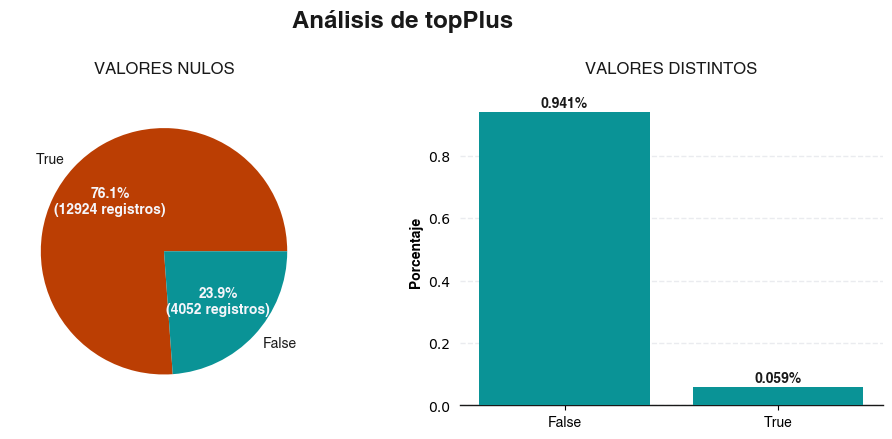

In [229]:
fig, axs = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(12, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de topPlus",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["topPlus"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["topPlus"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 fmt="%1.3f%%",
				 color="#191919",
				 label_type="edge",
				 padding=1,
				 font_properties=font_config)

axs[1].set_ylabel(ylabel="Porcentaje", fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks(ticks=np.arange(len(data.index)),
				  labels=data.index,
				  fontdict=font_config)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

**groupDescription**

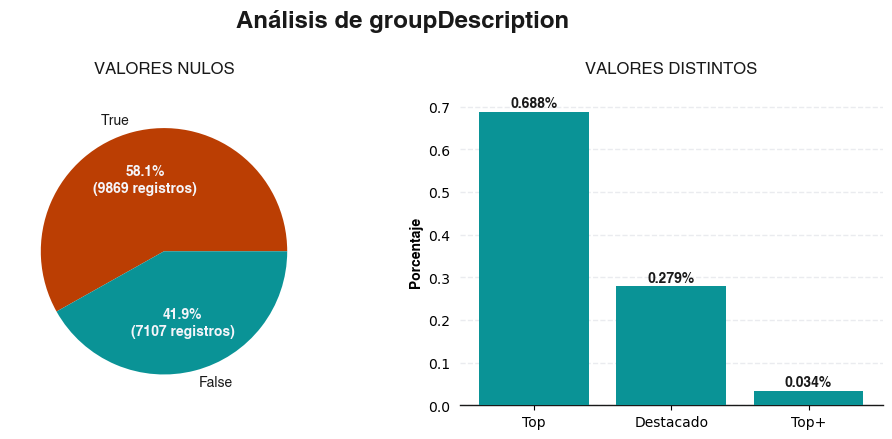

In [262]:
fig, axs = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(12, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de groupDescription",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["groupDescription"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["groupDescription"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 fmt="%1.3f%%",
				 color="#191919",
				 label_type="edge",
				 font_properties=font_config,
				 padding=1)
axs[1].tick_params(axis="y", width=0)
axs[1].set_ylabel(ylabel="Porcentaje", fontdict=font_config)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

**hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice (variable númerica continua)**

In [263]:
hasParkingSpace_is_nan = df_normalized["hasParkingSpace"].isna()
imputations = df_normalized.loc[
		hasParkingSpace_is_nan, "hasParkingSpace"].fillna(False)
df_normalized.fillna(value={ "hasParkingSpace": imputations}, inplace=True)

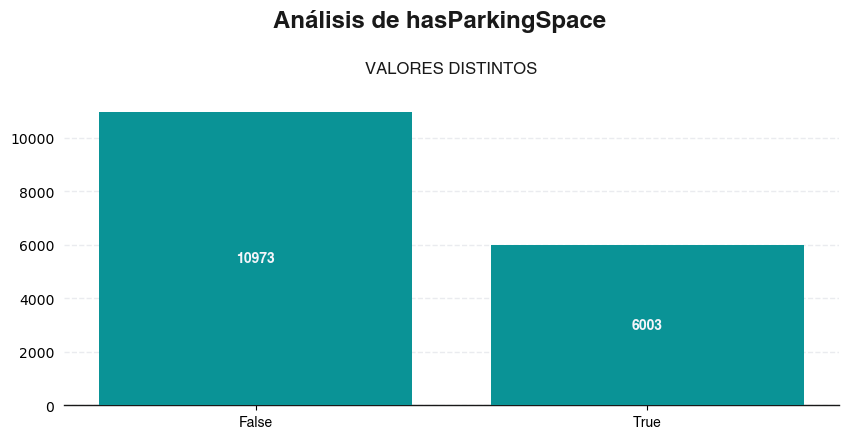

In [264]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasParkingSpace",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasParkingSpace"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax.set_title("Valores distintos".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.bar(x=data.index,
			   height=data.values,
			   data=data,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax.set_xticks(ticks=np.arange(len(data.index)),
			  labels=data.index,
			  fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
plt.show()

De las propiedades que poseen `hasParkingSpace`, analizamos `isParkingSpaceIncludedInPrice`, `parkingSpacePrice` (variable numérica continua).

In [265]:
columns = [
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice"
]
has_parking = df_normalized["hasParkingSpace"] == True
data = df_normalized.loc[has_parking, columns]
data.sample(4)

,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
5547,True,True,NaN
1971,True,True,NaN
27497,True,False,25000.0
16755,True,True,NaN


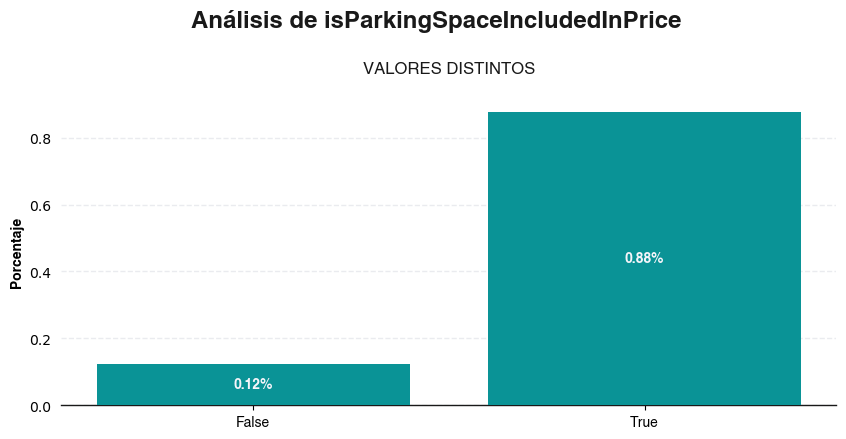

In [266]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de isParkingSpaceIncludedInPrice",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data["isParkingSpaceIncludedInPrice"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax.set_title("Valores distintos".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.bar(x=to_plot.index,
			   height=to_plot.values,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 fmt="%1.2f%%",
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax.set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["False", "True"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Porcentaje", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
plt.show()

Analizamos el precio de aquellos en los que el mismo no se encuentra incluído en el precio aunque en más de un 85% sí lo poseea.

> En una transformación final sería interesante agregar el precio del estacionamiento al precio de la propiedad.

In [267]:
has_parking_price = data["isParkingSpaceIncludedInPrice"] == False
data.loc[has_parking_price].sample(4)

,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
19401,True,False,25000.0
22915,True,False,15000.0
2639,True,False,20000.0
5823,True,False,20000.0


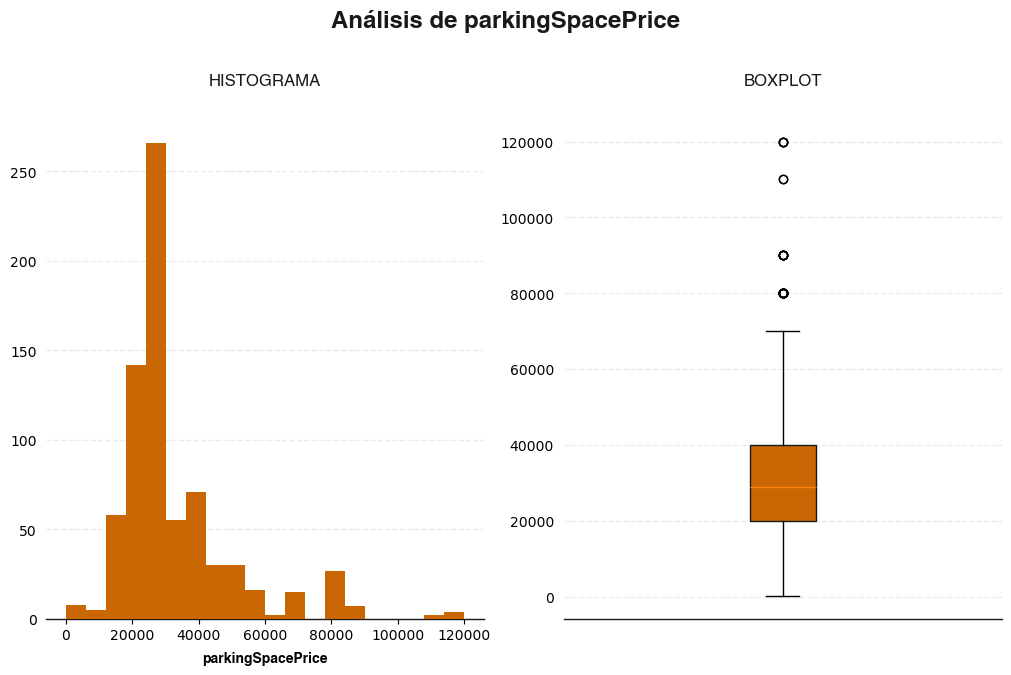

In [268]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 6),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de parkingSpacePrice",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# HIST CHART
#--------------------------------------
to_plot = data.loc[has_parking_price]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Histograma".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].hist(x="parkingSpacePrice",
			data=to_plot,
			bins=20,
			facecolor="#CA6702",
			zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].tick_params(axis="y", width=0)
axs[0].set_xlabel(xlabel="parkingSpacePrice",
				  labelpad=6,
				  fontdict=font_config)

axs[0].grid(axis="x", visible=False)
axs[0].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].spines["bottom"].set_color("#191919")
axs[0].spines[["left", "top", "right"]].set_visible(False)

#--------------------------------------
# BOXPLOT CHART
#--------------------------------------
to_plot = data.loc[has_parking_price]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("BOXPLOT".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[1].boxplot(x="parkingSpacePrice",
			   data=to_plot,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks([])

axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

**typology y subTypology**

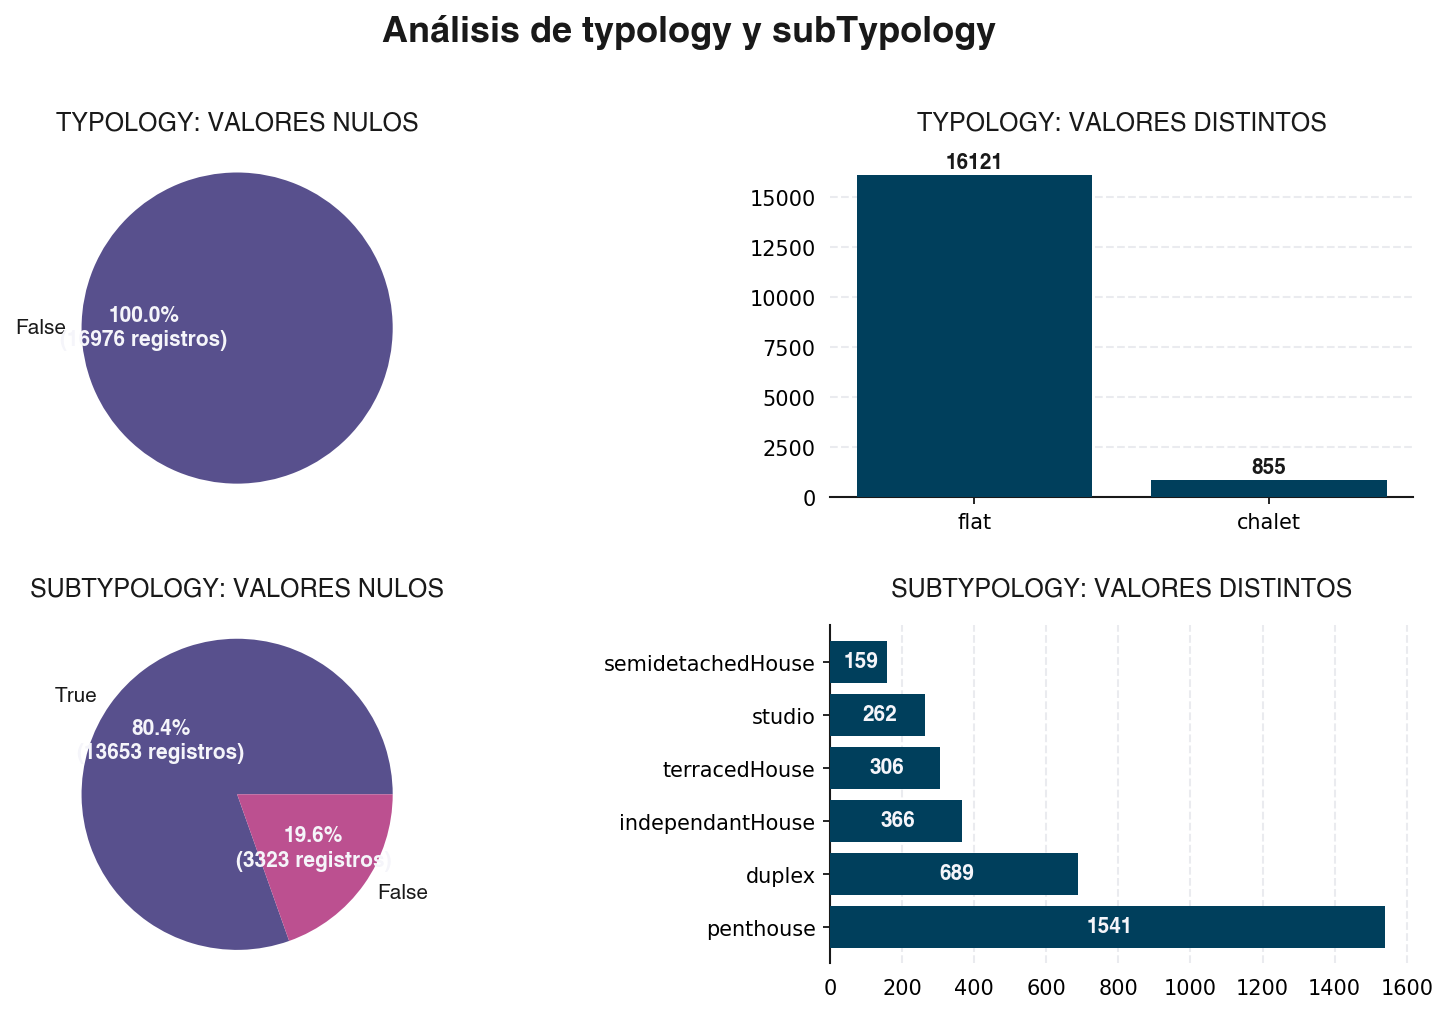

In [270]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=150,
						figsize=(10, 6),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de typology y subTypology",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.1)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["typology"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("typology: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 radius=1.15,
									 colors=["#58508D", "#BC5090"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["typology"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("typology: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].bar(x=data.index,
					  height=data.values,
					  data=data,
					  facecolor="#003f5c",
					  zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					padding=1,
					label_type="edge",
					color="#191919",
					font_properties=font_config)

axs[0][1].tick_params(axis="y", width=0)
axs[0][1].grid(axis="x", visible=False)
axs[0][1].grid(axis="y",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["bottom"].set_linewidth(1)
axs[0][1].spines["bottom"].set_color("#191919")
axs[0][1].spines[["left", "top", "right"]].set_visible(False)


#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["subTypology"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("subTypology: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 radius=1.15,
									 colors=["#58508D", "#BC5090"],
									 textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["subTypology"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("subTypology: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#003f5c",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					padding=1,
					label_type="center",
					color="#F5F5FA",
					font_properties=font_config)
axs[1][1].set_yticks(ticks=data.index.to_numpy(),
					 labels=data.index.to_numpy())

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

**title y subtitle**

In [271]:
df_normalized["title"].value_counts()

title
Piso                                       3698
Ático                                       466
Dúplex                                      219
Chalet adosado                              187
Casa independiente                          186
                                           ... 
Piso en Calle pajaritos                       1
Piso en Calle de Serrano Galvache, 32         1
Piso en Calle de José Rodríguez Pinilla       1
Piso en Bolivia                               1
Piso en Camino de Ganapanes                   1
Name: count, Length: 2181, dtype: int64

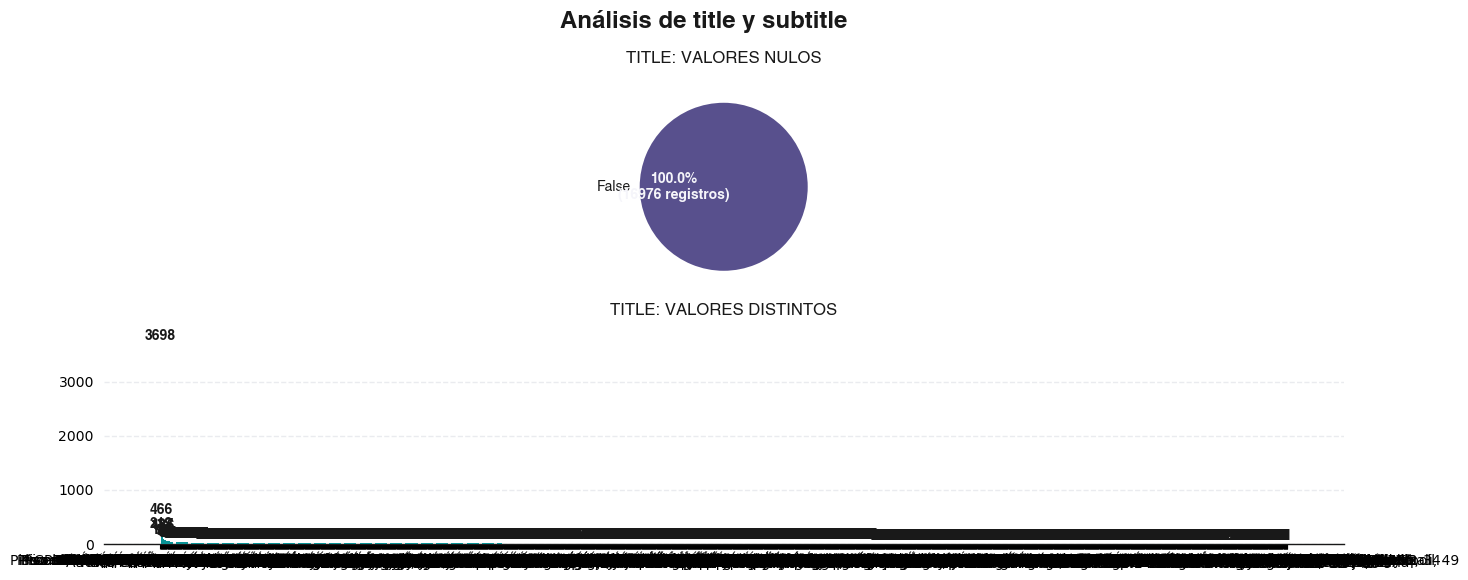

In [272]:
fig, axs = plt.subplots(ncols=1,
						nrows=2,
						figsize=(16, 6))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de title y subtitle",
			 color="#191919",
			 fontproperties=font_config,
			 y=1)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["title"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("title: Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#58508D", "#BC5090"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["title"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("title: Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)
axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

Creamos una función para extraer parte del texto que no es relevante ya que analizamos propiedades de Madrid.

In [273]:
df_normalized["subtitle"].sample(5)

1798                Nueva España, Madrid
8791           Cuzco-Castillejos, Madrid
23658                      Ibiza, Madrid
23722                    Legazpi, Madrid
4422     Bernabéu-Hispanoamérica, Madrid
Name: subtitle, dtype: object

In [274]:
import re

def text_formatter(text):
	format = r"([^,]+)"

	groups = re.match(format, text)
	return groups.group(1).strip()

In [275]:
data = df_normalized["subtitle"].map(text_formatter)
data.sample(5)

1437     Nuevos Ministerios-Ríos Rosas
7072                         Trafalgar
6506                        Castellana
267                         Gaztambide
23967             Ciudad Universitaria
Name: subtitle, dtype: object

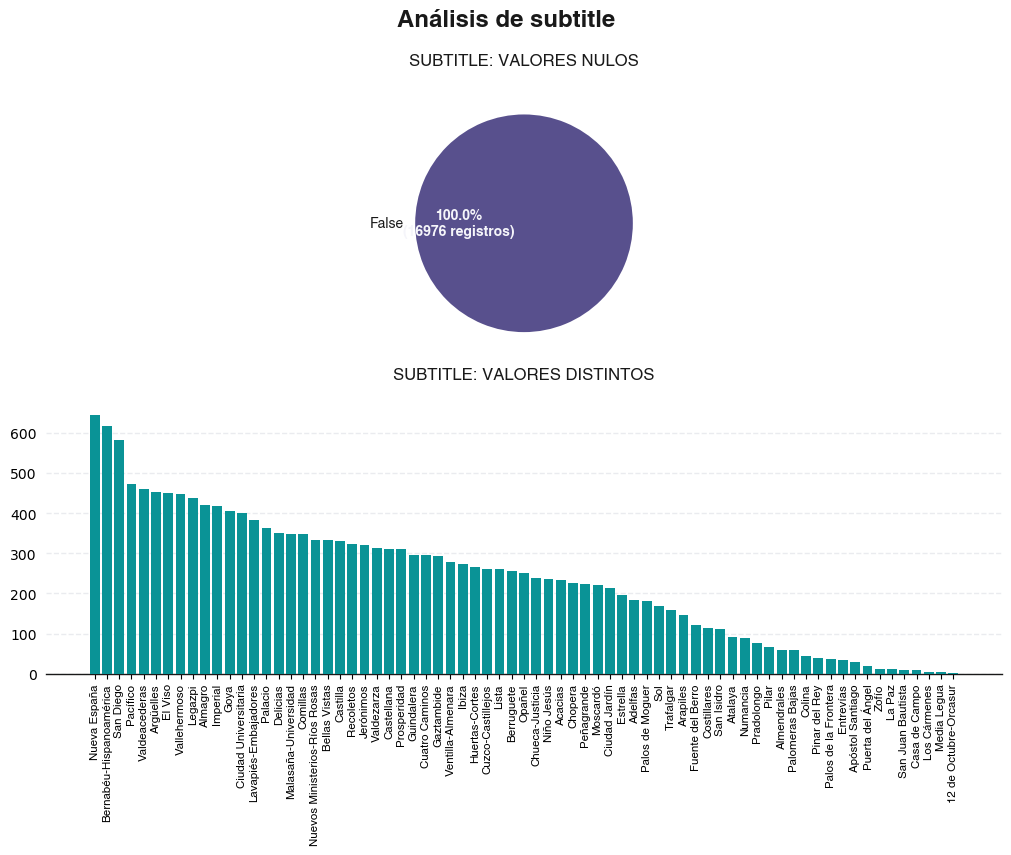

In [276]:
fig, axs = plt.subplots(ncols=1,
						nrows=2,
						figsize=(10, 8),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de subtitle",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)

#--------------------------------------
# PIE CHART
#--------------------------------------
to_plot = df_normalized["subtitle"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("subtitle: Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=to_plot.values,
								  labels=to_plot.index,
								  data=to_plot,
								  autopct=format_autopct(to_plot.values),
								  colors=["#58508D", "#BC5090"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data.value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("subtitle: Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=to_plot.index,
				   height=to_plot.values,
				   data=to_plot,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "small",
}
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)

axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks(ticks=to_plot.index,
				  labels=to_plot.index,
				  fontdict=font_config,
				  rotation=90)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

**newDevelopmentFinished y newDevelopment.1**

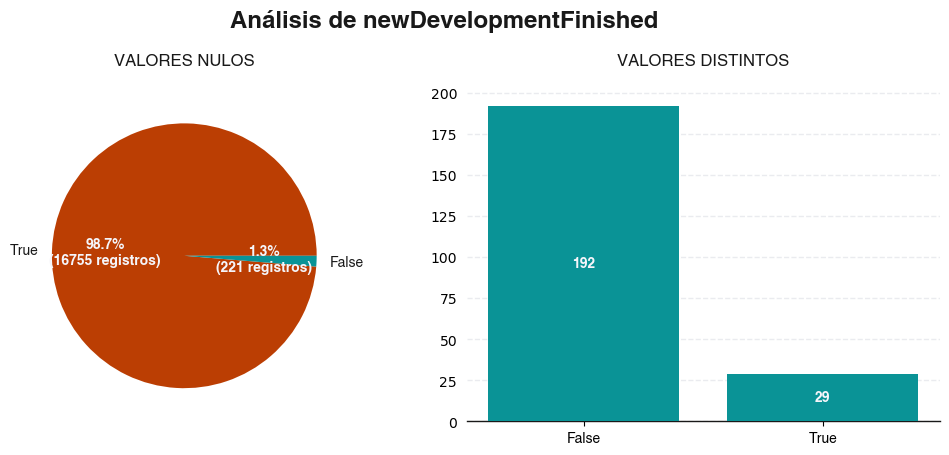

In [277]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de newDevelopmentFinished",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["newDevelopmentFinished"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["newDevelopmentFinished"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 label_type="center",
				 color="#F5F5FA",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

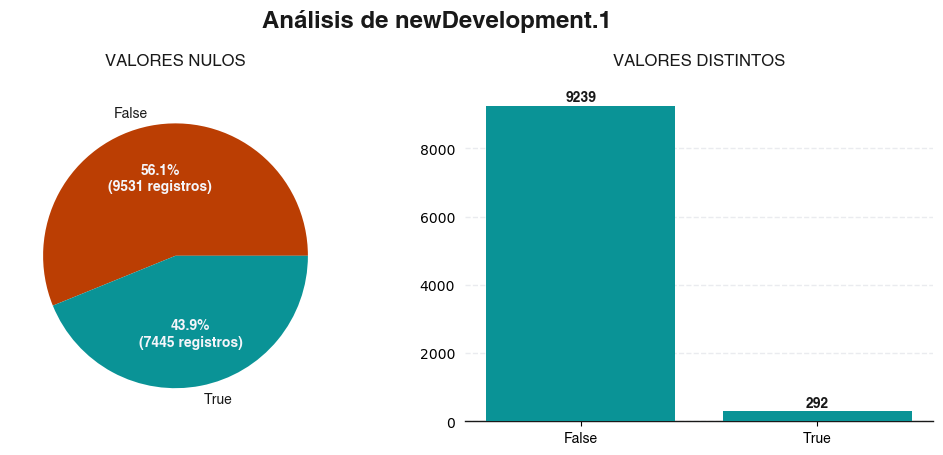

In [278]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de newDevelopment.1",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["newDevelopment.1"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["newDevelopment.1"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

**superTopHighlight**

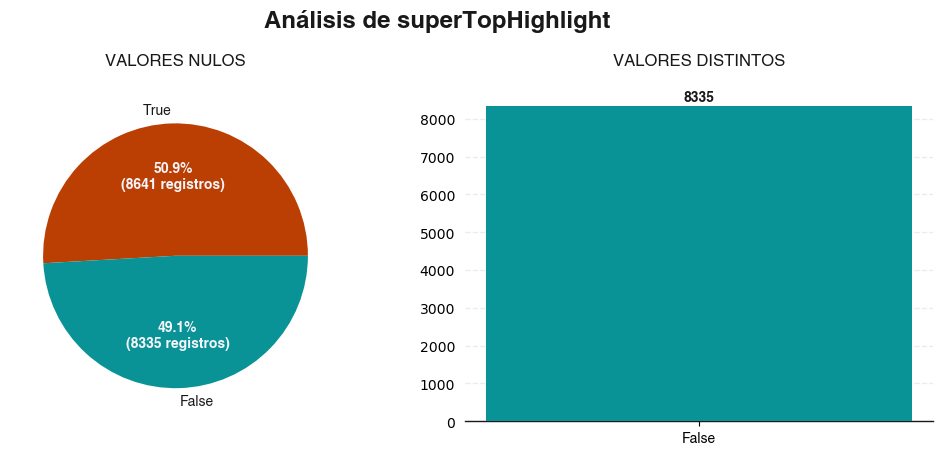

In [279]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de superTopHighlight",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["superTopHighlight"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["superTopHighlight"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

**SubdType**

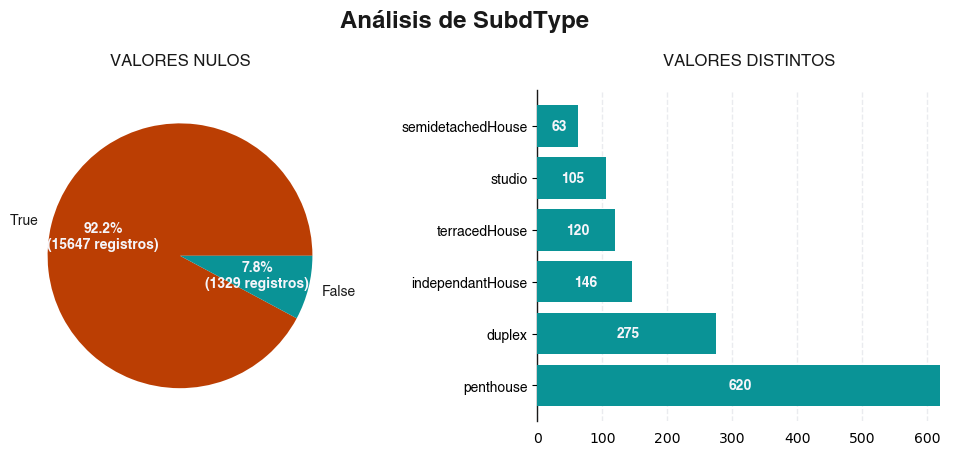

In [280]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de SubdType",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["SubdType"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["SubdType"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)
axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

**name_0, text_0, name_1, text_1**

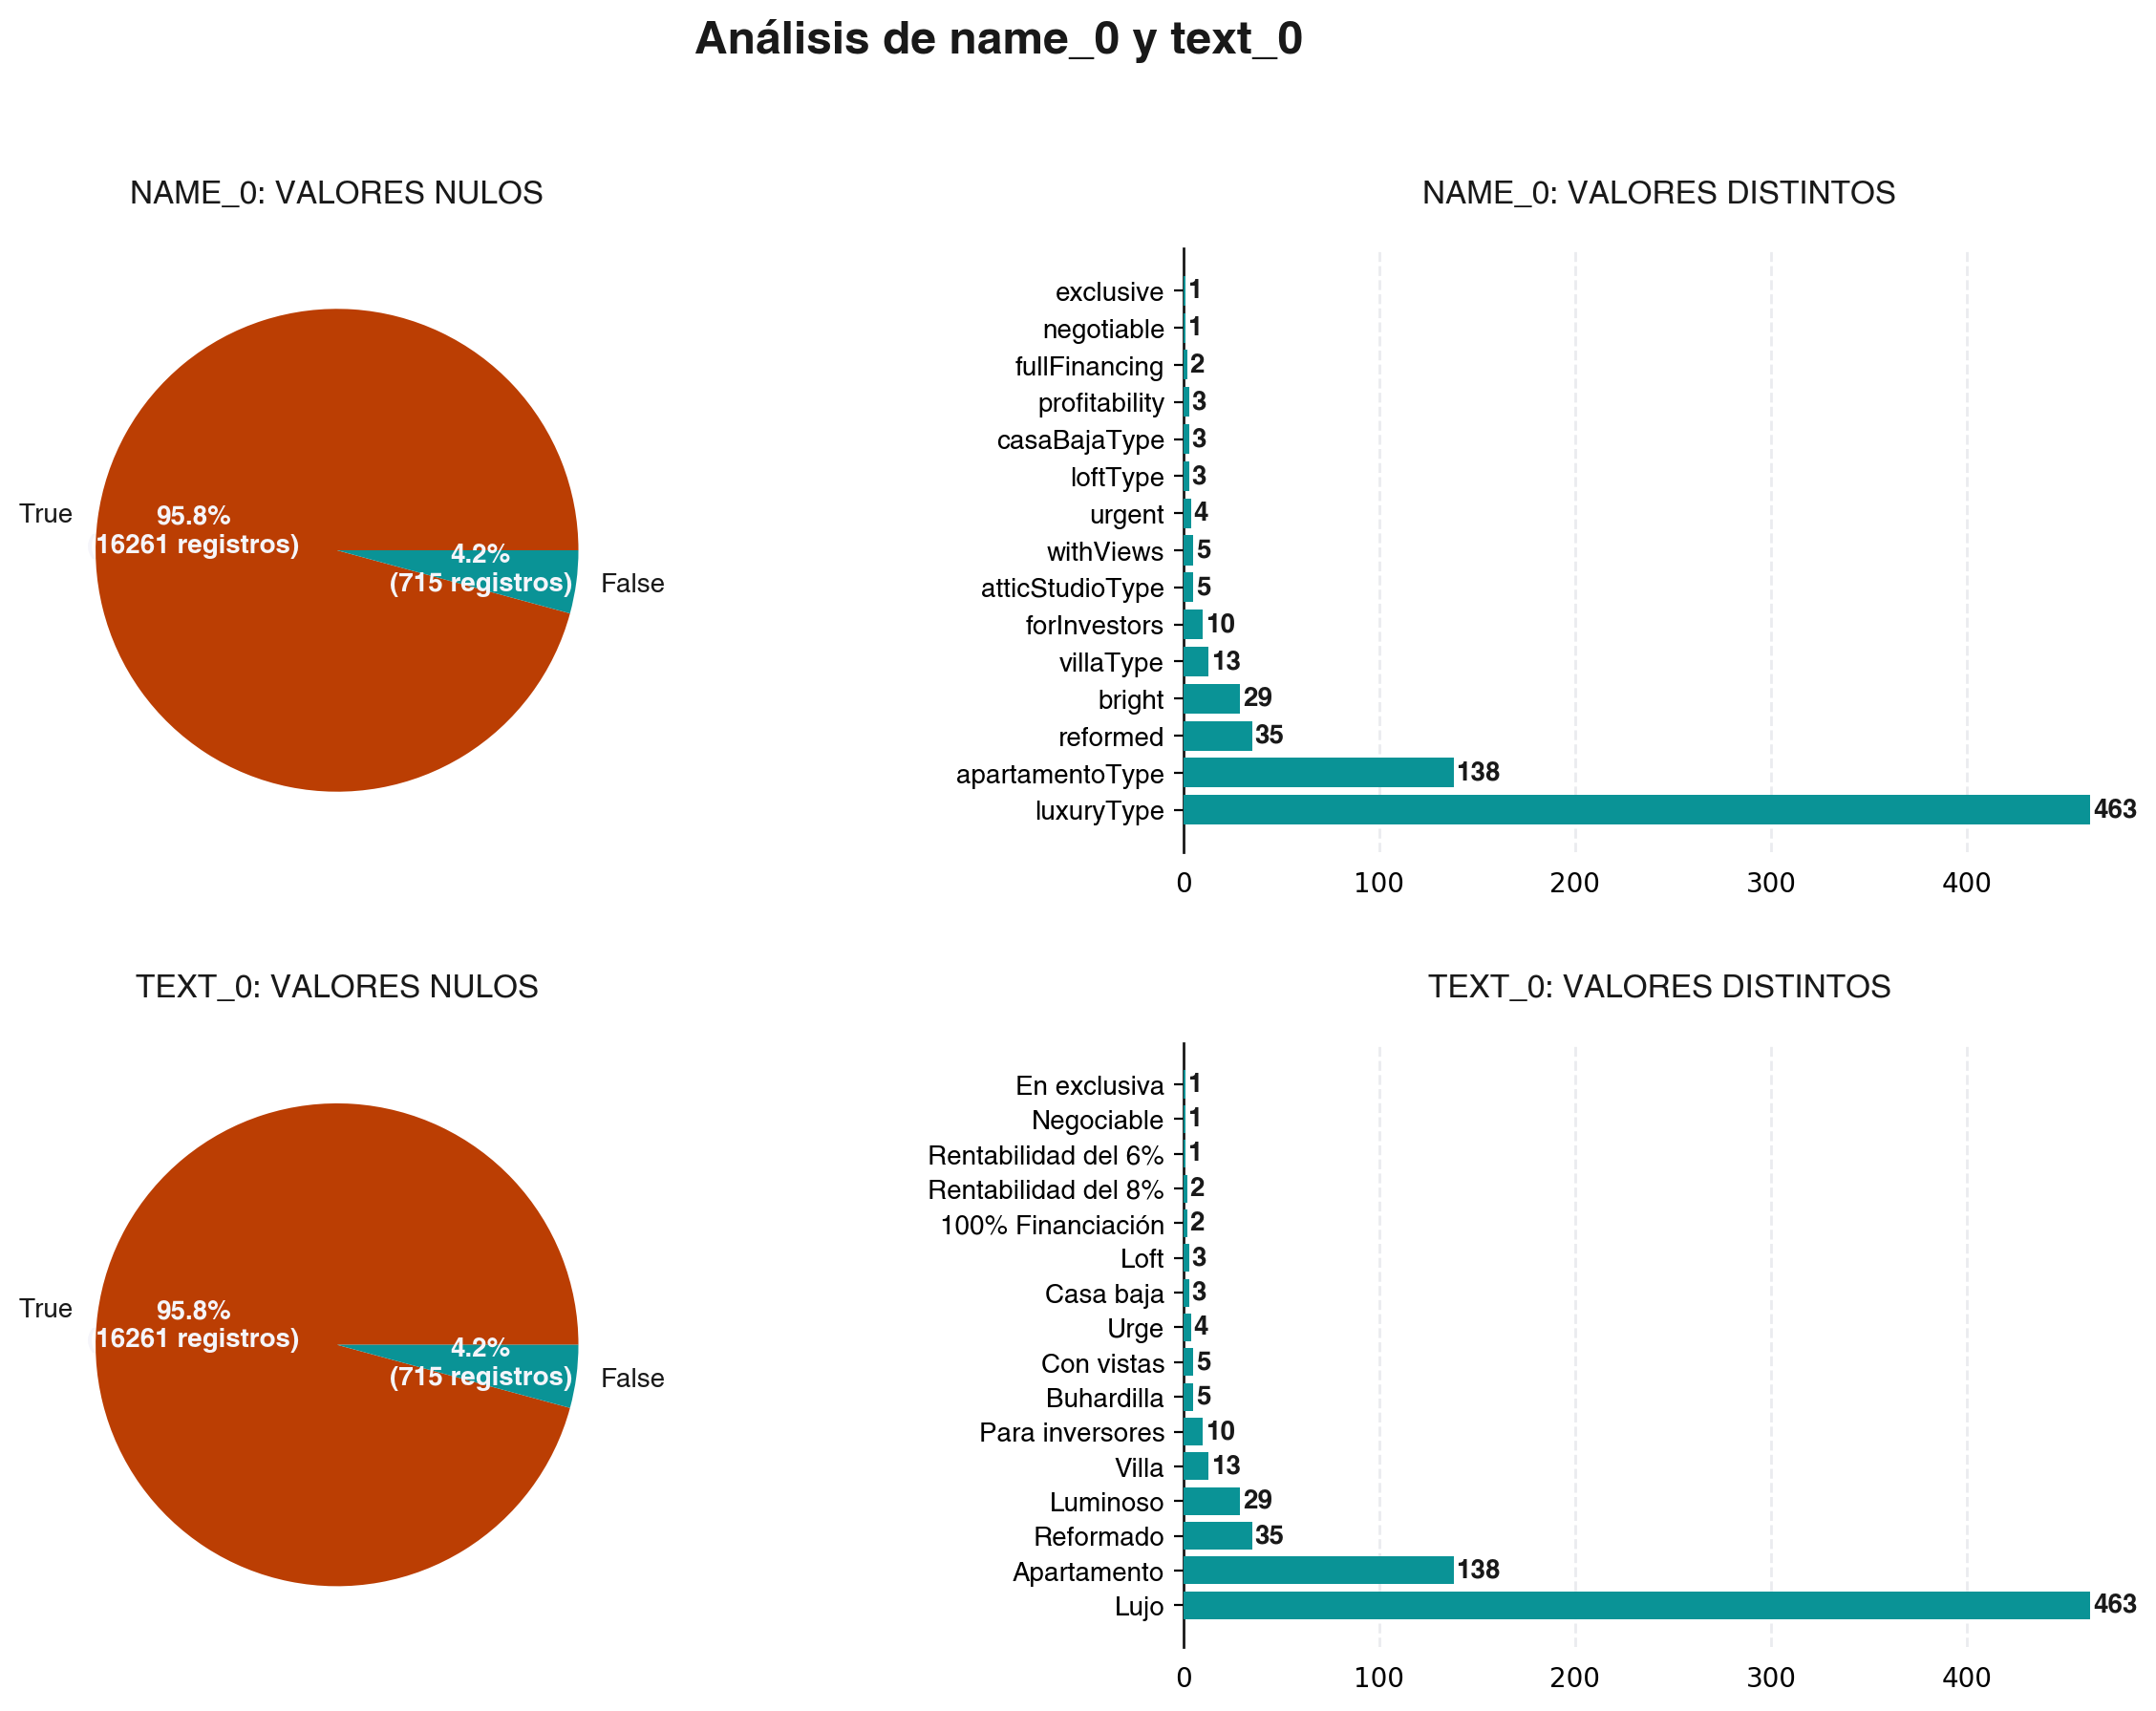

In [281]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=200,
						figsize=(12, 8),
						layout="constrained")
fig.get_layout_engine().set(hspace=0.1, wspace=0.1)

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de name_0 y text_0",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["name_0"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("name_0: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["name_0"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("name_0: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[0][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[0][1].tick_params(axis="x", width=0)
axs[0][1].grid(axis="y", visible=False)
axs[0][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["left"].set_linewidth(1)
axs[0][1].spines["left"].set_color("#191919")
axs[0][1].spines[["bottom", "top", "right"]].set_visible(False)




#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["text_0"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("text_0: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["text_0"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("text_0: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

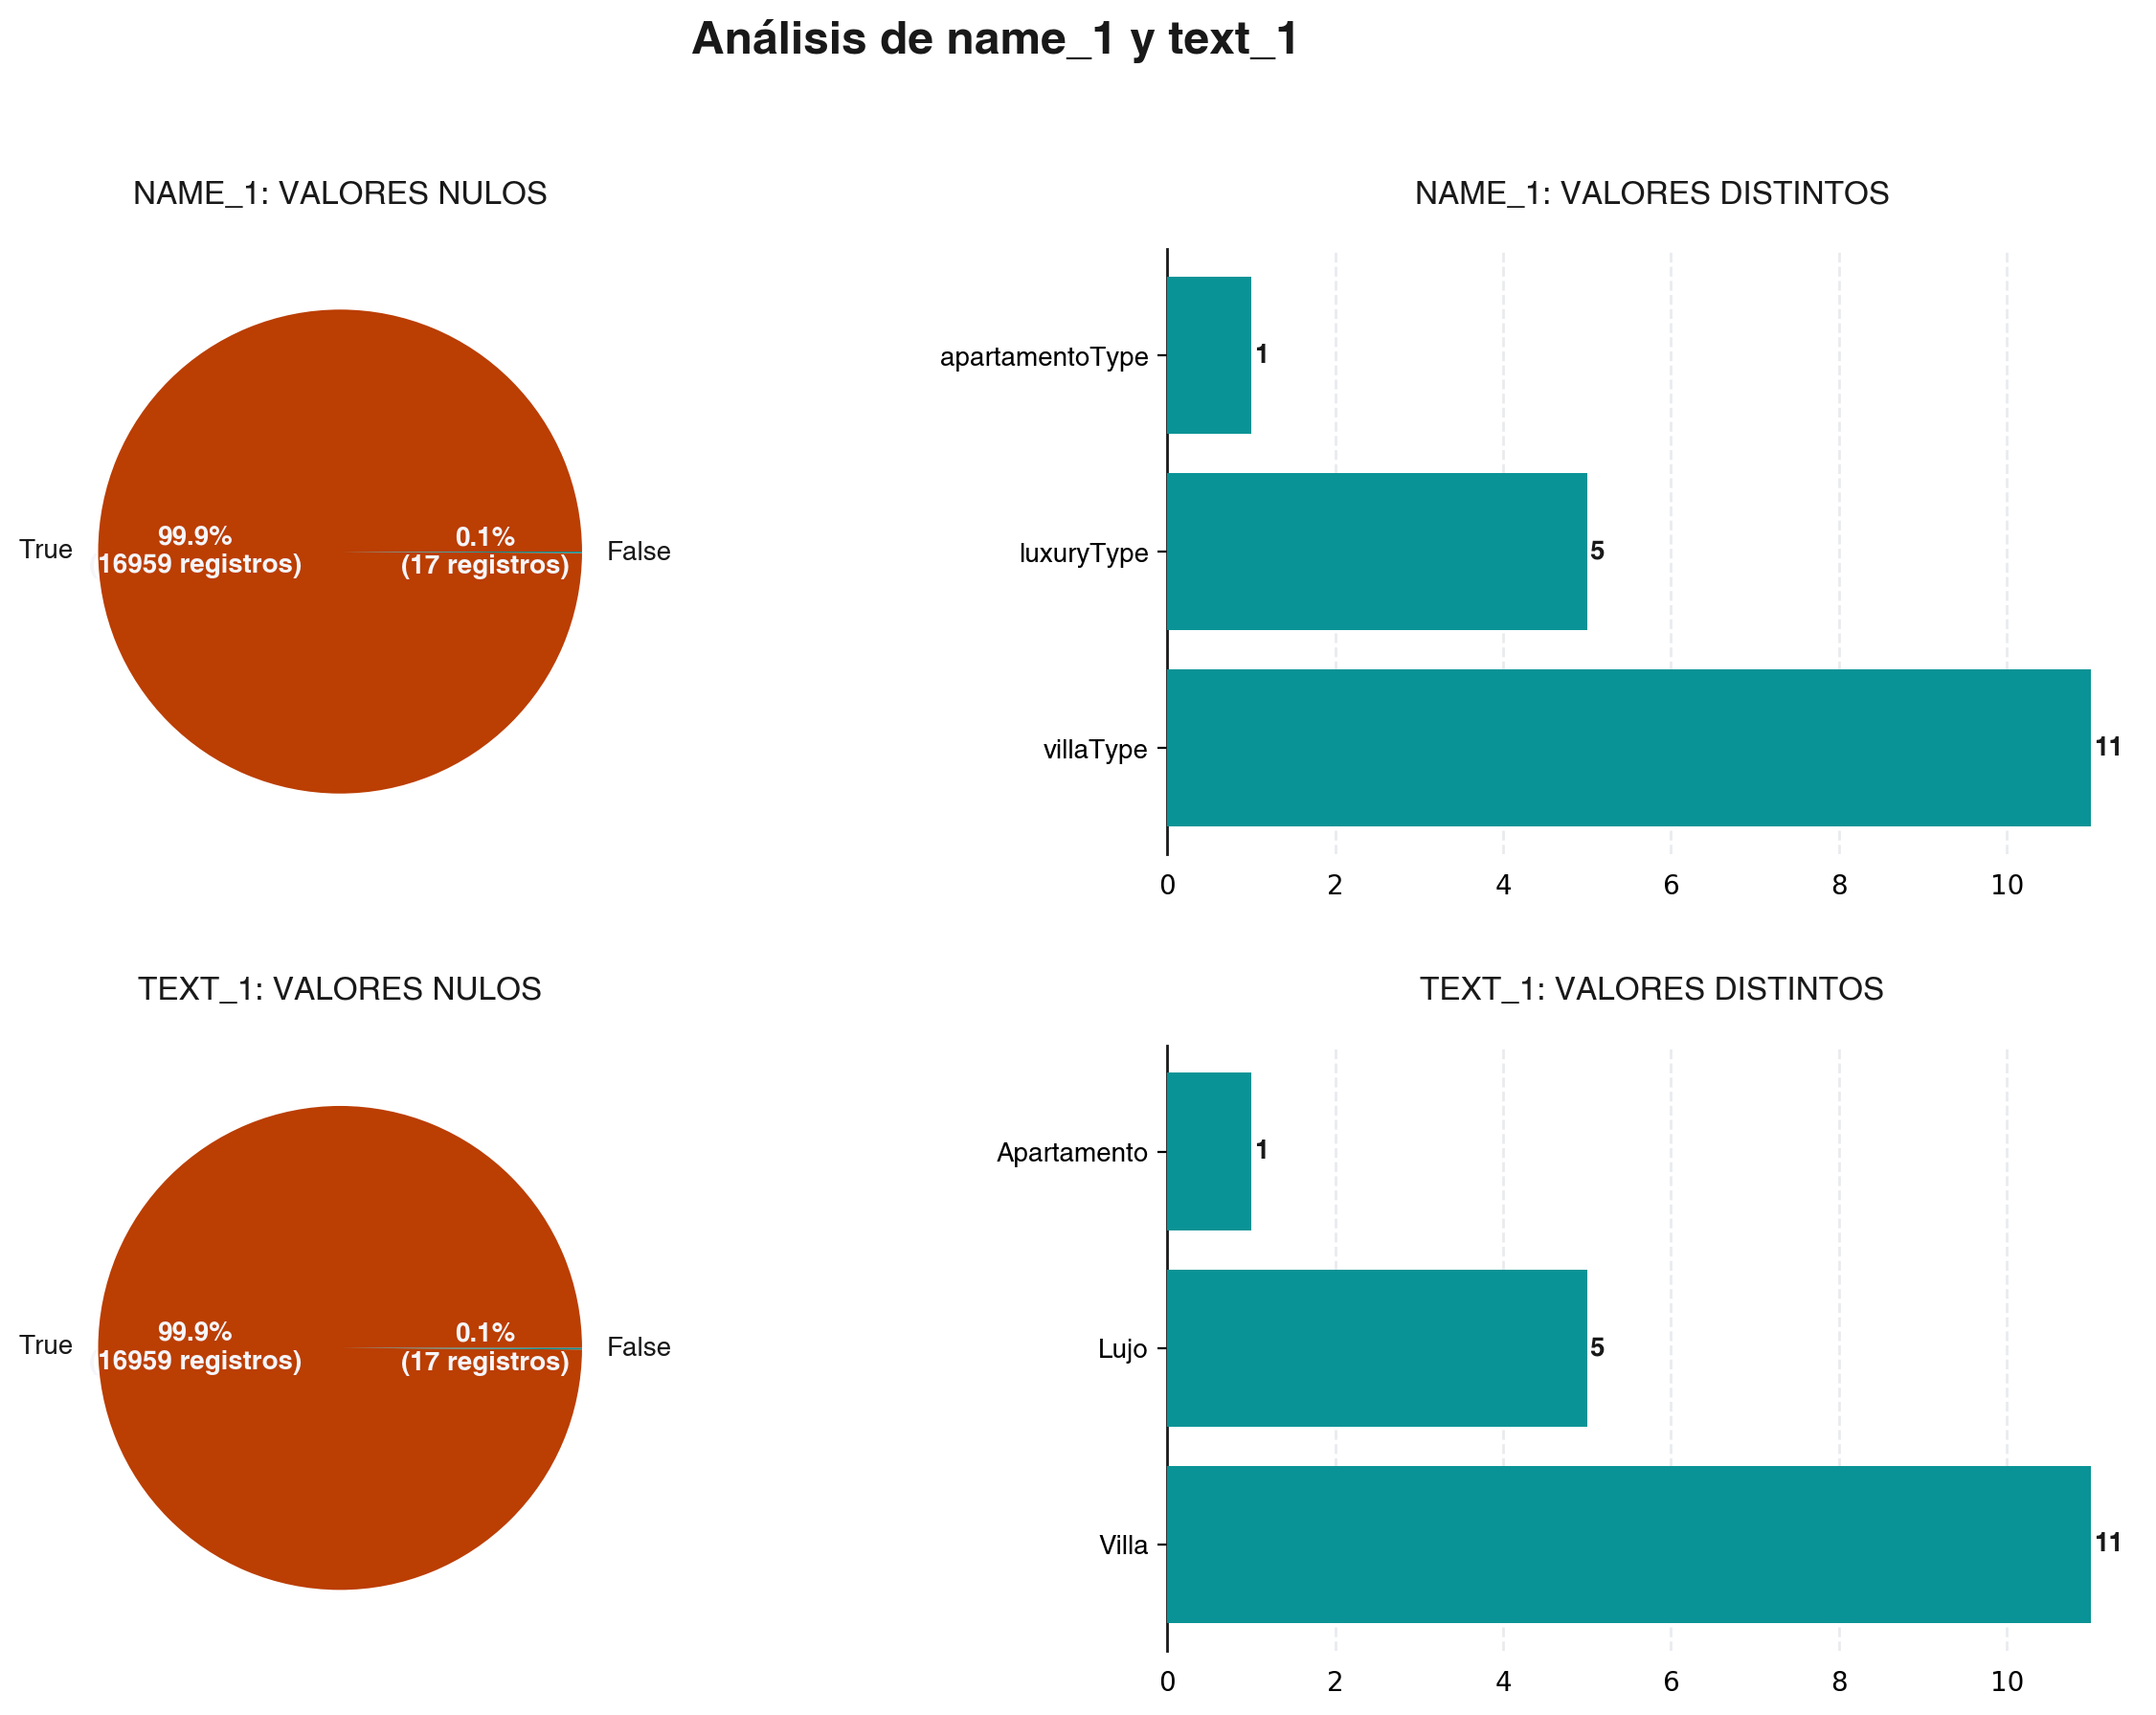

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=200,
						figsize=(12, 8),
						layout="constrained")
fig.get_layout_engine().set(hspace=0.1, wspace=0.1)

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de name_1 y text_1",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["name_1"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("name_1: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["name_1"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("name_1: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[0][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[0][1].tick_params(axis="x", width=0)
axs[0][1].grid(axis="y", visible=False)
axs[0][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["left"].set_linewidth(1)
axs[0][1].spines["left"].set_color("#191919")
axs[0][1].spines[["bottom", "top", "right"]].set_visible(False)




#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["text_1"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("text_1: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["text_1"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("text_1: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

**hasPlan**

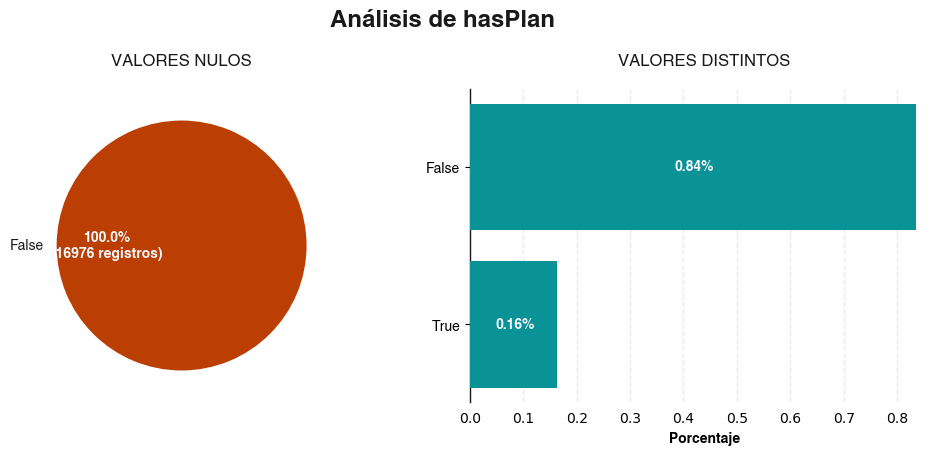

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasPlan",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["hasPlan"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasPlan"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

**has3DTour**

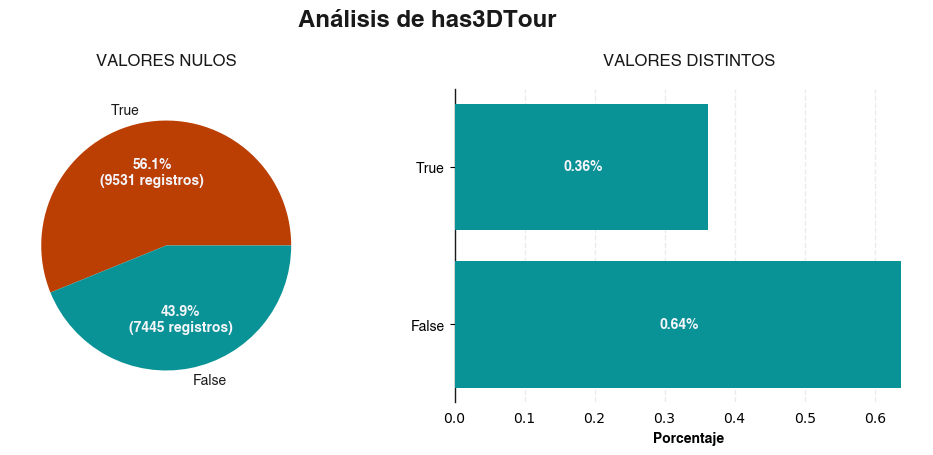

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de has3DTour",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["has3DTour"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["has3DTour"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

**has360**

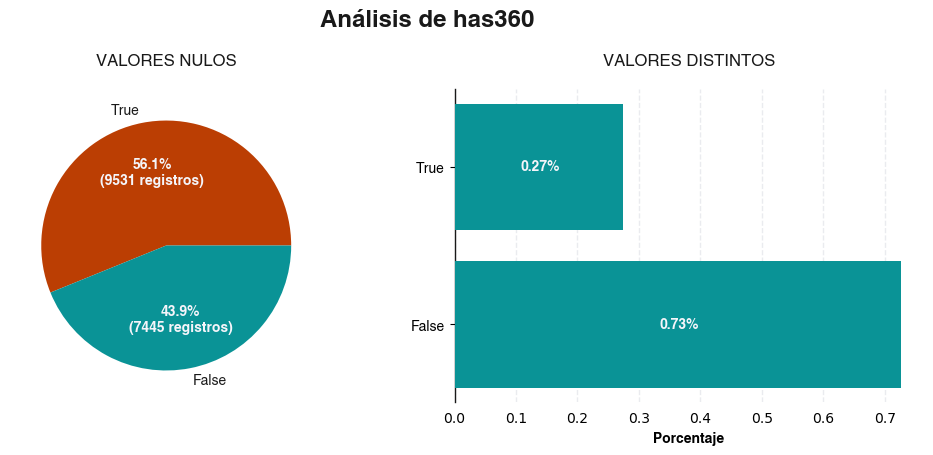

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de has360",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["has360"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["has360"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

**hasStaging**

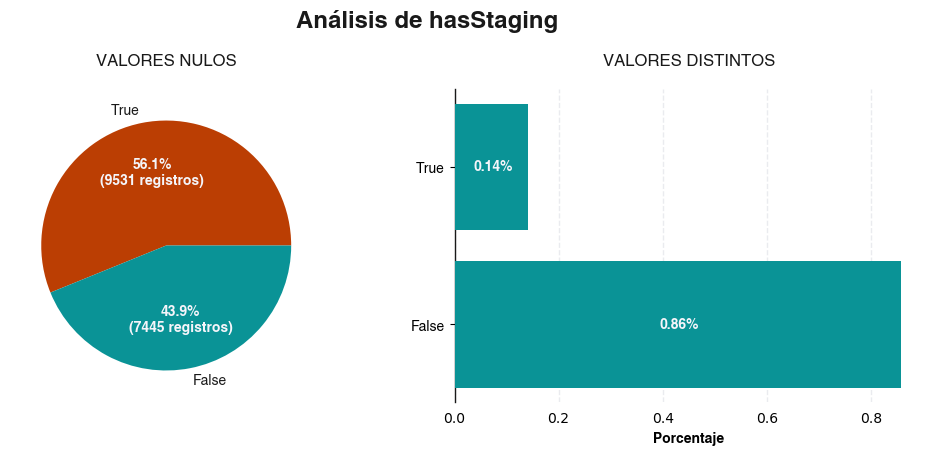

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasStaging",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["hasStaging"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasStaging"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="x", width=0)
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### Análisis Numéricas

Ya se analizó la otra columna númerica, `parkingSpacePrice`.

**ex**

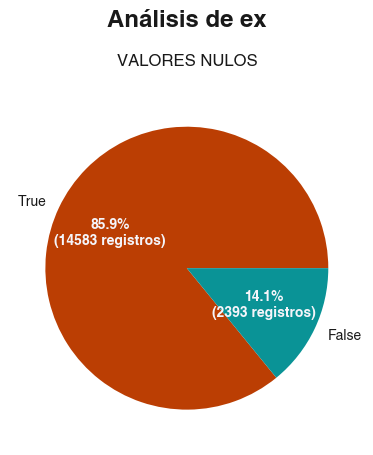

In [284]:
fig, axs = plt.subplots(dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de ex",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["ex"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs.set_title("Valores nulos".upper(),
			  color="#191919",
			  fontproperties=font_config,
			  y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs.pie(x=data.values,
							   labels=data.index,
							   data=data,
							   autopct=format_autopct(data.values),
							   colors=["#BB3E03", "#0a9396"],
							   textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)

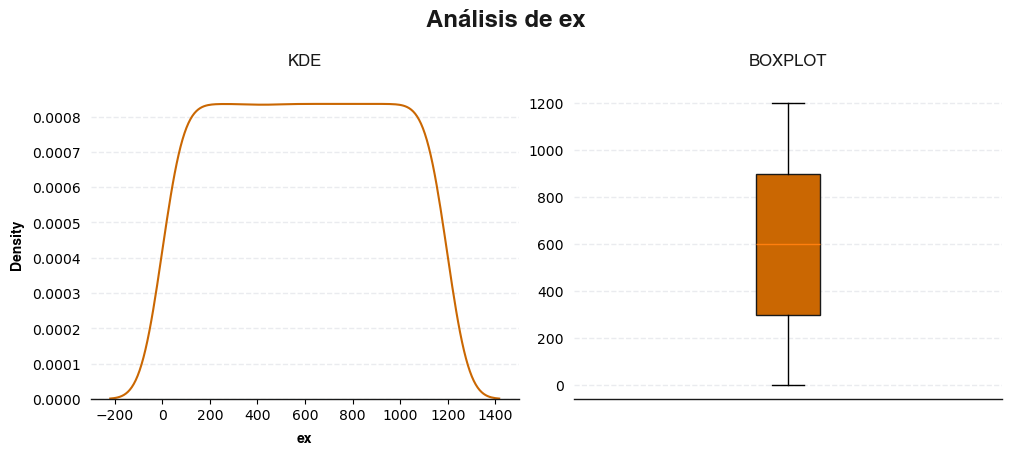

In [285]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de ex",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# HIST CHART
#--------------------------------------
is_nan = df_normalized["ex"].isna()
to_plot = df_normalized.loc[~is_nan]
to_plot["ex"].astype(float, copy=False)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("KDE".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}

sns.kdeplot(x="ex",
			data=to_plot,
			color="#CA6702",
			ax=axs[0])


font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].tick_params(axis="y", width=0)
axs[0].set_xlabel(xlabel="ex",
				  labelpad=6,
				  fontdict=font_config)
axs[0].set_ylabel(ylabel="Density",
				  labelpad=6,
				  fontdict=font_config)

axs[0].grid(axis="x", visible=False)
axs[0].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].spines["bottom"].set_color("#191919")
axs[0].spines[["left", "top", "right"]].set_visible(False)


#--------------------------------------
# BOXPLOT CHART
#--------------------------------------
to_plot = df_normalized.loc[~is_nan, "ex"]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("BOXPLOT".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[1].boxplot(x=to_plot.values,
			   data=to_plot,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks([])

axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

### Columnas Roberto/ PropertyCode-Province

#### Análisis Categóricas

**Operation:**
- En este apartado tratamos que tipo de operacion se ha llevado a cabo con los imuebles. En este todos son venta de propiedad

**PropertyType:**
- En este apartado comparamos que tio de viviendas son las mas demandadas y como vemos en el grafico se trara del tipo flat (apartamento)

**PropertyCode:**
-  Se trata del número de registro de los inmuebles

**Bathrooms:**
- Se categorizan las viviendas en función del número de baños que tienen, la mayoría disponen de 1

**Province:**
- Como vemos en el gráfico de privincia todos los inmuebles están centrados en Madrid

##### Frecuencia Absoluta

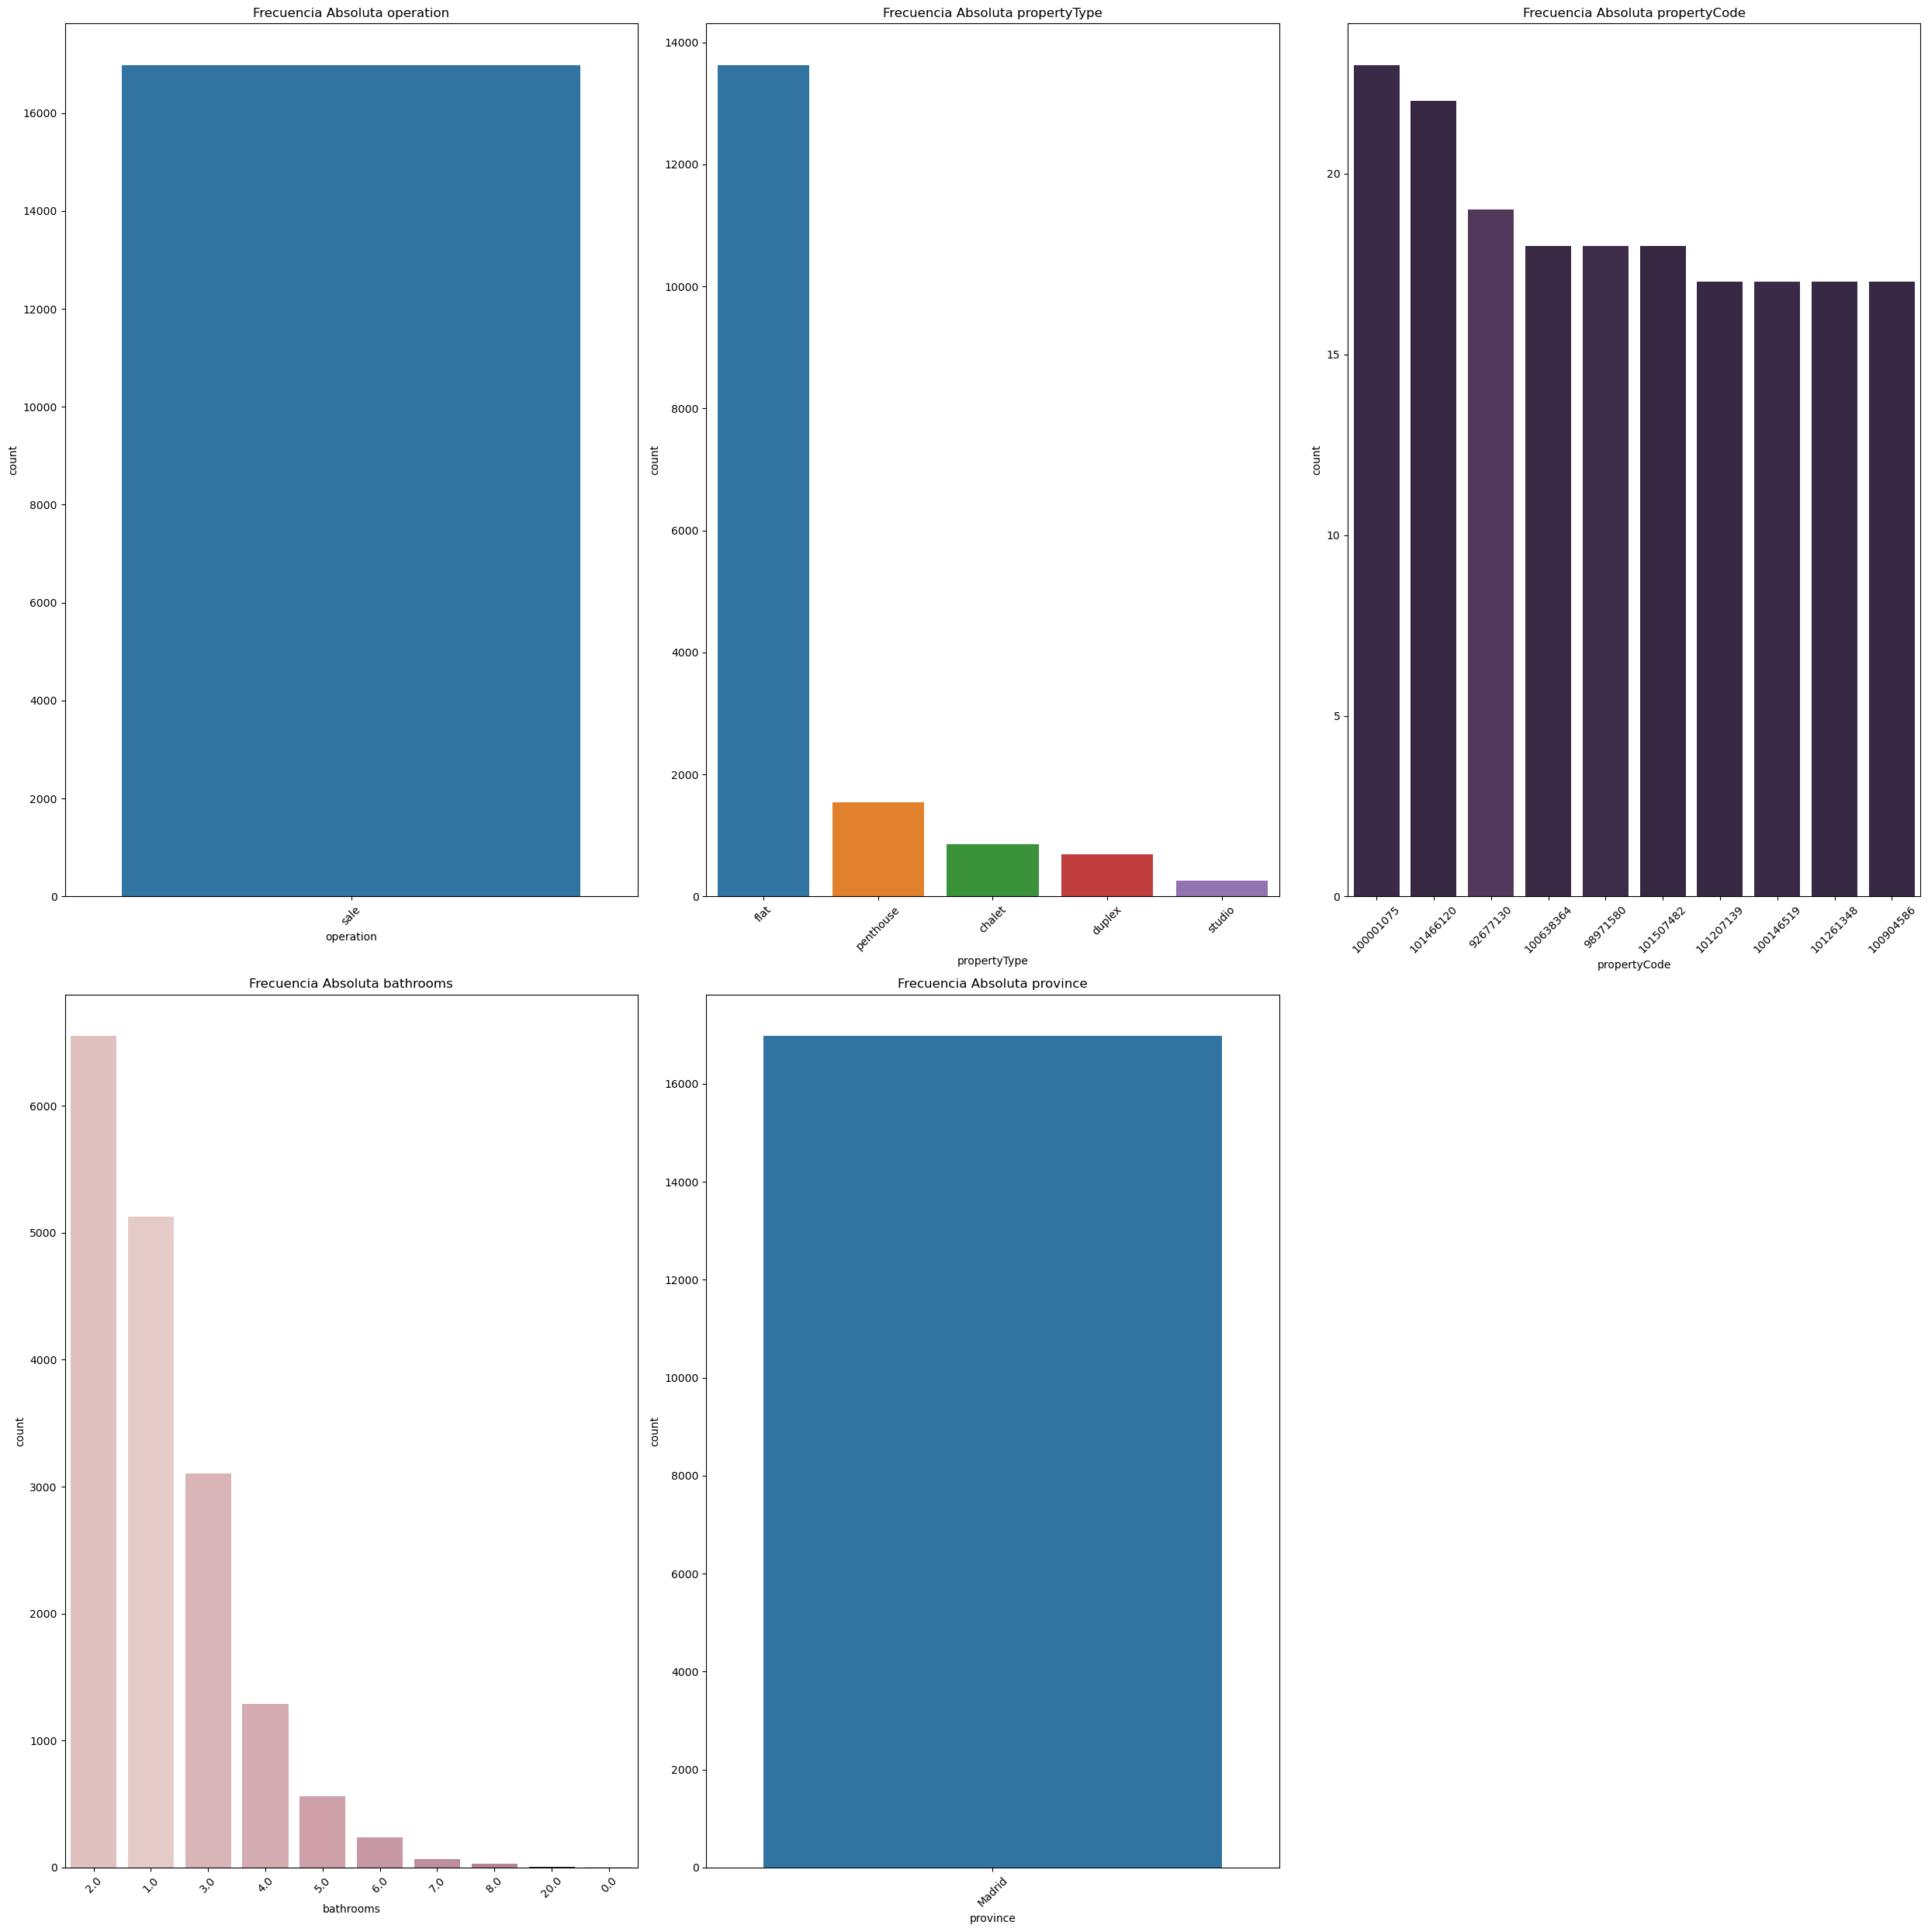

In [288]:
# Utilizamos la frecuencia absoluta para visualizar las variables categoricas

# Crear figura con 5 subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

data = df_raw.reset_index(drop=True)
# 1. operation
sns.countplot(
    x="operation",
    data=data,
    hue="operation",
    order=data["operation"].value_counts().index[:10],
    ax=axs[0],
    legend=False)

axs[0].set_title("Frecuencia Absoluta operation")
axs[0].tick_params(axis='x', rotation=45)
# 2. propertyType
sns.countplot(
    x="propertyType",
    data=df_raw,
    hue="propertyType",
    order=df_raw["propertyType"].value_counts().index,
    ax=axs[1],
    legend=False
)
axs[1].set_title("Frecuencia Absoluta propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode
sns.countplot(
    x="propertyCode",
    data=data,
    hue="propertyCode",
    order=data["propertyCode"].value_counts().index[:10],
    ax=axs[2],
    legend=False
)
axs[2].set_title("Frecuencia Absoluta propertyCode")
axs[2].tick_params(axis='x', rotation=45)



# 4. bathrooms
sns.countplot(
    x="bathrooms",
    data=data,
    hue="bathrooms",
    order=data["bathrooms"].value_counts().index[:10],
    ax=axs[3],
    legend=False
)
axs[3].set_title("Frecuencia Absoluta bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
sns.countplot(
    x="province",
    data=data,
    hue="province",
    order=data["province"].value_counts().index,
    ax=axs[4],
    legend=False
)
axs[4].set_title("Frecuencia Absoluta province")
axs[4].tick_params(axis='x', rotation=45)
# Ajuste final
plt.tight_layout()
plt.show()

##### Frecuencia Relativa

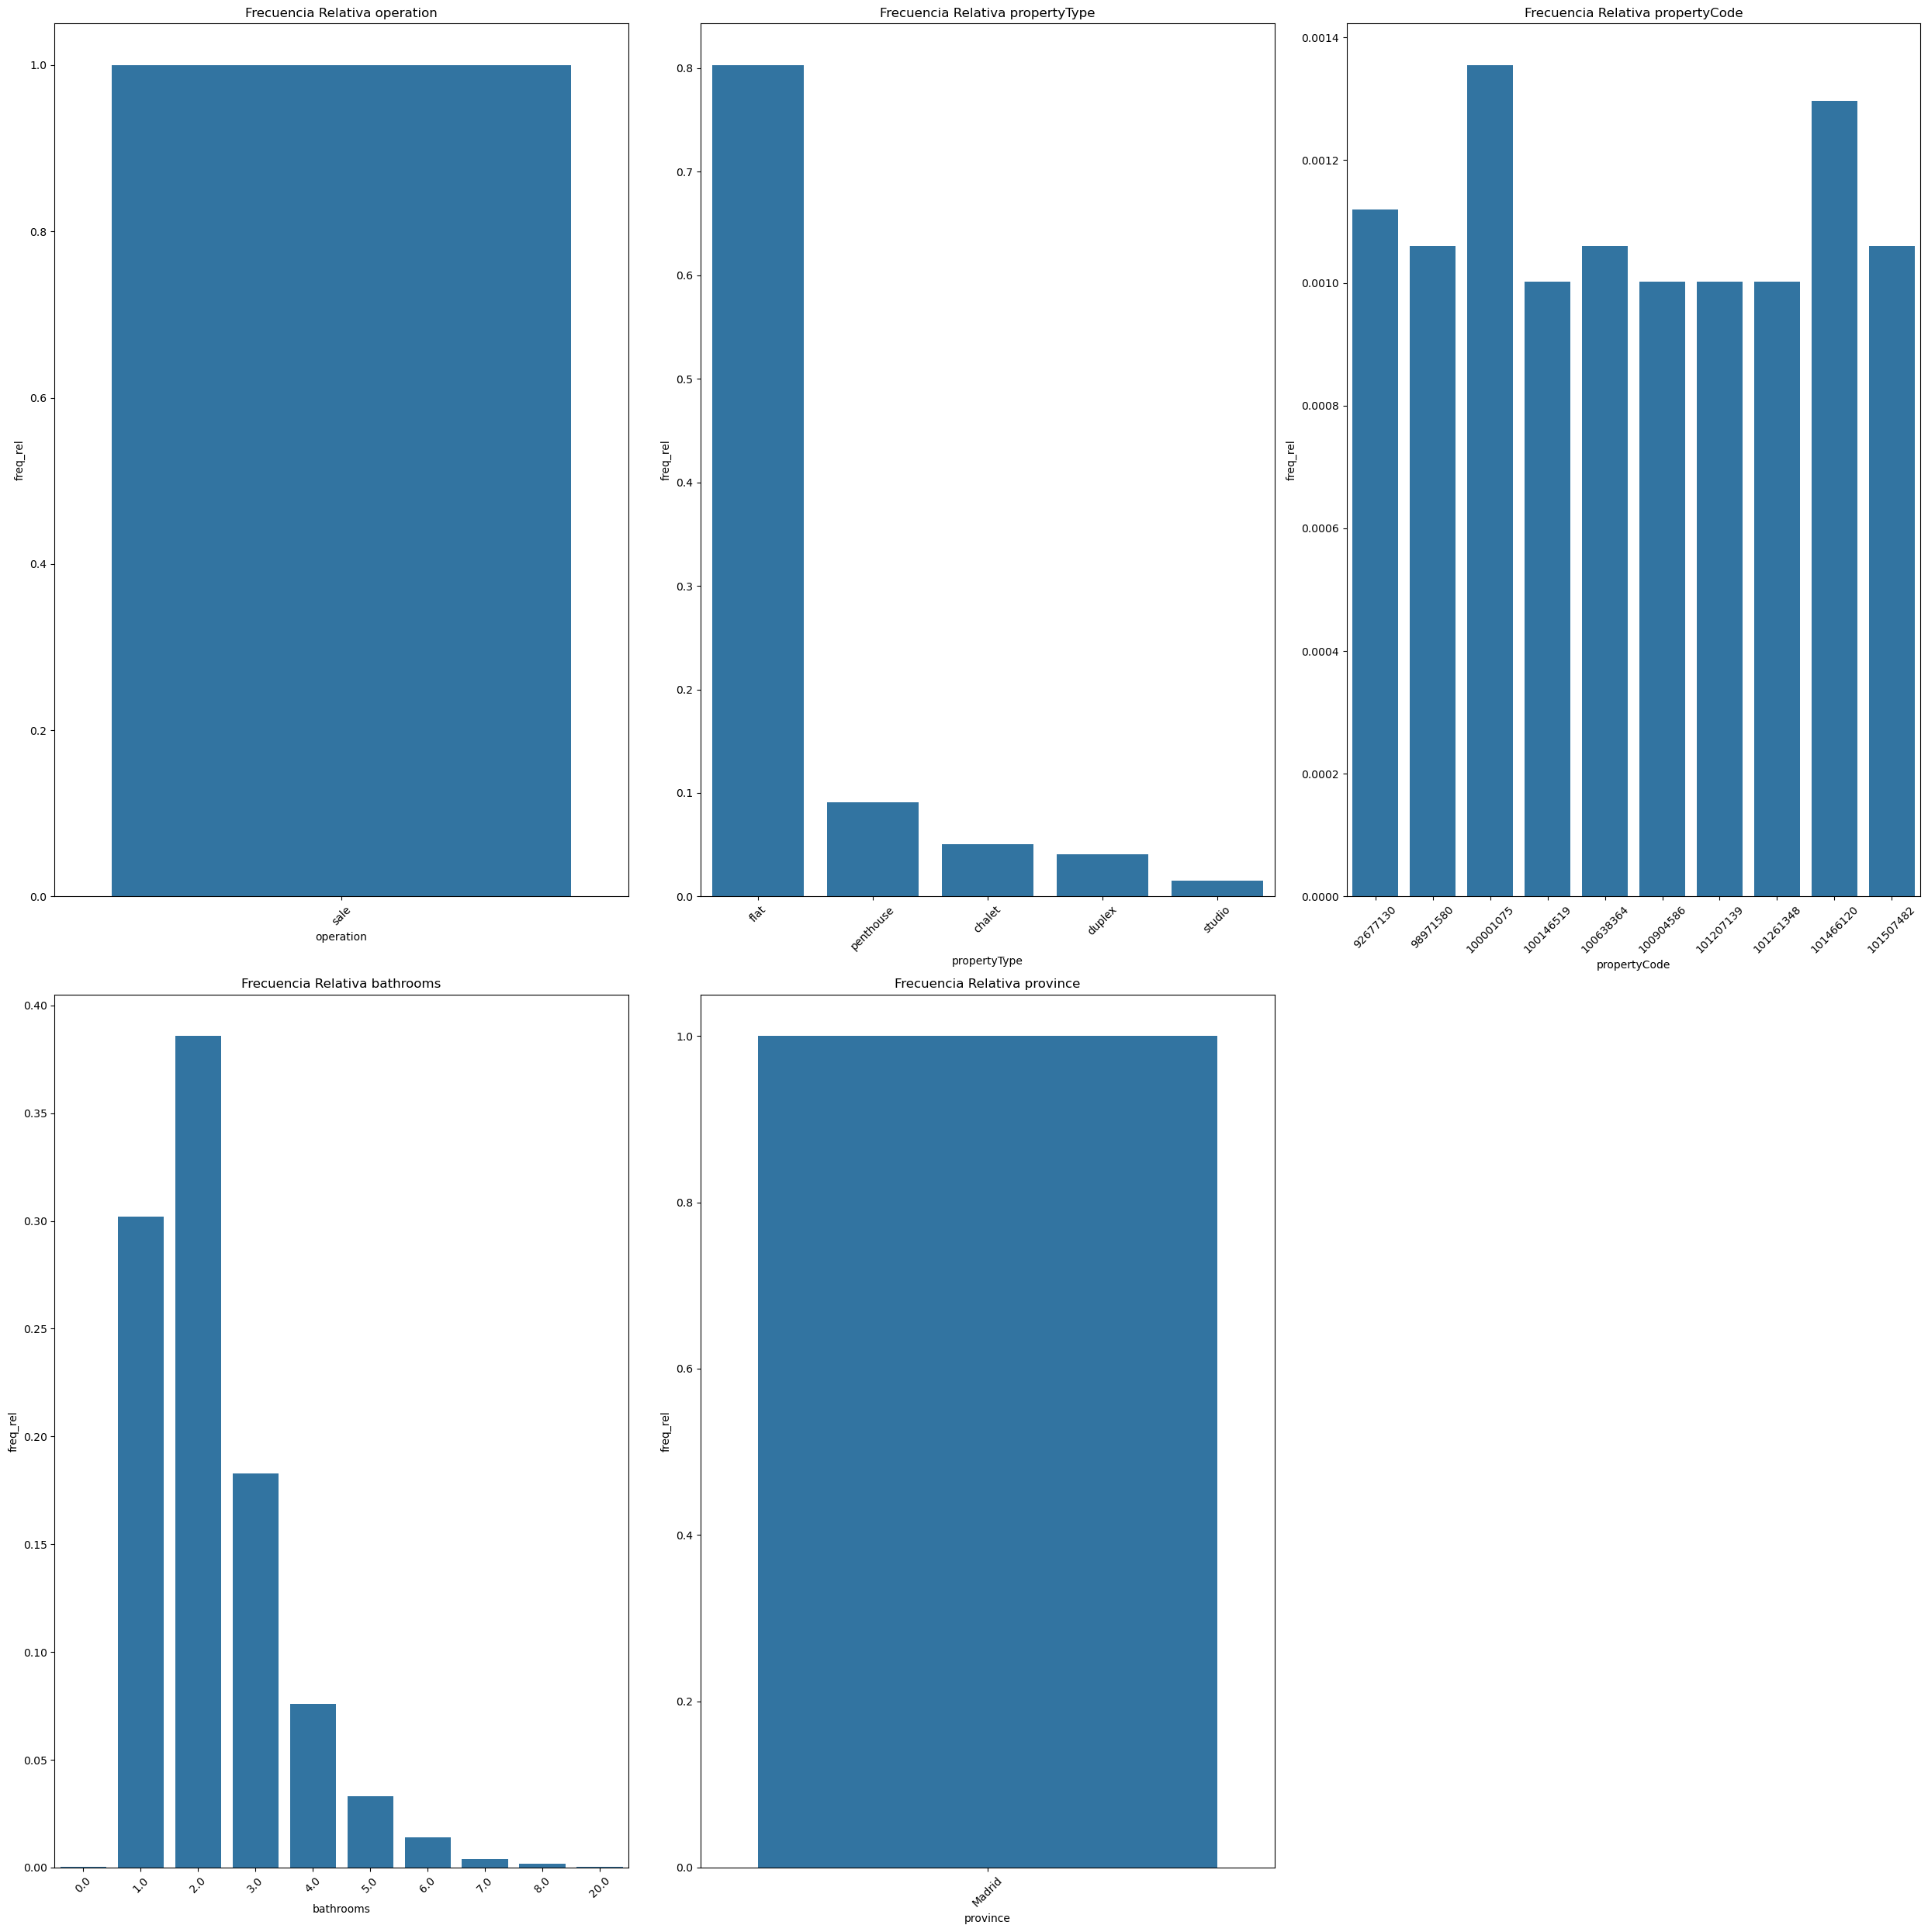

In [289]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

# 1. operation
freq_operation = (
    df_raw["operation"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_operation.columns = ["operation", "freq_rel"]

sns.barplot(
    data=freq_operation,
    x="operation",
    y="freq_rel",
    ax=axs[0]
)
axs[0].set_title("Frecuencia Relativa operation")
axs[0].tick_params(axis='x', rotation=45)

# 2. propertyType
freq_propertyType = (
    df_raw["propertyType"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_propertyType.columns = ["propertyType", "freq_rel"]

sns.barplot(
    data=freq_propertyType,
    x="propertyType",
    y="freq_rel",
    ax=axs[1]
)
axs[1].set_title("Frecuencia Relativa propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode (top 10)
freq_propertyCode = (
    df_raw["propertyCode"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_propertyCode.columns = ["propertyCode", "freq_rel"]

sns.barplot(
    data=freq_propertyCode,
    x="propertyCode",
    y="freq_rel",
    ax=axs[2]
)
axs[2].set_title("Frecuencia Relativa propertyCode")
axs[2].tick_params(axis='x', rotation=45)

# 4. bathrooms (top 10)
freq_bathrooms = (
    df_raw["bathrooms"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_bathrooms.columns = ["bathrooms", "freq_rel"]

sns.barplot(
    data=freq_bathrooms,
    x="bathrooms",
    y="freq_rel",
    ax=axs[3]
)
axs[3].set_title("Frecuencia Relativa bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
freq_province = (
    df_raw["province"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_province.columns = ["province", "freq_rel"]

sns.barplot(
    data=freq_province,
    x="province",
    y="freq_rel",
    ax=axs[4]
)
axs[4].set_title("Frecuencia Relativa province")
axs[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Operation :**
- En este apartado tratamos que tipo de operacion se ha llevado a cabo con los imuebles. En este todos son venta de propiedad

**PropertyType:**
- En este apartado comparamos que tio de viviendas son las mas demandadas y como vemos en el grafico se trara del tipo flat (apartamento)

**PropertyCode:**
-  Se trata del número de registro de los inmuebles

**Bathrooms:**
- Se categorizan las viviendas en función del número de baños que tienen, la mayoría disponen de 1

**Provice:**
- Como vemos en el gráfico de privincia todos los inmuebles están centrados en Madrid

### Columnas Sofía/ municipality-priceByArea
#### Análisis Categóricas

##### Frecuencia absoluta

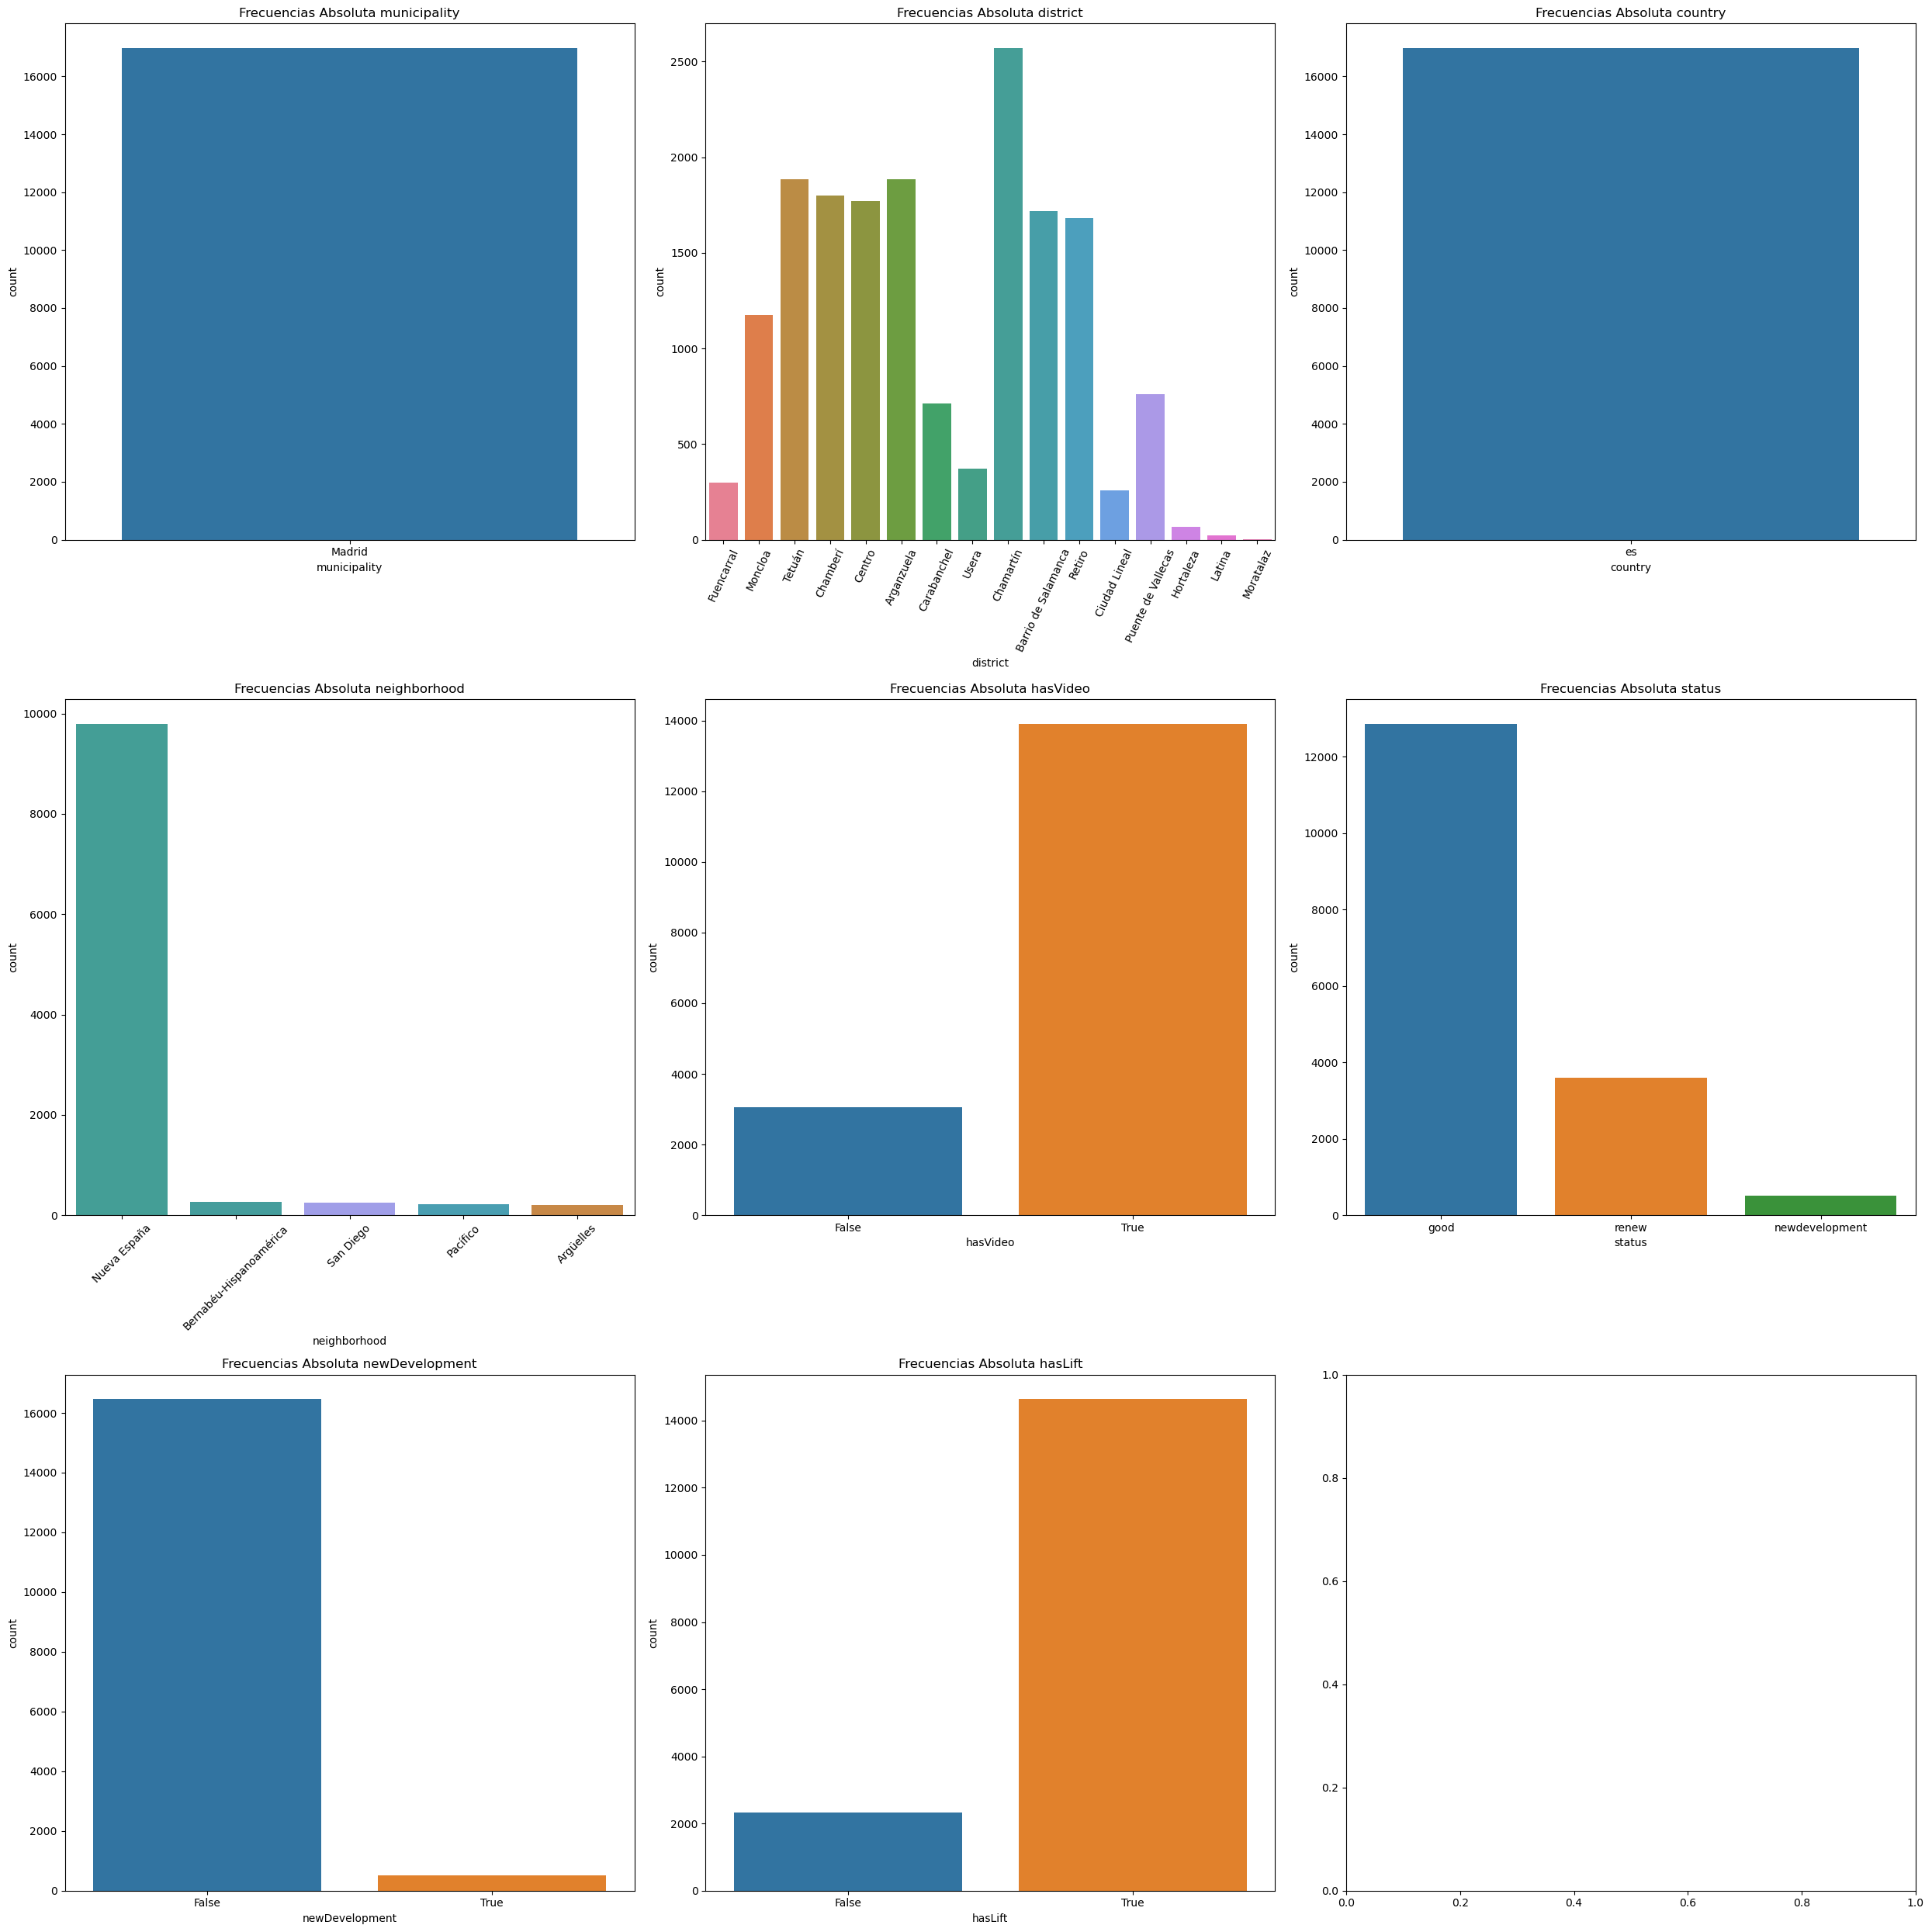

In [294]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
sns.countplot(x="municipality",
			  data=df_raw,
			  hue="municipality",
			  ax=axs[0],
			  legend=False)
axs[0].set_title("Frecuencias Absoluta municipality")

# Segunda figuraorder=df_raw["district"].value_counts().index
sns.countplot(x="district",
			  data=df_raw,
			  hue="district",
			  ax=axs[1],
			  legend=False)
axs[1].set_title("Frecuencias Absoluta district")
axs[1].tick_params(axis='x', rotation=65)

# Tercera figura
sns.countplot(x="country",
			  data=df_raw,
			  hue="country",
			  ax=axs[2],
			  legend=False)
axs[2].set_title("Frecuencias Absoluta country")

# Cuarta figura
sns.countplot(x="neighborhood",
			  data=df_raw,
			  hue="neighborhood",
			  ax=axs[3],
			  order=df_raw["neighborhood"].value_counts().index[:5],
			  legend=False)
axs[3].set_title("Frecuencias Absoluta neighborhood")
axs[3].tick_params(axis='x', rotation=45)

# Quinta figura
sns.countplot(x="hasVideo",
			  data=df_raw,
			  hue="hasVideo",
			  ax=axs[4],
			  legend= False)
axs[4].set_title("Frecuencias Absoluta hasVideo")

# Sexta figura
sns.countplot(x="status",
			  data=df_raw,
			  hue="status",
			  ax=axs[5],
			  legend= False)
axs[5].set_title("Frecuencias Absoluta status")

# Septima figura
sns.countplot(x="newDevelopment",
			  data=df_raw,
			  hue="newDevelopment",
			  ax=axs[6],
			  legend= False)
axs[6].set_title("Frecuencias Absoluta newDevelopment")

# Octava figura
sns.countplot(x="hasLift",
			  data=df_raw,
			  hue= "hasLift",
			  ax= axs[7],
			  legend= False)
axs[7].set_title("Frecuencias Absoluta hasLift")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Frecuencia relativa

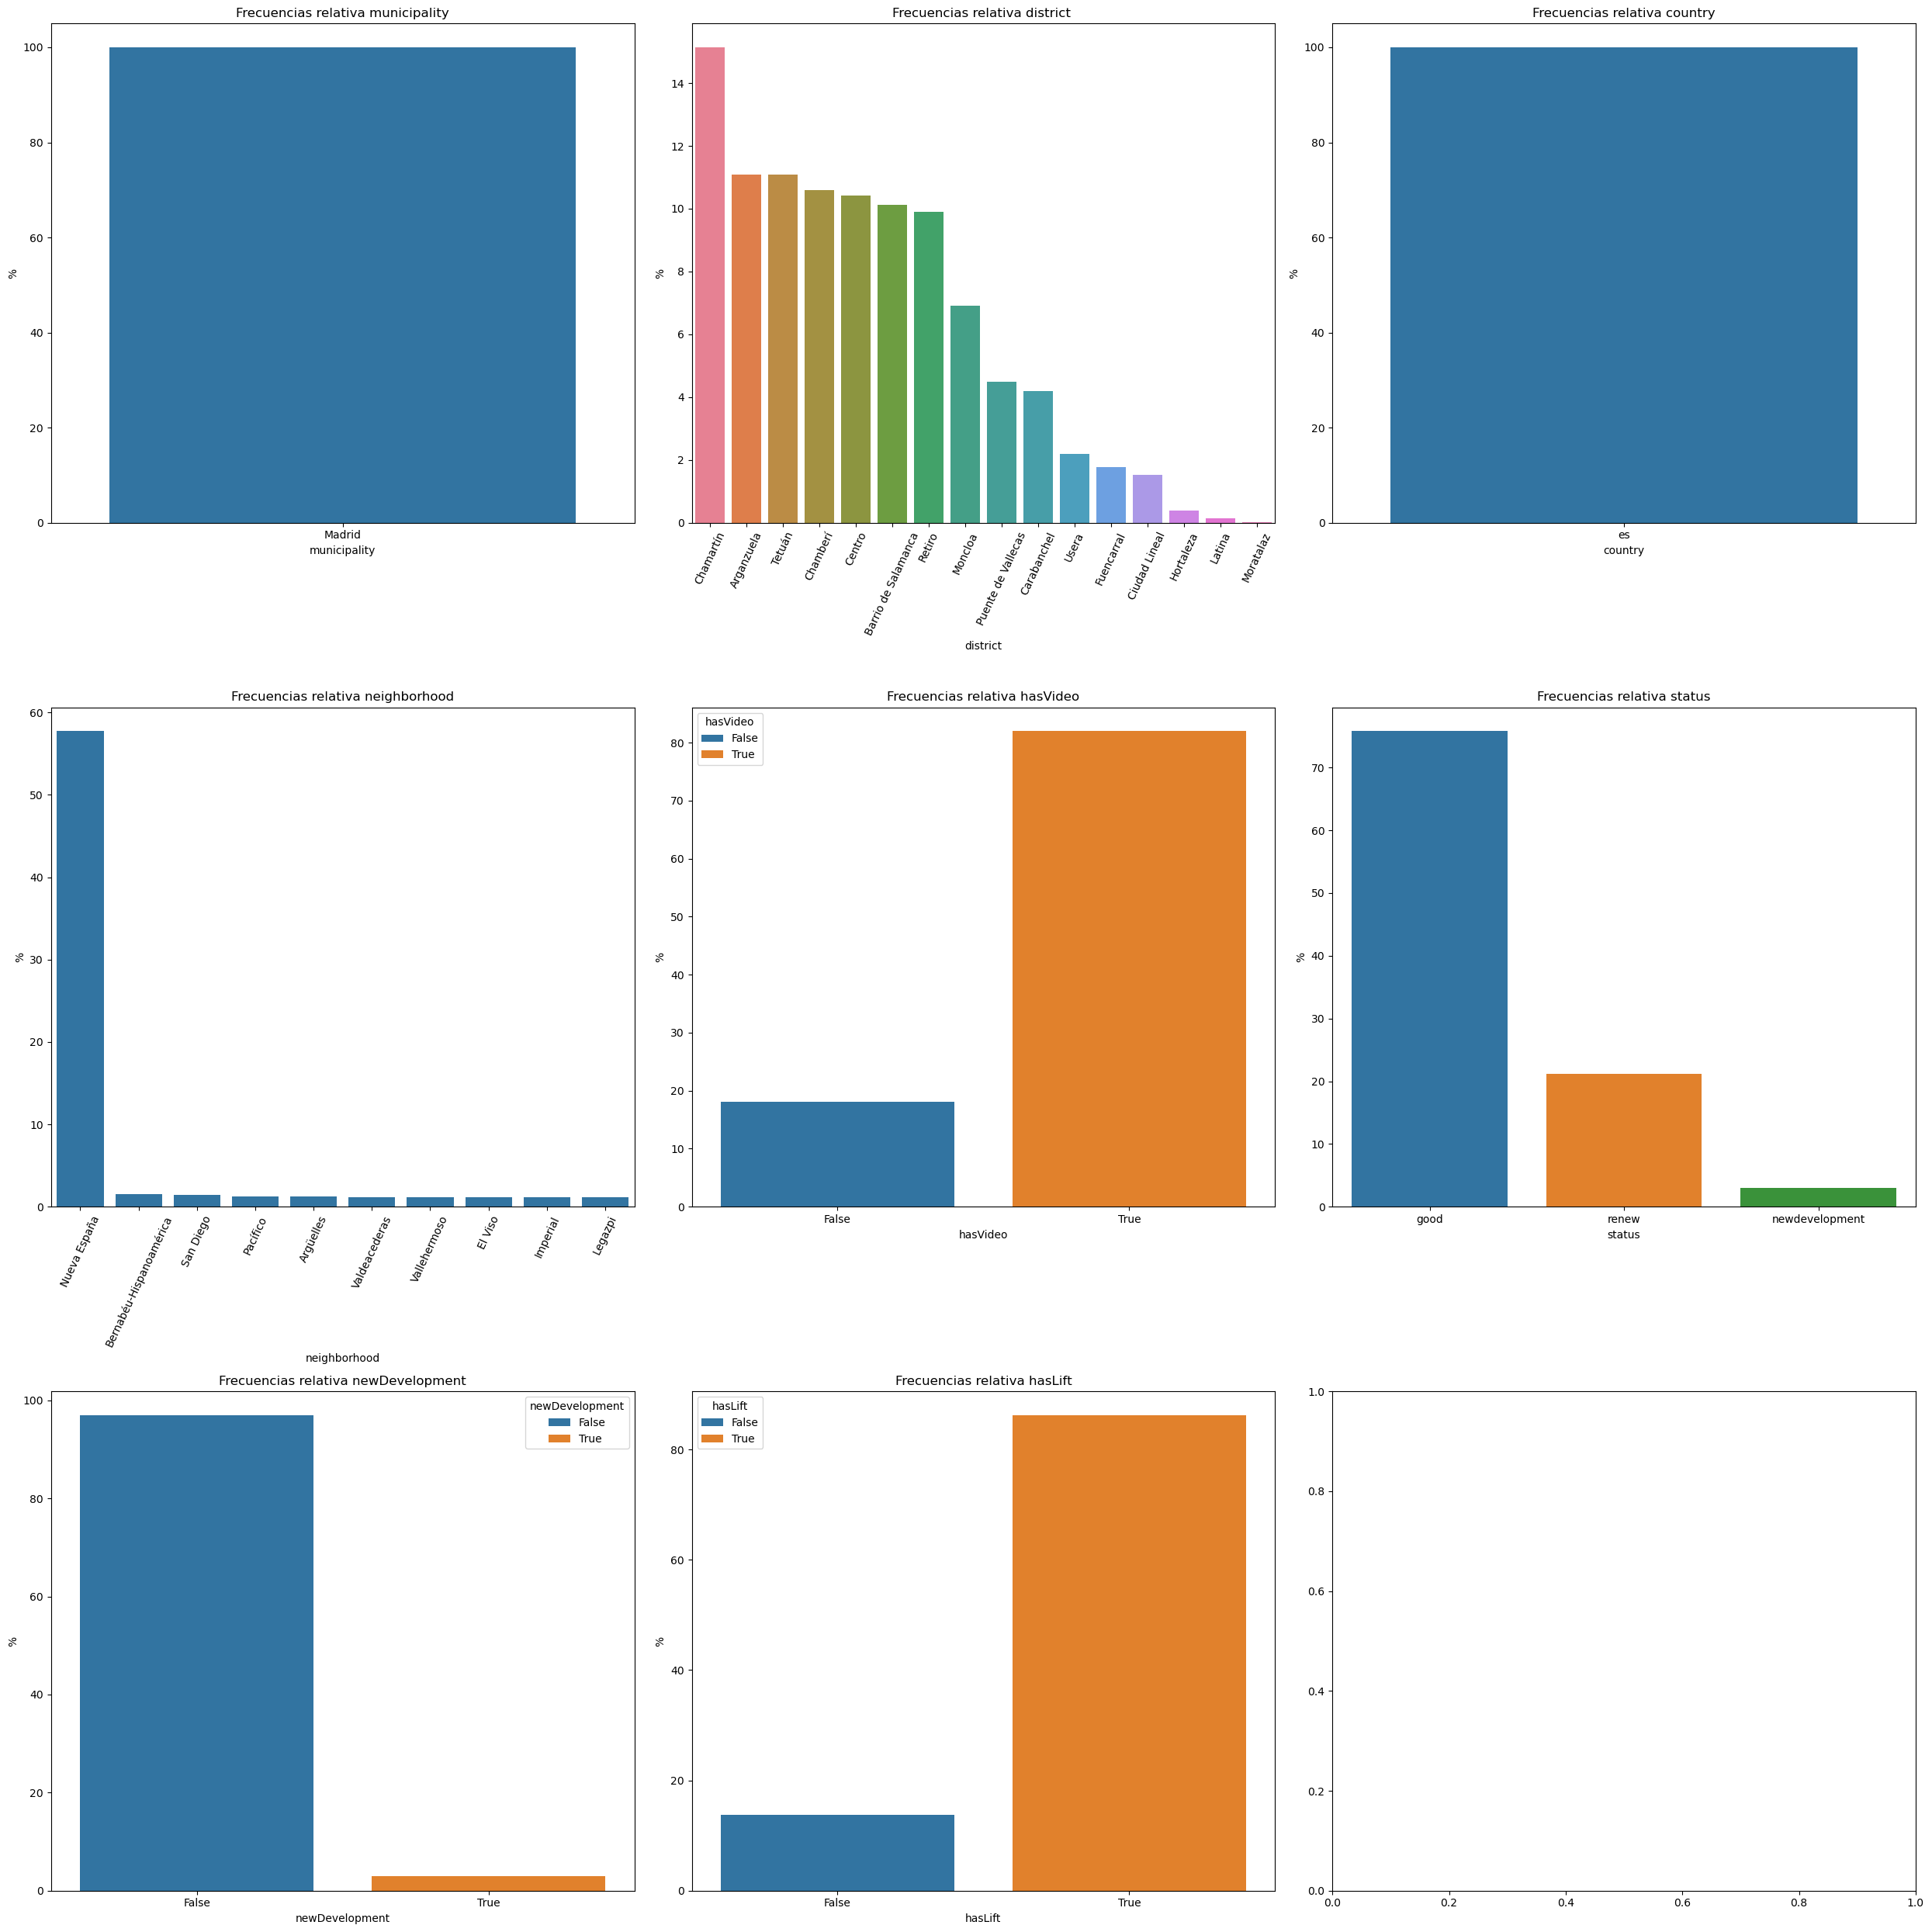

In [296]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
valores = df_raw.municipality.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index,  ax = axs[0])
axs[0].set_title("Frecuencias relativa municipality")
axs[0].set_ylabel("%")


# Segunda figura
valores = df_raw.district.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativa district ")
axs[1].set_ylabel("%")
axs[1].tick_params(axis='x', rotation=65)


# Tercera figura
valores = df_raw.country.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2])
axs[2].set_title("Frecuencias relativa country")
axs[2].set_ylabel("%")

# Cuarta figura
valores = df_raw.neighborhood.value_counts(normalize = True) * 100
top_barrios = valores.nlargest(10)
sns.barplot(x=top_barrios.index, y=top_barrios.values, ax = axs[3])
axs[3].set_title("Frecuencias relativa neighborhood")
axs[3].set_ylabel("%")
axs[3].tick_params(axis='x', rotation=65)


# Quinta figura
valores = df_raw.hasVideo.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[4])
axs[4].set_title("Frecuencias relativa hasVideo")
axs[4].set_ylabel("%")

# Sexta figura
valores = df_raw.status.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[5])
axs[5].set_title("Frecuencias relativa status")
axs[5].set_ylabel("%")

# Septima figura
valores = df_raw.newDevelopment.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[6])
axs[6].set_title("Frecuencias relativa newDevelopment")
axs[6].set_ylabel("%")

# Octava figura
valores = df_raw.hasLift.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[7])
axs[7].set_title("Frecuencias relativa hasLift")
axs[7].set_ylabel("%")


plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

#### Análisis numéricas

In [297]:
numéricas.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex,parkingSpacePrice
count,1.697600e+04,7445.000000,1.697600e+04,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,2393.000000,738.000000
mean,1.012360e+08,34.536467,9.088270e+05,148.357564,2.986923,2.222432,40.429523,-3.693213,5719.913172,598.073966,32743.021680
std,4.972829e+06,14.096578,9.178839e+05,106.105628,1.430184,1.238082,0.026237,0.017452,2469.852379,345.670428,17910.713089
min,2.809747e+07,0.000000,6.000000e+04,21.000000,0.000000,0.000000,40.381682,-3.725622,911.000000,0.000000,150.000000
25%,1.007357e+08,26.000000,3.590000e+05,80.000000,2.000000,1.000000,40.406951,-3.708135,4096.000000,299.000000,20000.000000
50%,1.018816e+08,33.000000,6.100000e+05,118.000000,3.000000,2.000000,40.429536,-3.693824,5187.000000,598.000000,29000.000000
75%,1.030968e+08,42.000000,1.129000e+06,182.000000,4.000000,3.000000,40.452797,-3.677042,6818.000000,897.000000,40000.000000
max,1.046568e+08,108.000000,1.180000e+07,995.000000,18.000000,20.000000,40.477295,-3.661150,18689.000000,1197.000000,120000.000000


##### IQR

In [299]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)
for col in numéricas.columns:
    print(f"{col}: {get_IQR(df_raw, col)}")

propertyCode: 2361113.0
numPhotos: 0.0
price: 770000.0
size: 102.0
rooms: 2.0
bathrooms: 2.0
latitude: 0.04584599999999739
longitude: 0.031092974999999967
priceByArea: 2722.0
ex: 0.0
parkingSpacePrice: 0.0


##### Rangos

In [300]:
numéricas.describe().loc["max"] - numéricas.describe().loc["min"]

propertyCode         7.655931e+07
numPhotos            1.080000e+02
price                1.174000e+07
size                 9.740000e+02
rooms                1.800000e+01
bathrooms            2.000000e+01
latitude             9.561330e-02
longitude            6.447250e-02
priceByArea          1.777800e+04
ex                   1.197000e+03
parkingSpacePrice    1.198500e+05
dtype: float64

In [72]:
# IQR (donde está el 50% de las casas "normales") con el Rango (la distancia total entre el valor más bajo y el más alto).

#### IQR/ RANGO

**parkingSpacePrice:**
- IQR: 0.0 | Rango: 11985.0
- Al ser el IQR de 0.0, la gran mayoría de los anuncios tienen el precio del estacionamineto incluído en el precio de la vivienda.

**Numphotos:**
- IQR: 0.0 | Rango: 108.0
- Al ser el IQR de 0.0, la gran mayoría de los anuncios tienen la misma cantidad de fotos, mientras que el rango indica que solo unos pocos anuncios tienen muchas imágenes.

**Price:**
- IQR: 770,000 | Rango: 11,740,000
- Existe una gran diferencia entre el rango y el IQR. Mientras que la mayoría de las casas se mueven en un margen de 770 mil euros, el total llega hasta los 11 millones
- Esto explica que el promedio está muy inflado por unas pocas propiedades de lujo que no representan a la mayoría

**Size:**
- IQR: 102.0 | Rango: 974.0
- El rango es casi 10 veces más grande que el IQR
- Casi todas las viviendas tienen un tamaño parecido de 100 metros, pero hay un par de propiedades muy grandes que hacen que el rango se vea mayor

**Rooms/ Bathrooms:**
- IQR: 2.0 | Rango: 18.0/20.0
- El rango es desproporcionado respecto al IQR
- Casi todos los inmuebles tienen 2 habitaciones/baños. Los valores cercanos a 18/20 son casos aislados o errores de datos

**Latitude/Longitude:**
- IQR: 0.04 / 0.03 | Rango: 0.09 / 0.06
- Dispersión baja
- Los datos están geográficamente muy compactos. El IQR representa una gran parte del rango, lo que indica que no hay outliers significativos

**PriceByArea:**
- IQR: 2,722.0 | Rango: 17,778.0
- Dispersión alta
- Aunque la mayoría de los precios por metro están cerca unos de otros, hay zonas específicas donde el suelo es muchísimo más caro de lo normal





##### CV

In [302]:
# Obtenemos sus CV con una función
def get_CV(df_raw, columna):
    # Si columna es un DataFrame lo convierte en una lista de nombres
    if isinstance(columna, pd.DataFrame):
        columna = columna.columns.tolist()
    
    desc = df_raw[columna].describe().T
    return desc["std"] / desc["mean"] * 100

get_CV(df_raw, numéricas)

propertyCode           4.912113
numPhotos             27.029255
price                100.996550
size                  71.520201
rooms                 47.881510
bathrooms             55.708460
latitude               0.064897
longitude             -0.472529
priceByArea           43.179893
ex                    21.696168
parkingSpacePrice     11.397851
dtype: float64

#### CV

**NumPhotos: 27.02%**  
- Dispersión moderada
- Los datos no son homogeneos, pero están relativamente concentrados alrededor de la media

**Price: 100.99%**  
- Dispersión muy alta (más del 100%)
- Significa que la desviación estándar es mayor que la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes  

**Size: 71.52%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Rooms: 47.88%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Bathrooms: 55.70%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Latitude:  0.06%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**Longitude:  0.47%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**PriceByArea: 43.17%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**ex: 21.69%**
- Dispersión moderada
- Los datos no son homogeneos, pero están relativamente concentrados alrededor de la media

**parkingSpacePrice: 11.39%**
- Dispersión baja
- Los datos son homogeneos, están concentrados alrededor de la media

##### Distribución: Histrogramas, Funciones Densidad (KDE)

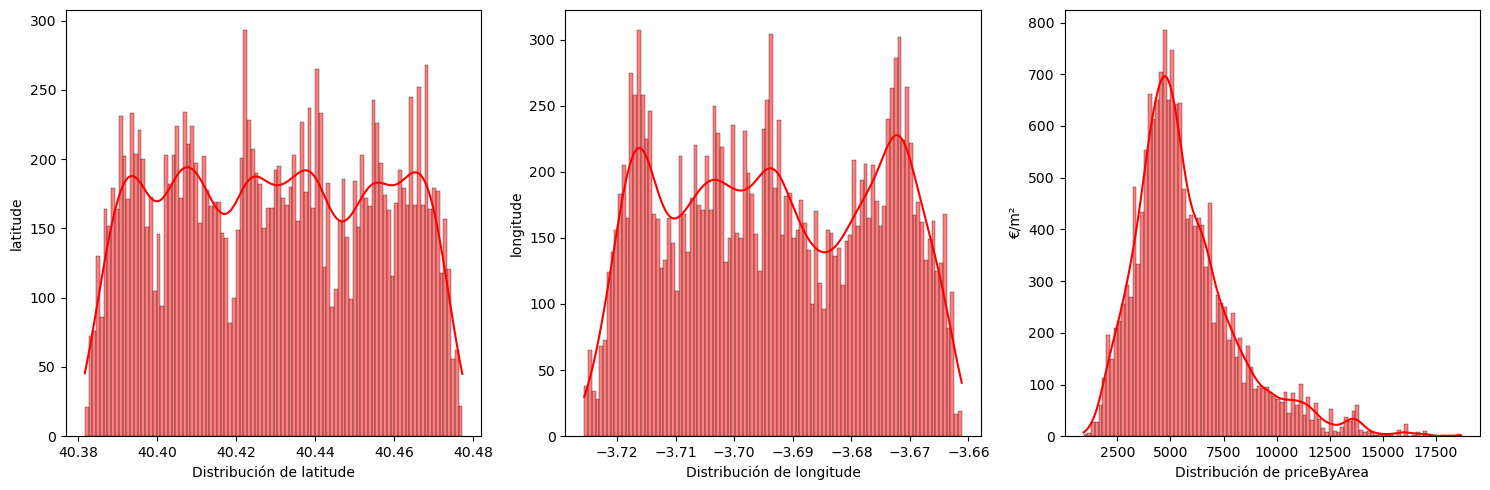

In [303]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.histplot(df_raw["latitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[0]) 
axs[0].set_xlabel("Distribución de latitude")
axs[0].set_ylabel("latitude")

# Segunda figura
sns.histplot(df_raw["longitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[1]) 
axs[1].set_xlabel("Distribución de longitude")
axs[1].set_ylabel("longitude")

# Tercera figura
sns.histplot(df_raw["priceByArea"],
             kde=True,
             color='r',
             bins=100, ax = axs[2]) 
axs[2].set_xlabel("Distribución de priceByArea")
axs[2].set_ylabel("€/m²")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Boxplot

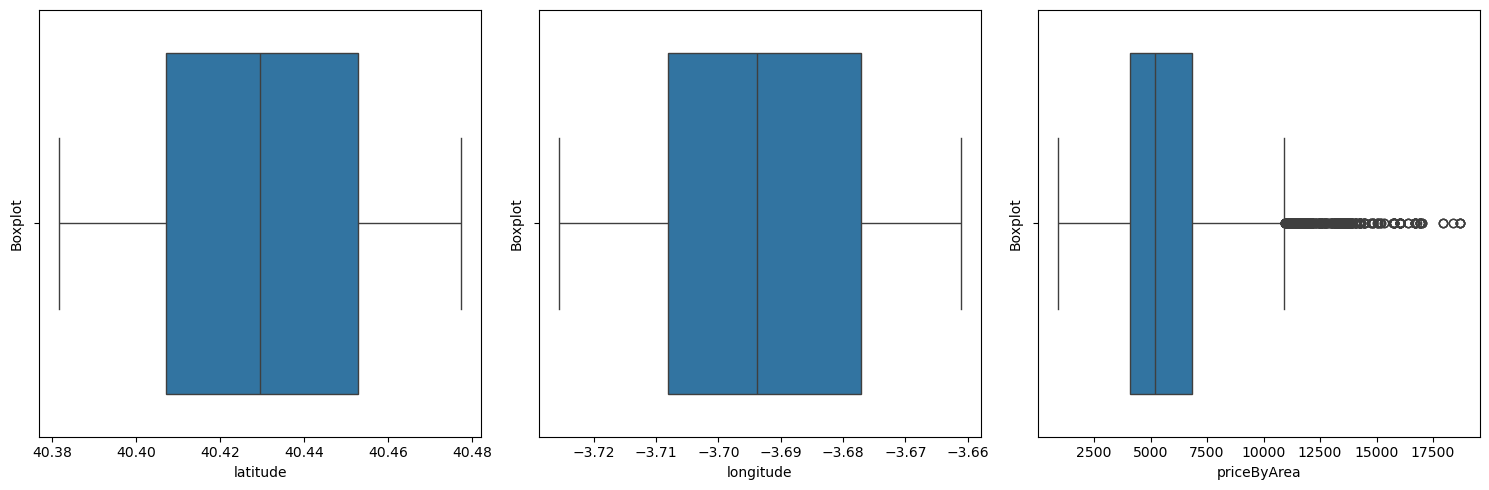

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.boxplot(x = "latitude", data = df_raw, ax= axs[0])
axs[0].set_xlabel("latitude")
axs[0].set_ylabel("Boxplot")

# Segunda figura
sns.boxplot(x = "longitude", data = df_raw, ax= axs[1])
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("Boxplot")

# Tercera figura
sns.boxplot(x = "priceByArea", data = df_raw, ax= axs[2])
axs[2].set_xlabel("priceByArea")
axs[2].set_ylabel("Boxplot")

plt.tight_layout()
plt.show()

#### Distribución y Boxplots

**Latitude y Longitude:**
- Al observar los histogramas de latitud y longitud, se pueden ver varios picos muy marcados. Me gustaría saber si el pico más alto de oferta (donde hay más propiedades) coincide con los precios más bajos o si, por el contrario los puntos más densos son también los más caros.

**PriceByArea:**
- Como podemos observar priceByArea tiene una cola muy larga hacia la derecha, Se podría generar un nuevo histograma de priceByArea filtrando los valores más altos (outliers). Esto nos permitirá ver con mucha más claridad si la mayoría de los precios se agrupan en una campana normal o si hay otros subgrupos ocultos.

### Análisis Bivariante/Multivariante

In [314]:
df_normalized.loc[~mask, ["price", "priceByArea"]].describe()

,price,priceByArea
count,1.520700e+04,15207.000000
mean,9.149919e+05,5615.869402
std,9.424195e+05,2466.205412
min,6.000000e+04,911.000000
25%,3.540000e+05,4000.000000
50%,5.999000e+05,5088.000000
75%,1.150000e+06,6650.000000
max,1.180000e+07,18689.000000


#### Price y floor

Comprobación Hipótesis

#### Price y propertyType

Comprobación Hipótesis

#### Price y size

Comprobación Hipótesis

#### Price y rooms

Comprobación Hipótesis

#### Price y district

Comprobación Hipótesis

#### Price y status

Comprobación Hipótesis

#### Price y hasParkingSpace

Comprobación Hipótesis

#### Price y hasLift

Comprobación Hipótesis

#### PricebyAre y district

Comprobación Hipótesis

#### Price y PricebyArea

Comprobación Hipótesis

#### Price, priceByArea y district

## ANEXO
Esta sección de anexo sirve para agregar gráficas y exploración de datos que sustenten las hipotesis

### Relación entre `floor` y `hasLift`
Análizamos el precio de la vivienda y según el piso y si posee ascensor o no. En primera instancia, quitamos semi-sótanos, sótanos, entrepisos y bajos.

In [473]:
expr = "floor != 'st' and floor != 'ss' and floor != 'en' and floor != 'bj'"
data = df_normalized.query(expr).dropna(subset="floor")
data["floor"] = data["floor"].astype(int)

gt5 = data["floor"] >= 5
print("Propiedades que sean de un quinto piso o más")
data.loc[mask, ["price", "priceByArea"]].describe()

Propiedades que sean de un quinto piso o más


,price,priceByArea
count,1.593000e+03,1593.000000
mean,8.912591e+05,6718.682360
std,6.846267e+05,2309.507949
min,1.040000e+05,3183.000000
25%,4.450000e+05,5030.000000
50%,6.800000e+05,6423.000000
75%,1.080000e+06,7783.000000
max,3.600000e+06,14085.000000


In [474]:
print("Propiedades que sean menores a un quinto piso")
data.loc[~mask, ["price", "priceByArea"]].describe()

Propiedades que sean menores a un quinto piso


,price,priceByArea
count,1.191900e+04,11919.000000
mean,8.835251e+05,5708.636714
std,8.699873e+05,2444.959830
min,6.950000e+04,911.000000
25%,3.750000e+05,4125.000000
50%,6.100000e+05,5169.000000
75%,1.100000e+06,6696.000000
max,1.180000e+07,18689.000000


Como se puede apreciar, las medianas de `price` y `priceByArea` en comparación entre propiedades que se encuentran en una planta igual o superior al quinto difiere.

Hay una diferencia de un 25% respecto a la mediana de `priceByArea` de los pisos que se encuentran en plantas superiores al quinto respecto a las inferiores.

Veamos que sucede con relación al ascensor y su impacto en `priceByArea`.

/tmp/ipykernel_21889/3459487303.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  to_plot = data[mask].groupby(by=["hasLift"])["price"].median()
/tmp/ipykernel_21889/3459487303.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  to_plot = data[~mask].groupby(by=["hasLift"])["price"].median()


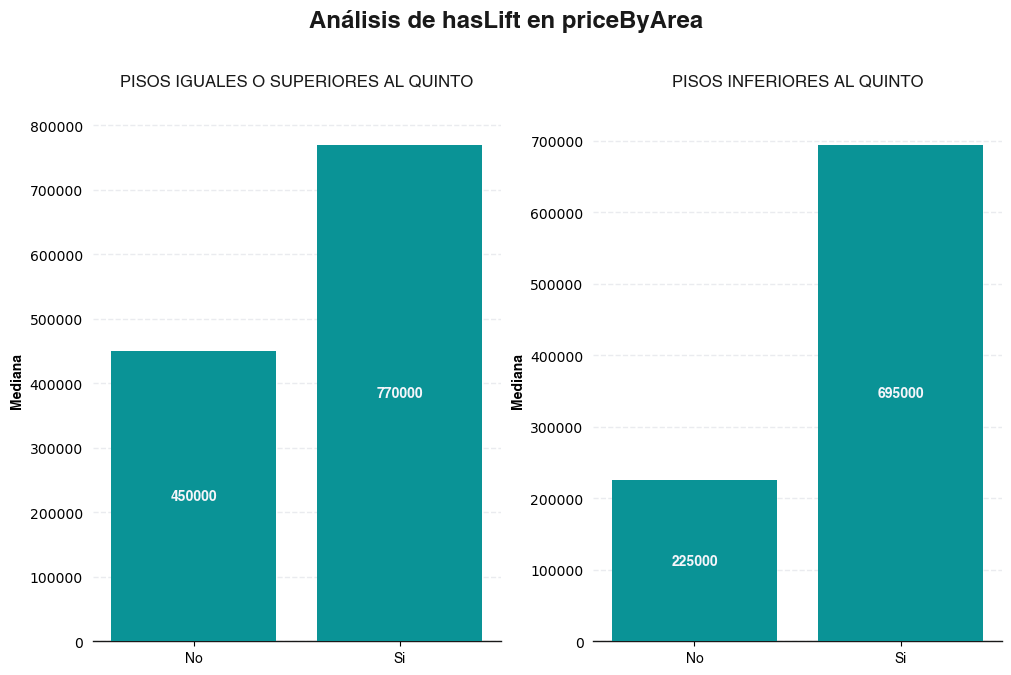

In [484]:
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(10, 6),
					   layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasLift en priceByArea",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data[mask].groupby(by=["hasLift"])["price"].median()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax[0].set_title("Pisos iguales o superiores al quinto".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax[0].bar(x=to_plot.index,
			   height=to_plot.values,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[0].bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax[0].tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax[0].set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["No", "Si"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[0].set_ylabel("Mediana", fontdict=font_config)
ax[0].grid(axis="x", visible=False)
ax[0].grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax[0].spines["bottom"].set_linewidth(1)
ax[0].spines["bottom"].set_color("#191919")
ax[0].spines[["left", "top", "right"]].set_visible(False)




#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data[~mask].groupby(by=["hasLift"])["price"].median()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax[1].set_title("Pisos inferiores al quinto".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax[1].bar(x=to_plot.index,
			   height=to_plot.values,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[1].bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax[1].tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax[1].set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["No", "Si"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[1].set_ylabel("Mediana", fontdict=font_config)
ax[1].grid(axis="x", visible=False)
ax[1].grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax[1].spines["bottom"].set_linewidth(1)
ax[1].spines["bottom"].set_color("#191919")
ax[1].spines[["left", "top", "right"]].set_visible(False)

plt.savefig(f"../img/hasLift en priceByArea")
plt.show()

/tmp/ipykernel_21889/2601238280.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  to_plot = data[mask].groupby(by=["hasLift"])["price"].median()
/tmp/ipykernel_21889/2601238280.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  to_plot = data[~mask].groupby(by=["hasLift"])["price"].median()


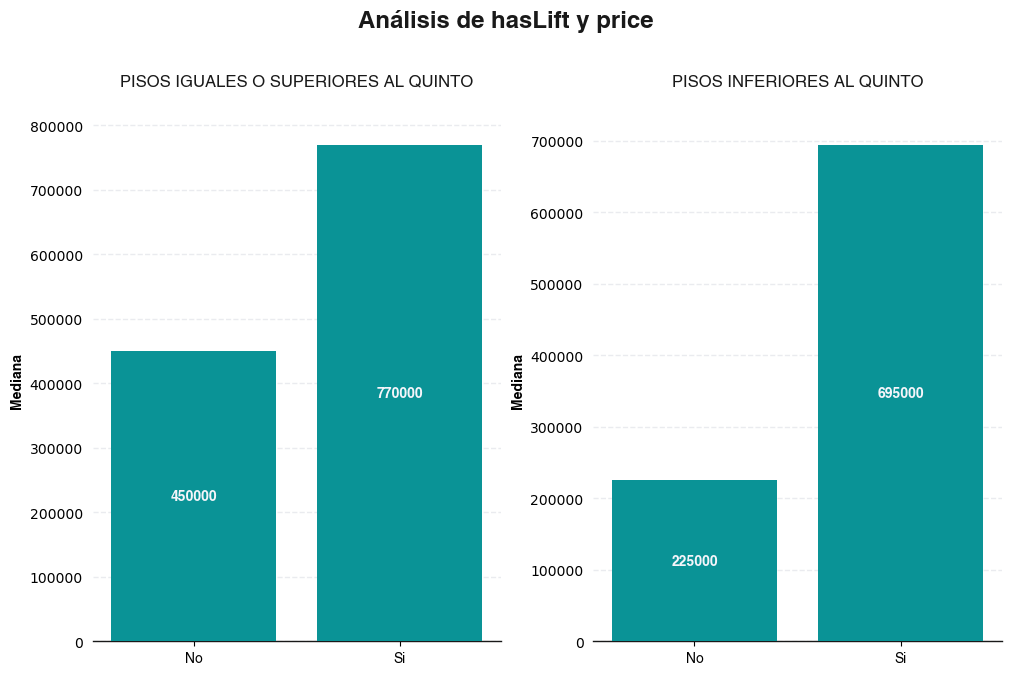

In [487]:
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(10, 6),
					   layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasLift y price",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data[mask].groupby(by=["hasLift"])["price"].median()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax[0].set_title("Pisos iguales o superiores al quinto".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax[0].bar(x=to_plot.index,
				  height=to_plot.values,
				  data=to_plot,
				  facecolor="#0a9396",
				  zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[0].bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax[0].tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax[0].set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["No", "Si"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[0].set_ylabel("Mediana", fontdict=font_config)
ax[0].grid(axis="x", visible=False)
ax[0].grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax[0].spines["bottom"].set_linewidth(1)
ax[0].spines["bottom"].set_color("#191919")
ax[0].spines[["left", "top", "right"]].set_visible(False)



#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data[~mask].groupby(by=["hasLift"])["price"].median()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax[1].set_title("Pisos inferiores al quinto".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax[1].bar(x=to_plot.index,
				  height=to_plot.values,
				  data=to_plot,
				  facecolor="#0a9396",
				  zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[1].bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax[1].tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax[1].set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["No", "Si"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax[1].set_ylabel("Mediana", fontdict=font_config)
ax[1].grid(axis="x", visible=False)
ax[1].grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax[1].spines["bottom"].set_linewidth(1)
ax[1].spines["bottom"].set_color("#191919")
ax[1].spines[["left", "top", "right"]].set_visible(False)


plt.savefig(f"../img/hasLift en price")
plt.show()

Como se puede apreciar, la ausencia de ascensor reduce significativamente el precio en pisos, afectando particularmente a los pisos de planta baja.

### Relación entre `exterior` y `price`

Veamos como afecta el precio si la propiedad es interior/exterior.

In [362]:
df_normalized.groupby(by=["exterior"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
exterior,,,,,,,,
False,2203.0,735087.842488,922057.583811,69500.0,245000.0,410000.0,847000.0,10500000.0
True,14000.0,871165.518429,838350.611958,60000.0,370000.0,620000.0,1097500.0,11800000.0


En primer instancia ya vemos como afecta el precio. La mediana de `price` es mayor en aquellos que son exterior.

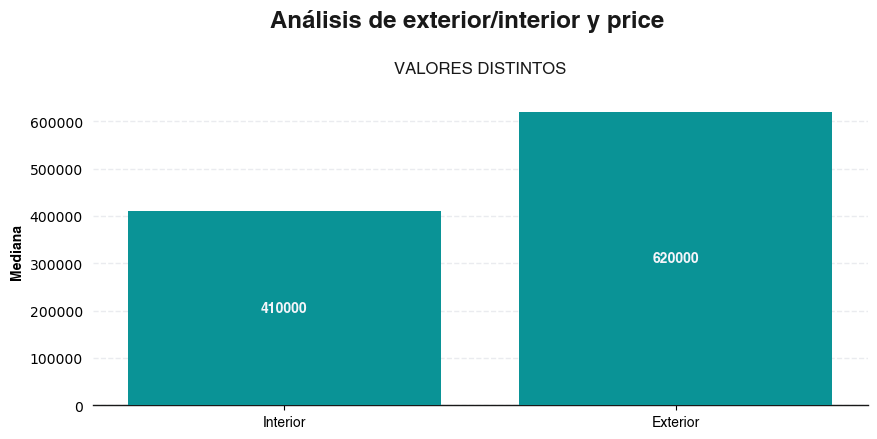

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de exterior/interior y price",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = df_normalized.groupby(by=["exterior"])["price"].median()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax.set_title("Valores distintos".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.bar(x=to_plot.index,
			   height=to_plot.values,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax.set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["Interior", "Exterior"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Mediana", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)

plt.show()

In [518]:
data = df_normalized[["exterior", "priceByArea", "price"]].dropna(subset="exterior")
data["exterior"] = data["exterior"].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16203 entries, 0 to 29921
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exterior     16203 non-null  bool   
 1   priceByArea  16203 non-null  float64
 2   price        16203 non-null  float64
dtypes: bool(1), float64(2)
memory usage: 395.6 KB


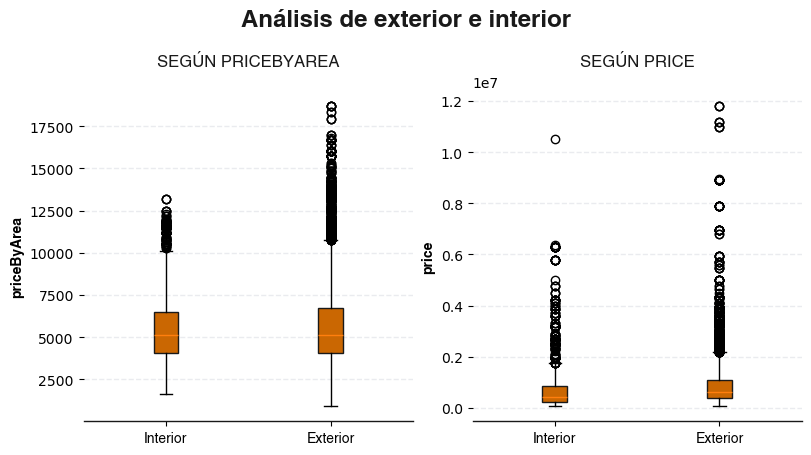

In [529]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						figsize=(8, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de exterior e interior",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Según priceByArea".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}

groups = data.groupby("exterior")["priceByArea"]
values = [g.values for _, g in groups]
labels = ["Interior", "Exterior"]

box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[0].boxplot(x=values,
			   tick_labels=labels,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[0].set_xticks(ticks=[y + 1 for y in range(len(labels))],
				  labels=labels,
				  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].set_ylabel("priceByArea", fontdict=font_config)
axs[0].grid(axis="x", visible=False)
axs[0].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].spines["bottom"].set_color("#191919")
axs[0].spines[["left", "top", "right"]].set_visible(False)




font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Según price".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}

groups = data.groupby("exterior")["price"]
values = [g.values for _, g in groups]
labels = ["Interior", "Exterior"]

box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[1].boxplot(x=values,
			   tick_labels=labels,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=[y + 1 for y in range(len(labels))],
				  labels=labels,
				  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_ylabel("price", fontdict=font_config)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.savefig(f"../img/distribucion segun exterior e interior")
plt.show()

Se puede apreciar que la mediana se "mantiene" en `priceByArea` independientemente si es exterior e interior, pero la misma varia respecto al `precio` para propiedades que se encuentra en el exterior.

### Impacto de `district`
#### `size`

In [405]:
df_normalized.groupby(by=["district"])["size"].describe().sort_values(by="50%")

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Puente de Vallecas,762.0,81.555118,38.288108,22.0,54.00,72.0,102.0,230.0
Usera,371.0,80.773585,26.723154,30.0,62.00,78.0,92.0,178.0
Carabanchel,711.0,84.909986,29.297028,34.0,65.50,82.0,102.0,300.0
Arganzuela,1884.0,98.581741,46.144952,27.0,70.00,93.0,119.0,384.0
Tetuán,1883.0,114.510887,71.633723,26.0,67.00,93.0,139.0,477.0
Latina,23.0,134.217391,88.641236,52.0,76.00,102.0,159.0,288.0
Centro,1769.0,124.876201,72.228043,21.0,74.00,110.0,160.0,500.0
Moncloa,1175.0,151.292766,107.289469,22.0,73.00,110.0,184.0,500.0
Retiro,1681.0,134.790601,74.143034,26.0,97.00,120.0,158.0,746.0


In [439]:
data = df_normalized.groupby(by=["district"])["size"].describe().sort_values(by="50%", ascending=False)
data["50%"].head()

district
Hortaleza              250.0
Chamartín              198.0
Moratalaz              159.5
Chamberí               157.0
Barrio de Salamanca    151.0
Name: 50%, dtype: float64

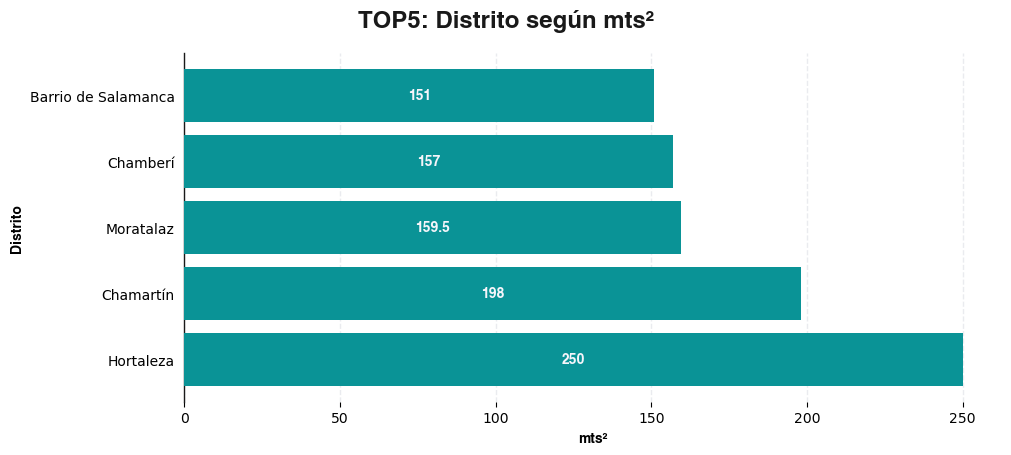

In [440]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("TOP5: Distrito según mts²",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
to_plot = data[:5]
rects = ax.barh(width="50%",
			   y=to_plot.index,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Distrito", fontdict=font_config)
ax.set_xlabel("mts²", fontdict=font_config)
ax.grid(axis="y", visible=False)
ax.grid(axis="x",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["left"].set_linewidth(1)
ax.spines["left"].set_color("#191919")
ax.spines[["bottom", "top", "right"]].set_visible(False)

plt.savefig(f"../img/mediana size según distrito")
plt.show()

#### `priceByArea`

In [465]:
data = df_normalized.groupby(by=["district"])["priceByArea"].describe().sort_values(by="50%", ascending=False)
data

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Barrio de Salamanca,1718.0,8427.959837,3062.499913,3093.0,6191.0,8215.0,10526.00,18689.0
Centro,1769.0,6614.313171,2316.232761,2653.0,4913.0,6382.0,7716.00,14085.0
Chamberí,1799.0,6800.824903,2135.928906,3000.0,5340.0,6289.0,7907.00,14744.0
Chamartín,2570.0,6488.352529,1982.338964,2444.0,5142.0,6023.5,7540.00,16931.0
Retiro,1681.0,5916.841166,2415.010844,2453.0,4512.0,5200.0,6579.00,16794.0
Moncloa,1175.0,5079.453617,1861.542247,1798.0,3765.0,4781.0,6076.50,11897.0
Ciudad Lineal,258.0,5573.922481,2055.035464,1806.0,4321.0,4780.5,6458.00,10311.0
Arganzuela,1884.0,4808.511146,986.350745,2500.0,4038.0,4706.0,5331.75,10211.0
Tetuán,1883.0,4576.457249,1285.629068,1256.0,3750.0,4396.0,5240.50,13300.0


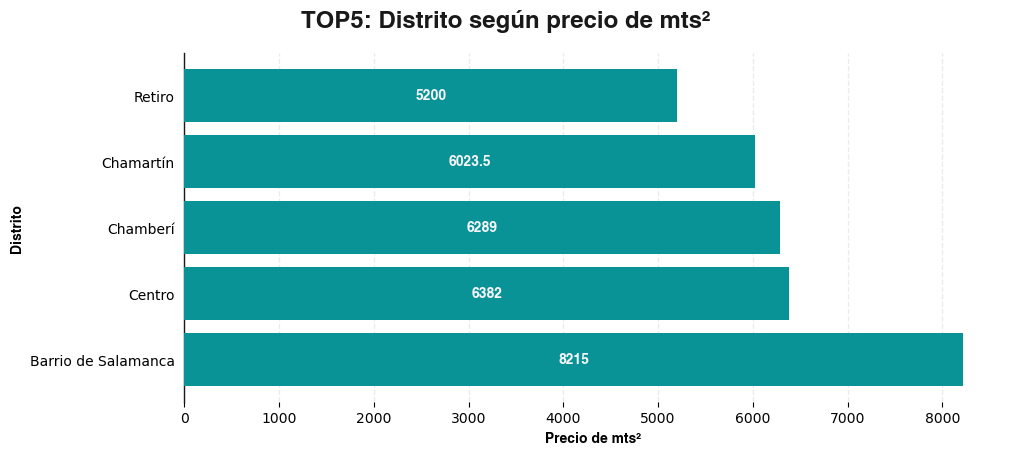

In [466]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("TOP5: Distrito según precio de mts²",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.barh(width="50%",
				y=data[:5].index,
				data=data[:5],
				facecolor="#0a9396",
				zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Distrito", fontdict=font_config)
ax.set_xlabel("Precio de mts²", fontdict=font_config)
ax.grid(axis="y", visible=False)
ax.grid(axis="x",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["left"].set_linewidth(1)
ax.spines["left"].set_color("#191919")
ax.spines[["bottom", "top", "right"]].set_visible(False)

plt.savefig(f"../img/mediana precio mts2 según distrito")
plt.show()

#### `price`

In [467]:
data = df_normalized.groupby(by=["district"])["price"].describe().sort_values(by="50%", ascending=False)
data

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Chamartín,2570.0,1.528520e+06,1.133787e+06,179000.0,725000.0,1200000.0,2085000.0,10500000.0
Barrio de Salamanca,1718.0,1.563401e+06,1.438721e+06,198000.0,725000.0,1190000.0,1750000.0,11200000.0
Hortaleza,68.0,9.833162e+05,3.630480e+05,320000.0,620000.0,1010000.0,1255500.0,1450000.0
Chamberí,1799.0,1.280374e+06,8.825290e+05,169900.0,720000.0,995000.0,1490000.0,5950000.0
Ciudad Lineal,258.0,8.291031e+05,3.613623e+05,240000.0,499000.0,799000.0,1090000.0,1700000.0
Centro,1769.0,8.558310e+05,6.687936e+05,104000.0,415000.0,658000.0,975000.0,3600000.0
Retiro,1681.0,8.176759e+05,7.320649e+05,104999.0,470000.0,635000.0,940000.0,11800000.0
Moratalaz,4.0,6.025000e+05,1.241303e+05,495000.0,495000.0,602500.0,710000.0,710000.0
Moncloa,1175.0,7.367858e+05,5.455888e+05,119000.0,347000.0,598000.0,950000.0,3500000.0


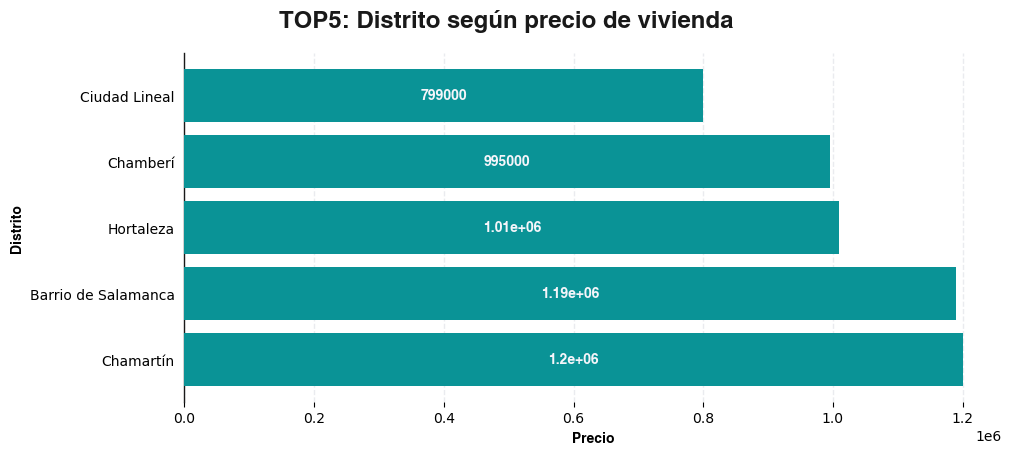

In [469]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("TOP5: Distrito según precio de vivienda",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.barh(width="50%",
				y=data[:5].index,
				data=data[:5],
				facecolor="#0a9396",
				zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Distrito", fontdict=font_config)
ax.set_xlabel("Precio", fontdict=font_config)
ax.grid(axis="y", visible=False)
ax.grid(axis="x",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["left"].set_linewidth(1)
ax.spines["left"].set_color("#191919")
ax.spines[["bottom", "top", "right"]].set_visible(False)

plt.savefig(f"../img/mediana precio según distrito")
plt.show()

### Centro vs "afuera de Madrid"

<Axes: ylabel='priceByArea'>

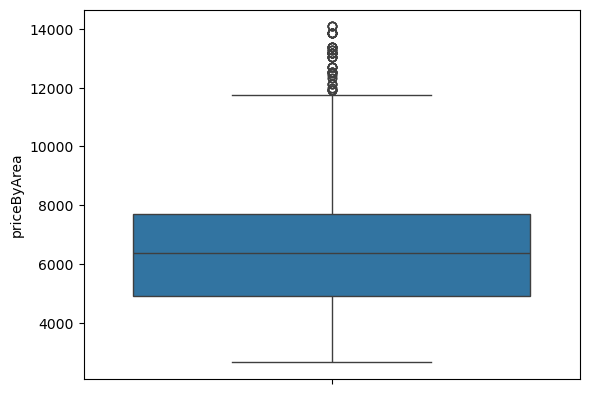

In [ ]:
mask = df_normalized["district"] == "Centro"
sns.boxplot(df_normalized.loc[mask, "priceByArea"])

In [ ]:
df_normalized.loc[mask, ["price", "priceByArea"]].describe()

,price,priceByArea
count,1.769000e+03,1769.000000
mean,8.558310e+05,6614.313171
std,6.687936e+05,2316.232761
min,1.040000e+05,2653.000000
25%,4.150000e+05,4913.000000
50%,6.580000e+05,6382.000000
75%,9.750000e+05,7716.000000
max,3.600000e+06,14085.000000


<Axes: ylabel='priceByArea'>

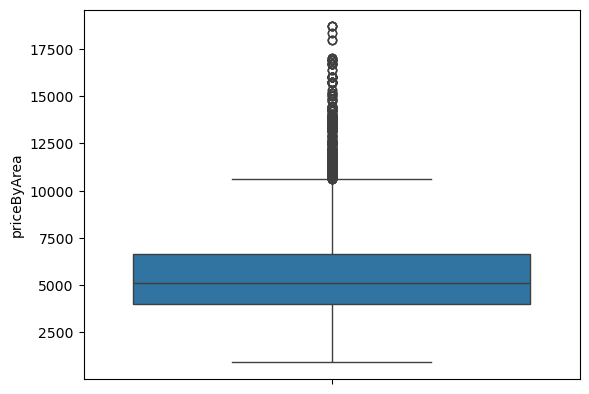

In [ ]:
df_normalized.loc[~mask, ["price", "priceByArea"]].describe()
sns.boxplot(df_normalized.loc[~mask, "priceByArea"])